# Assignment - Advanced Regression



## Problem Statement
### A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

### The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

### The company wants to know:

### 1. Which variables are significant in predicting the price of a house, and
### 2. How well those variables describe the price of a house.

### Also, determine the optimal value of lambda for ridge and lasso regression.

## Business Goal

### You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# Import Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
## Import Required Libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

from sklearn import linear_model, metrics
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
## Altering display limits so that we are able to see compelete details in the notebook.

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Data Overview

In [4]:
## Reading the input dataset ( Dataset of Sale of Hourses in Australia )

#Reading the Input Data (csv format)
house_sales_data = pd.read_csv("/content/drive/MyDrive/RegressionAssignment/train.csv")

## View first 5 rows
house_sales_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [5]:
## Check the number of rows and columns

house_sales_data.shape

(1460, 81)

In [6]:
## Dataset Summary 
## Observation - We can see not all columns have complete values filled. Some of them are having null values.

house_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
## Getting Dataset Statistical Summary

house_sales_data.describe() 

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [8]:
#Checking the Null values
# Observation - We are specifically able to see which columns have count >0 which means having null values.

house_sales_data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [9]:
# Checking if there are columns with one unique value since it won't affect our analysis
# Observation - We don't see any such column

house_sales_data.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFin

In [10]:
# Check the dimensions
# We see there are 1460 rows and 81 columns in our dataset

print("Number of Rows = ", house_sales_data.shape[0])
print("Number of Columns = ", house_sales_data.shape[1])

Number of Rows =  1460
Number of Columns =  81


# Metadata - Desription of Various Fields

## Refer the following link for the metadata - https://cdn.upgrad.com/UpGrad/temp/87f67e28-c47e-4725-ae3c-111142c7eaba/data_description.txt

# Data Set Observation , Cleaning & Applying Fixes

## On Checking the Values of various columns in the metadata. We observe one unique value for many of the listed columns below - NA, which holds different meaning in different variables.

## Below are the various columns and their meaning attached : 
### 1. Alley : NA = No alley access
### 2. BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2 : NA = No Basement
### 3. FireplaceQu : NA = No Fireplace
### 4. GarageType, GarageFinish, GarageQual, GarageCond : NA = No Garage
### 5. PoolQC : NA = No Pool
### 6. Fence : NA = No Fence
### 7. MiscFeature : NA = None


## We will have to make sure they are not being treated as null by python.

In [11]:
## Making sure python does not treat 'NA' as Null or NaN

house_sales_data_updated = pd.read_csv('/content/drive/MyDrive/RegressionAssignment/train.csv', keep_default_na=False)
house_sales_data_updated.head()

Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL          65     8450   Pave    NA      Reg   
1   2          20       RL          80     9600   Pave    NA      Reg   
2   3          60       RL          68    11250   Pave    NA      IR1   
3   4          70       RL          60     9550   Pave    NA      IR1   
4   5          60       RL          84    14260   Pave    NA      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0        196        Gd        TA      PConc       Gd       TA           No   
1          0        TA        TA     CBlock       Gd       TA           Gd   
2        162        Gd        TA      PConc       Gd       TA           Mn   
3          0        TA        TA     BrkTil       TA       Gd           No   
4        350        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0          NA   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Ty

In [12]:
## Replacing all 'NA' of all above mentioned columns by 'None' value. So that they don't clash with NaN

house_sales_data_updated[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']] = house_sales_data_updated[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']].replace("NA", "None")
house_sales_data_updated.head()

Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL          65     8450   Pave  None      Reg   
1   2          20       RL          80     9600   Pave  None      Reg   
2   3          60       RL          68    11250   Pave  None      IR1   
3   4          70       RL          60     9550   Pave  None      IR1   
4   5          60       RL          84    14260   Pave  None      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0        196        Gd        TA      PConc       Gd       TA           No   
1          0        TA        TA     CBlock       Gd       TA           Gd   
2        162        Gd        TA      PConc       Gd       TA           Mn   
3          0        TA        TA     BrkTil       TA       Gd           No   
4        350        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0        None   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Ty

In [13]:
# Check the Data Information Again 

house_sales_data_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

## Observing Column Data Types

### We go through  columns and their description and try to compare with above datatypes. We feel we should be changing below column dataTypes - 

#### 1. Columns MSSubClass, OverallQual, OverallCond need to be converted to object type from Int Type, as they are describing some parameters not actual int values.
#### 2. Column LotFrontage and MasVnrArea needs to be converted to numeric type as they are describing measurements.

In [14]:
## Convert MSSubClass, OverallQual, OverallCond columns to 'object' type for reason listed above.

house_sales_data_updated[['MSSubClass', 'OverallQual', 'OverallCond']] = house_sales_data_updated[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')

In [15]:
## Convert LotFrontage and MasVnrArea columns to 'numeric' type for reason listed above.

house_sales_data_updated['LotFrontage'] = pd.to_numeric(house_sales_data_updated['LotFrontage'], errors='coerce')
house_sales_data_updated['MasVnrArea'] = pd.to_numeric(house_sales_data_updated['MasVnrArea'], errors='coerce')

In [16]:
## Verifying Data Types for Above Updated Columns

house_sales_data_updated[['MSSubClass', 'OverallQual', 'OverallCond', 'LotFrontage', 'MasVnrArea']].dtypes

MSSubClass      object
OverallQual     object
OverallCond     object
LotFrontage    float64
MasVnrArea     float64
dtype: object

In [17]:
## Now we need to check statistical information again as we have updated datatypes.

house_sales_data_updated.describe()

Id  LotFrontage        LotArea    YearBuilt  YearRemodAdd  \
count  1460.000000  1201.000000    1460.000000  1460.000000   1460.000000   
mean    730.500000    70.049958   10516.828082  1971.267808   1984.865753   
std     421.610009    24.284752    9981.264932    30.202904     20.645407   
min       1.000000    21.000000    1300.000000  1872.000000   1950.000000   
25%     365.750000    59.000000    7553.500000  1954.000000   1967.000000   
50%     730.500000    69.000000    9478.500000  1973.000000   1994.000000   
75%    1095.250000    80.000000   11601.500000  2000.000000   2004.000000   
max    1460.000000   313.000000  215245.000000  2010.000000   2010.000000   

        MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF  \
count  1452.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    103.685262   443.639726    46.549315   567.240411  1057.429452   
std     181.066207   456.098091   161.319273   441.866955   438.705324   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000   223.000000   795.750000   
50%       0.000000   383.500000     0.000000   477.500000   991.500000   
75%     166.000000   712.250000     0.000000   808.000000  1298.250000   
max    1600.000000  5644.000000  1474.000000  2336.000000  6110.000000   

          1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  \
count  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   
mean   1162.626712   346.992466      5.844521  1515.463699      0.425342   
std     386.587738   436.528436     48.623081   525.480383      0.518911   
min     334.000000     0.000000      0.000000   334.000000      0.000000   
25%     882.000000     0.000000      0.000000  1129.500000      0.000000   
50%    1087.000000     0.000000      0.000000  1464.000000      0.000000   
75%    1391.250000   728.000000      0.000000  1776.750000      1.000000   
max    4692.000000  2065.000000    572.000000  5642.000000      3.000000   

       BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  \
count   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   
mean       0.057534     1.565068     0.382877      2.866438      1.046575   
std        0.238753     0.550916     0.502885      0.815778      0.220338   
min        0.000000     0.000000     0.000000      0.000000      0.000000   
25%        0.000000     1.000000     0.000000      2.000000      1.000000   
50%        0.000000     2.000000     0.000000      3.000000      1.000000   
75%        0.000000     2.000000     1.000000      3.000000      1.000000   
max        2.000000     3.000000     2.000000      8.000000      3.000000   

       TotRmsAbvGrd   Fireplaces   GarageCars   GarageArea   WoodDeckSF  \
count   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean       6.517808     0.613014     1.767123   472.980137    94.244521   
std        1.625393     0.644666     0.747315   213.804841   125.338794   
min        2.000000     0.000000     0.000000     0.000000     0.000000   
25%        5.000000     0.000000     1.000000   334.500000     0.000000   
50%        6.000000     1.000000     2.000000   480.000000     0.000000   
75%        7.000000     1.000000     2.000000   576.000000   168.000000   
max       14.000000     3.000000     4.000000  1418.000000   857.000000   

       OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.660274      21.954110     3.409589    15.060959     2.758904   
std      66.256028      61.119149    29.317331    55.757415    40.177307   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     0.000000   
50%      25.000000       0.000000     0.000000     0.000000     0.000000   
75%      68.000000       0.000000     0.000000     0.000000     0.00

### Observation - Column 2ndFlrSF has mean - 346.99 whereas median as 0. This indicates skewed data. Happening with few more columns where mean is quite different from median.

In [18]:
## Check for missing values
house_sales_data_updated.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

### Observation - We observe only two columns have null values - Column - LotFrontage and MasVnrArea. We will have to do null value treatment for those variables.

# Exploratory Data Analysis

## Univariate Analysis

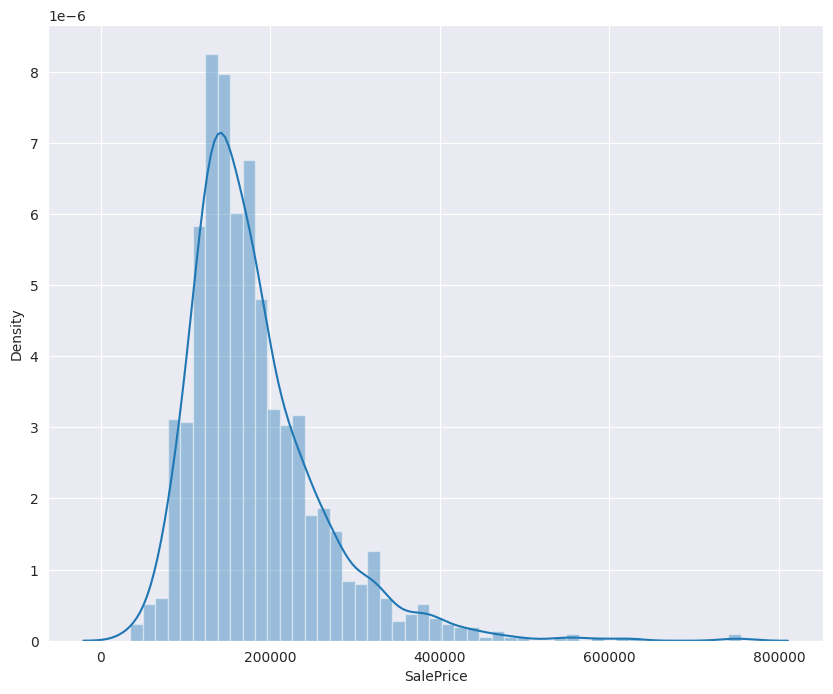

In [19]:
## Our Target Variable - SalePrice. Analysing the distribution of SalePrice variable

plt.figure(figsize=[10,8])
sns.set_style('darkgrid')
sns.distplot(house_sales_data_updated['SalePrice']);

### Observation - Since target variable is mostly concentrated around 180000. It gives us an indication of data skewness. Specifically Right-Skewed

In [20]:
## Measuring skewness of Sale Price ( Target Variable )
## Observation - 1.88 which indicates it is highly skewed as it is greater than 1.

house_sales_data_updated['SalePrice'].skew()

1.8828757597682129

In [21]:
## Check the kurtosis of Sale Price ( Target Variable )

house_sales_data_updated['SalePrice'].kurt()

6.536281860064529

### Since Kurtosis is greater than 1, so distribution is highly peaked.
### We will do log transform on our target variable.

In [22]:
## Log transformation

house_sales_data_updated['SalePrice'] = np.log(house_sales_data_updated['SalePrice'])

In [23]:
## Check the skewness

house_sales_data_updated['SalePrice'].skew()

0.12133506220520406

In [24]:
## Check the kurtosis
house_sales_data_updated['SalePrice'].kurt()

0.8095319958036296

### Both skewness and kurtosis are less than 1 now.

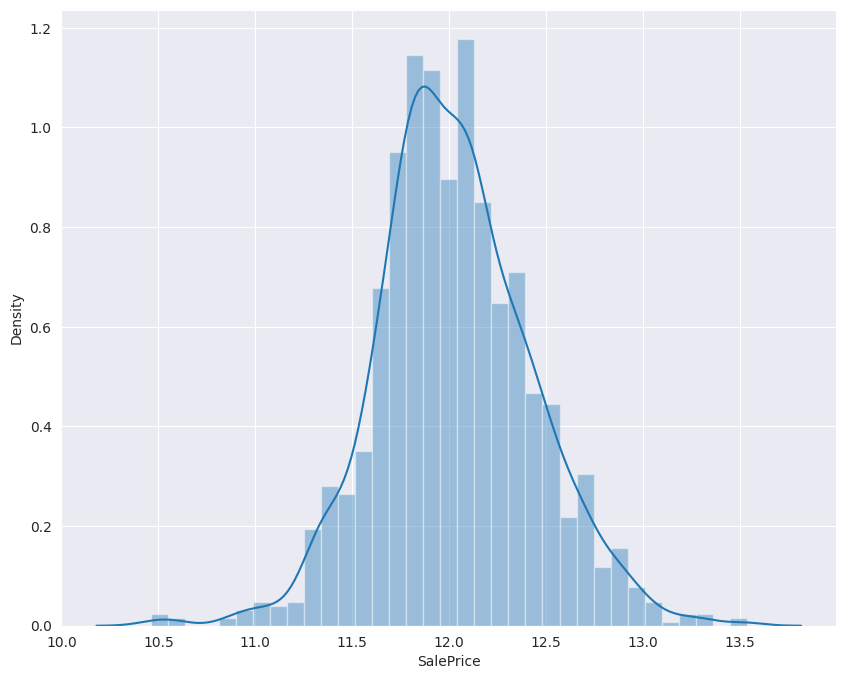

In [30]:
## Plot the spread of transformed target variable

plt.figure(figsize=[10,8])
sns.distplot(house_sales_data_updated['SalePrice']);

### So, our target variable has normal distribution now.

### Dividing Data into numerical and categorical variables for data analysis.

In [31]:
# Extracting Dataframe with Numerical Columns
house_sales_data_updated_num = house_sales_data_updated.select_dtypes(include=['int64', 'float64'])
house_sales_data_updated_num.head()

Id  LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0   1         65.0     8450       2003          2003       196.0         706   
1   2         80.0     9600       1976          1976         0.0         978   
2   3         68.0    11250       2001          2002       162.0         486   
3   4         60.0     9550       1915          1970         0.0         216   
4   5         84.0    14260       2000          2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0           0        150          856       856       854             0   
1           0        284         1262      1262         0             0   
2           0        434          920       920       866             0   
3           0        540          756       961       756             0   
4           0        490         1145      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
0             1             8           0           2         548           0   
1             1             6           1           2         460         298   
2             1             6           1           2         608           0   
3             1             7           1           3         642           0   
4             1             9           1           3         836         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2008  12.247694  
1       5    2007  12.109011  
2       9    2008  12.317167  
3       2    2006  11.849398  
4      12    2008  12.429216

In [32]:
# Extracting Dataframe with Categorical Columns
house_sales_data_updated_cat = house_sales_data_updated.select_dtypes(include='object')
house_sales_data_updated_cat.head()

MSSubClass MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
0         60       RL   Pave  None      Reg         Lvl    AllPub    Inside   
1         20       RL   Pave  None      Reg         Lvl    AllPub       FR2   
2         60       RL   Pave  None      IR1         Lvl    AllPub    Inside   
3         70       RL   Pave  None      IR1         Lvl    AllPub    Corner   
4         60       RL   Pave  None      IR1         Lvl    AllPub       FR2   

  LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

  OverallQual OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd  \
0           7           5     Gable  CompShg     VinylSd     VinylSd   
1           6           8     Gable  CompShg     MetalSd     MetalSd   
2           7           5     Gable  CompShg     VinylSd     VinylSd   
3           7           5     Gable  CompShg     Wd Sdng     Wd Shng   
4           8           5     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0    BrkFace        Gd        TA      PConc       Gd       TA           No   
1       None        TA        TA     CBlock       Gd       TA           Gd   
2    BrkFace        Gd        TA      PConc       Gd       TA           Mn   
3       None        TA        TA     BrkTil       TA       Gd           No   
4    BrkFace        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir Electrical  \
0          GLQ          Unf    GasA        Ex          Y      SBrkr   
1          ALQ          Unf    GasA        Ex          Y      SBrkr   
2          GLQ          Unf    GasA        Ex          Y      SBrkr   
3          ALQ          Unf    GasA        Gd          Y      SBrkr   
4          GLQ          Unf    GasA        Ex          Y      SBrkr   

  KitchenQual Functional FireplaceQu GarageType GarageYrBlt GarageFinish  \
0          Gd        Typ        None     Attchd        2003          RFn   
1          TA        Typ          TA     Attchd        1976          RFn   
2          Gd        Typ          TA     Attchd        2001          RFn   
3          Gd        Typ          Gd     Detchd        1998          Unf   
4          Gd        Typ          TA     Attchd        2000          RFn   

  GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature SaleType  \
0         TA         TA          Y   None  None        None       WD   
1         TA         TA          Y   None  None        None       WD   
2         TA         TA          Y   None  None        None       WD   
3         TA         TA          Y   None  None        None       WD   
4         TA         TA          Y   None  None        None       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal

### We have created below two dataframe :
1. house_sales_data_updated_num - Dataframe containing the numberical columns.
2. house_sales_data_updated_cat - Dataframe containing the categorical columns.

## Numerical Analysis

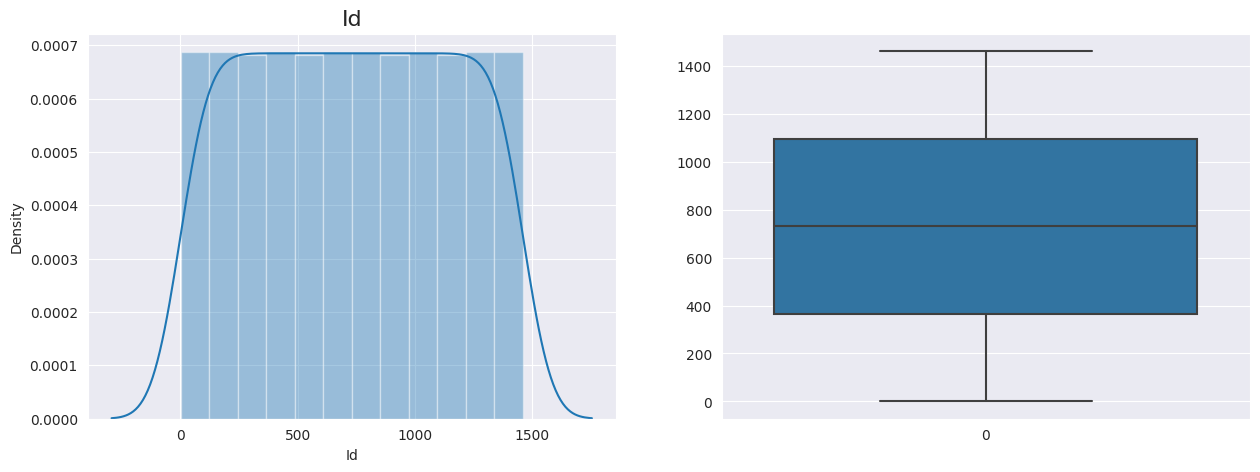

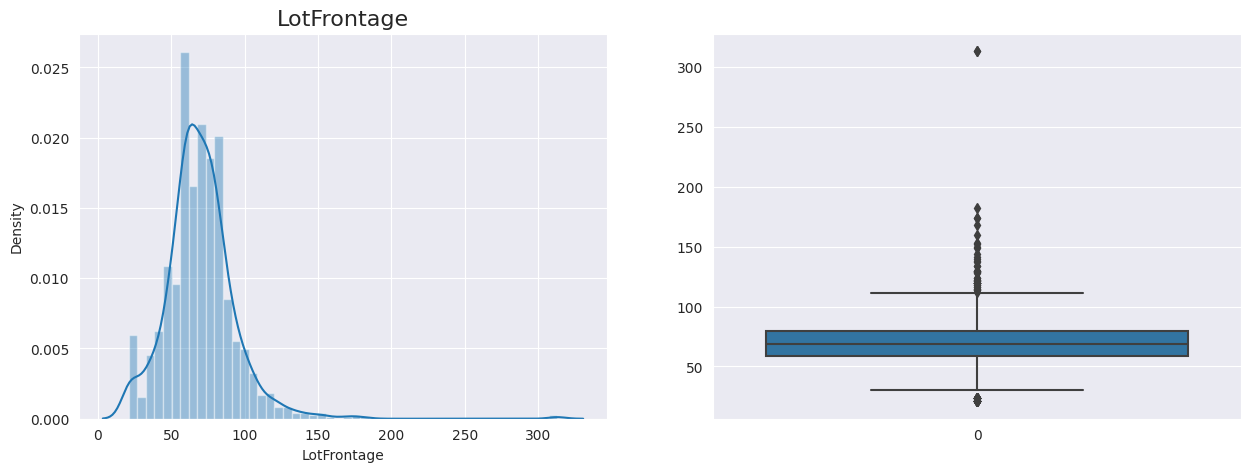

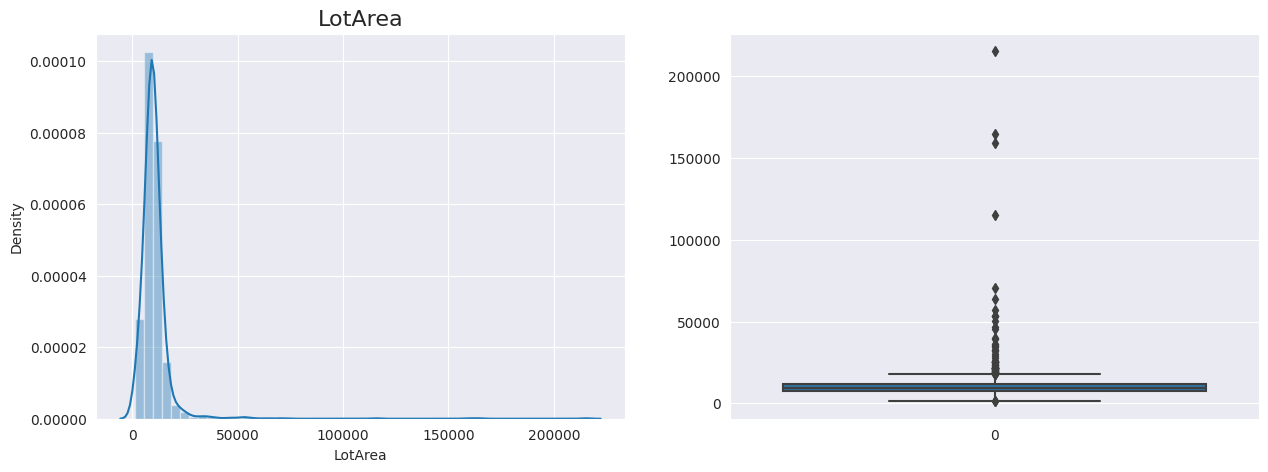

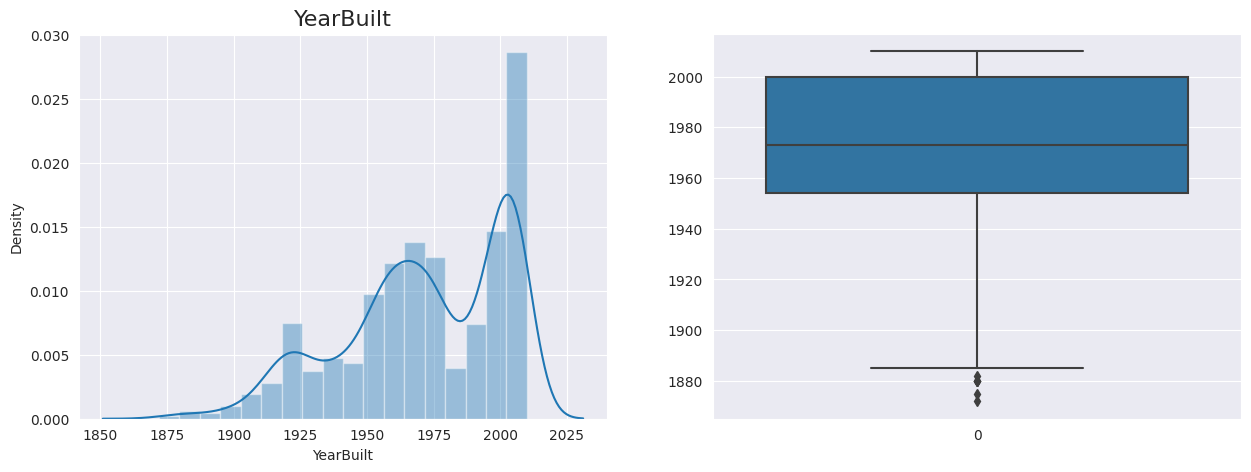

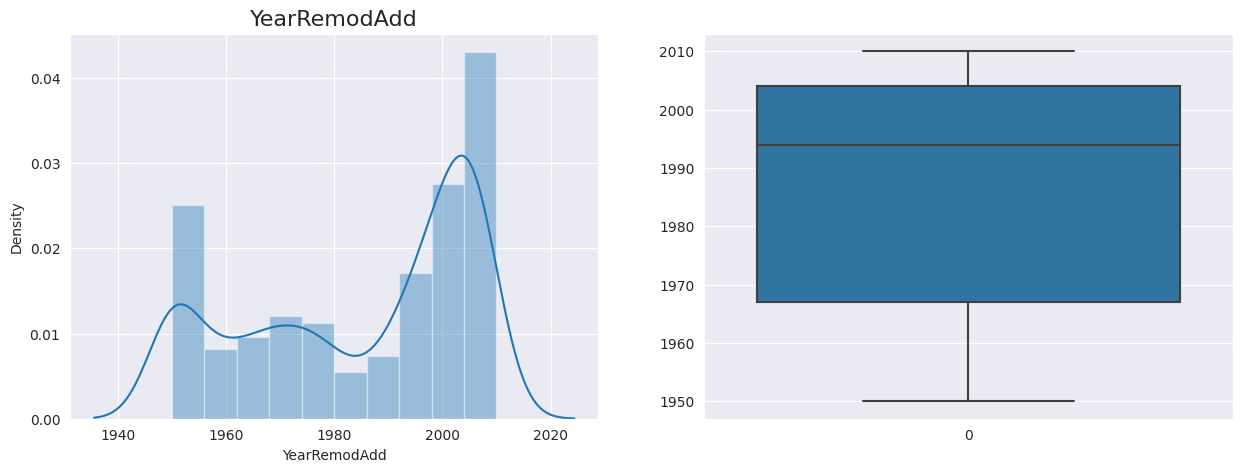

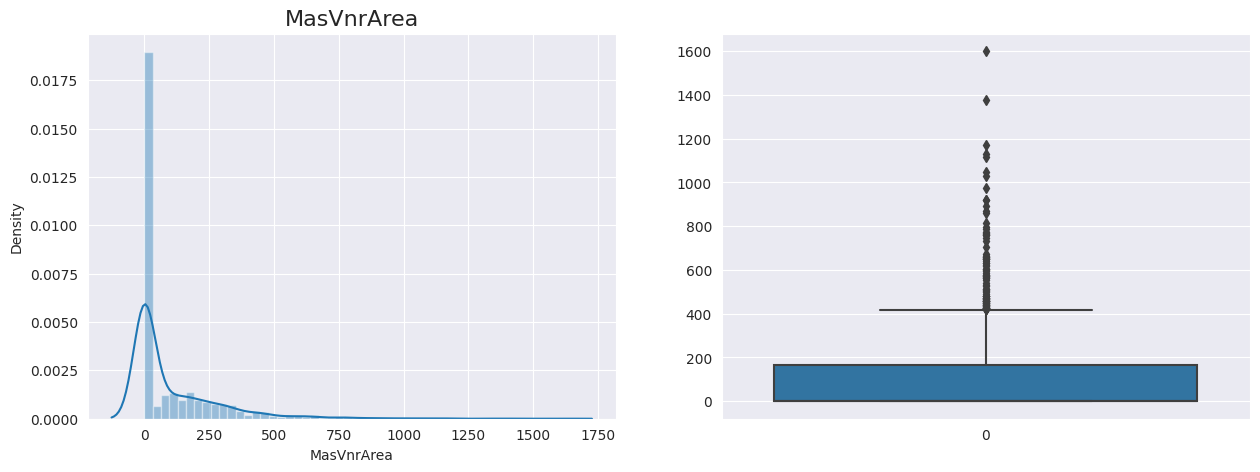

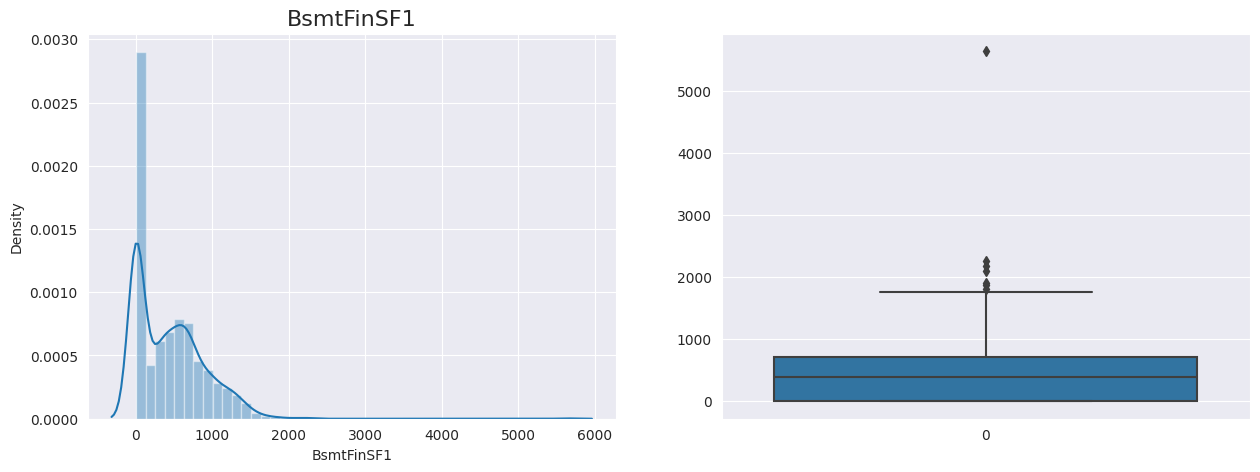

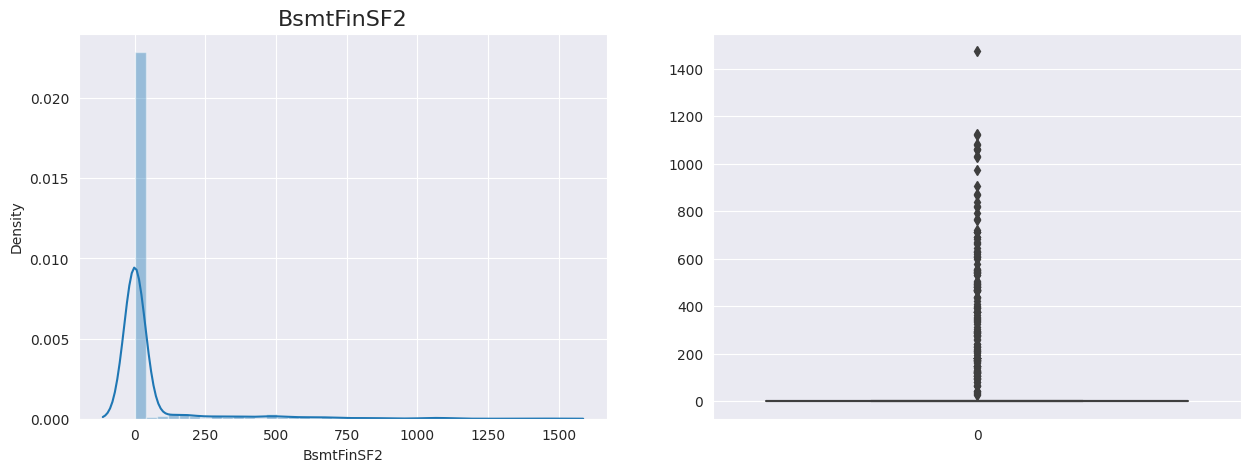

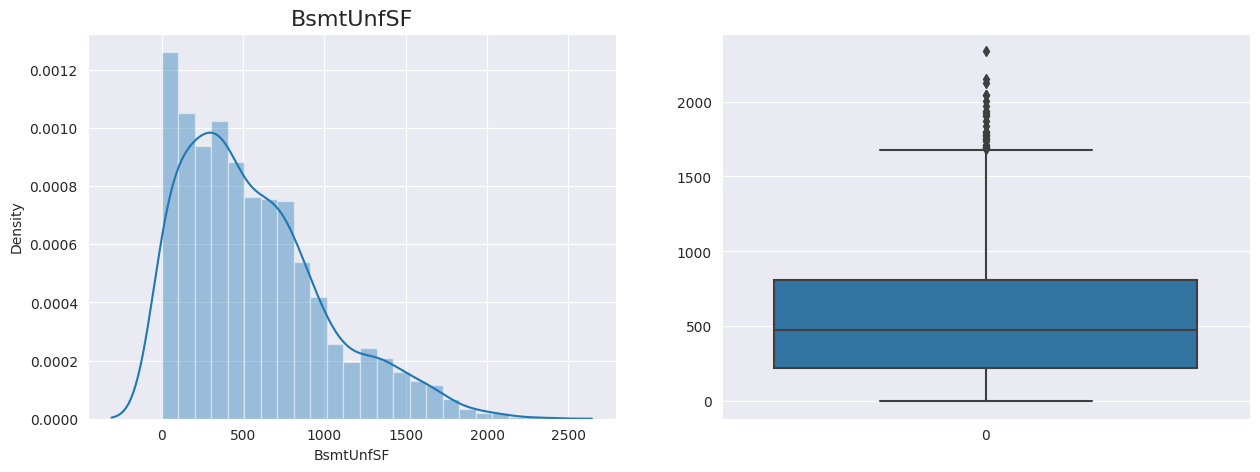

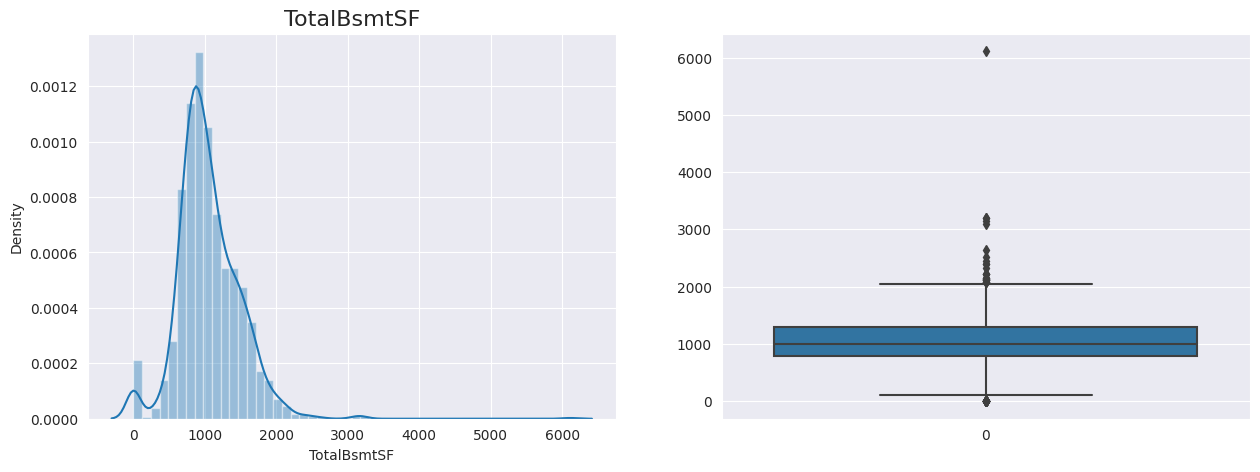

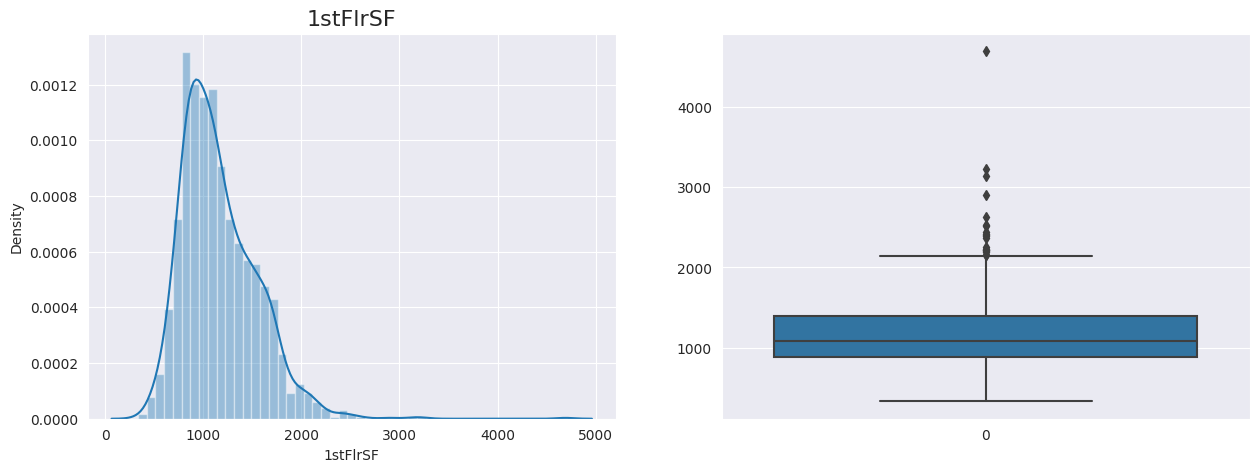

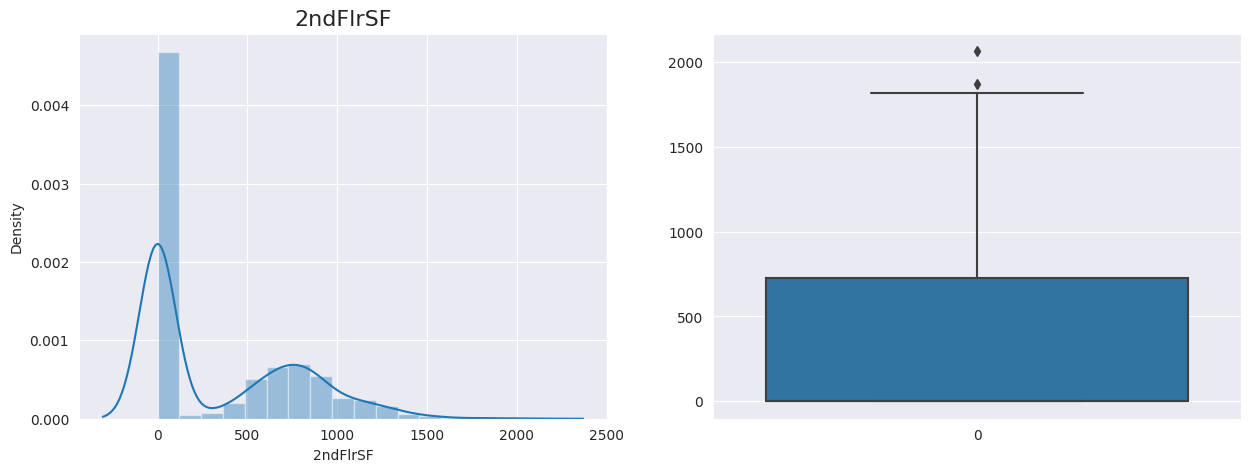

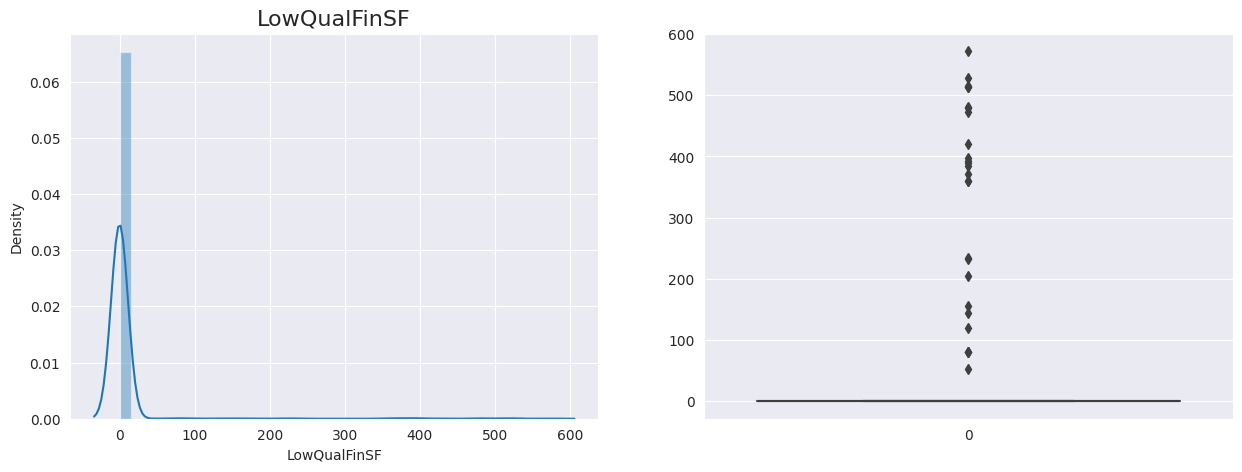

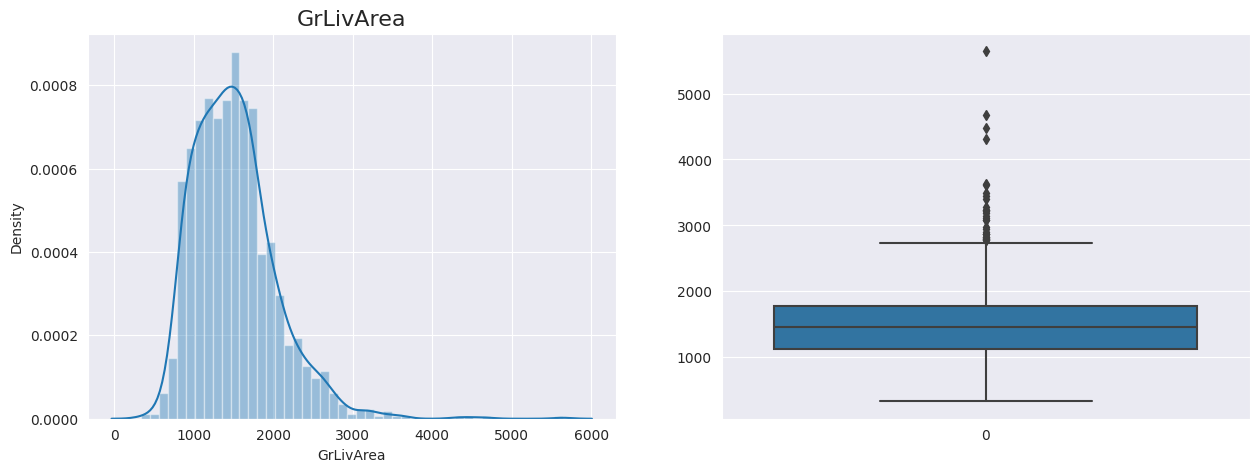

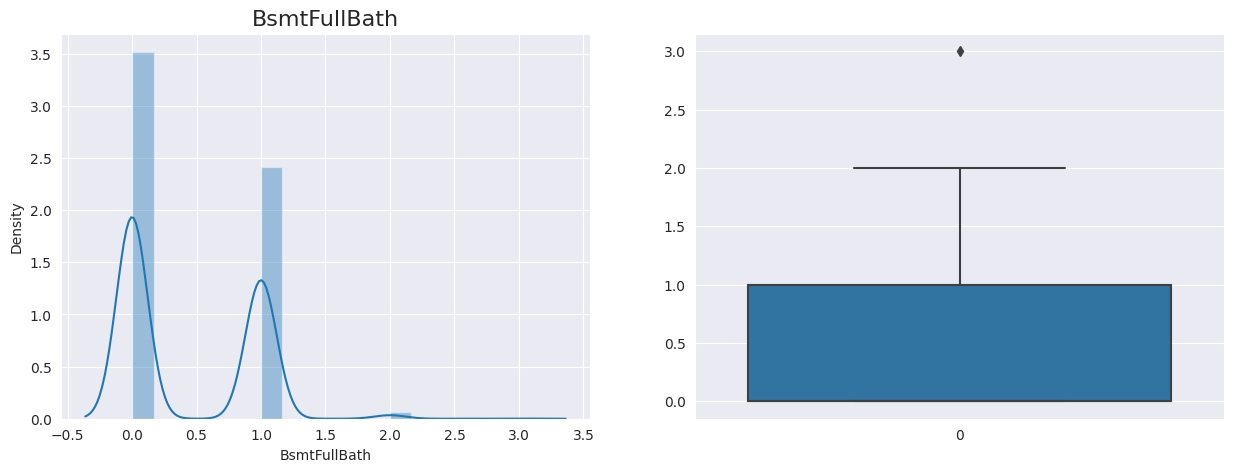

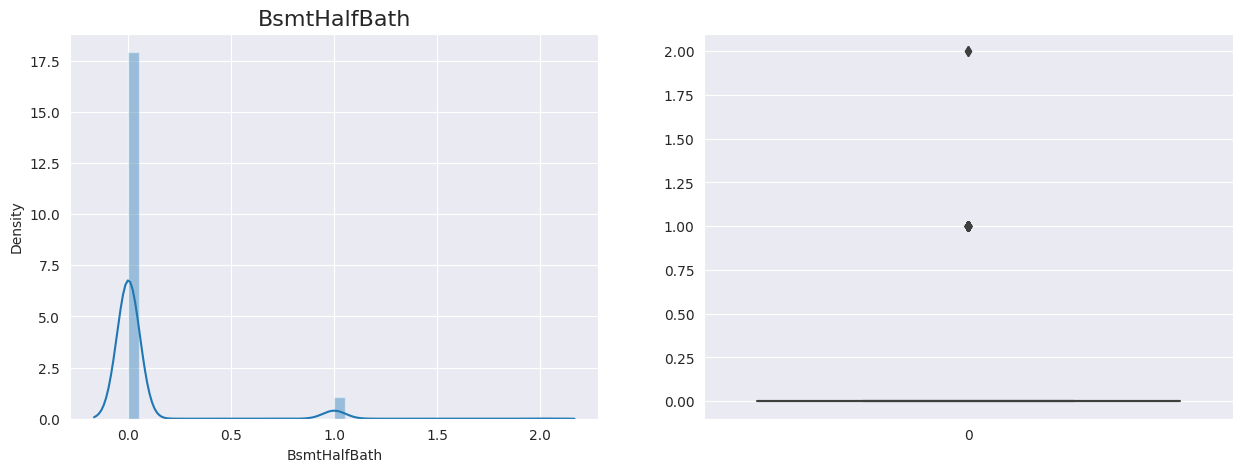

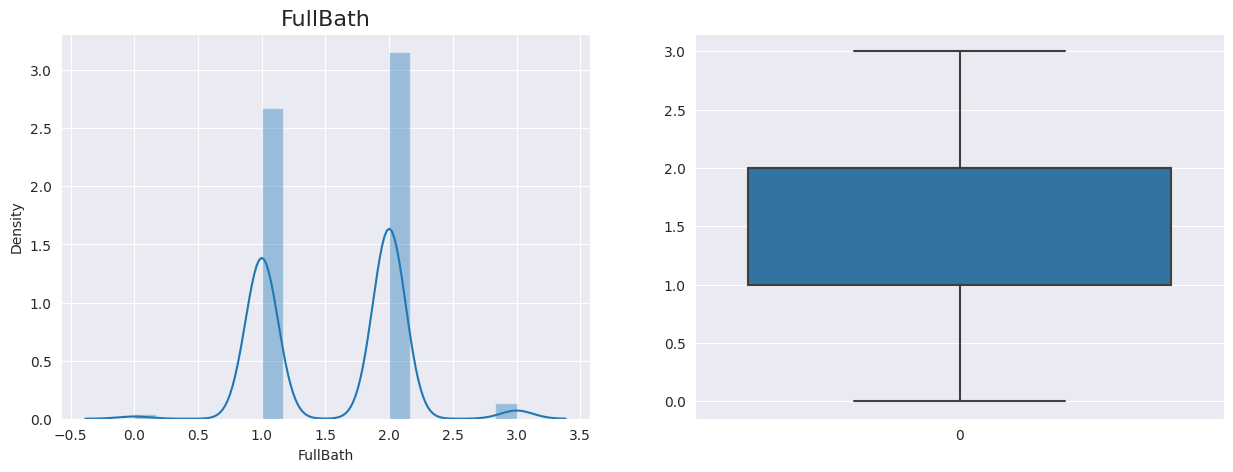

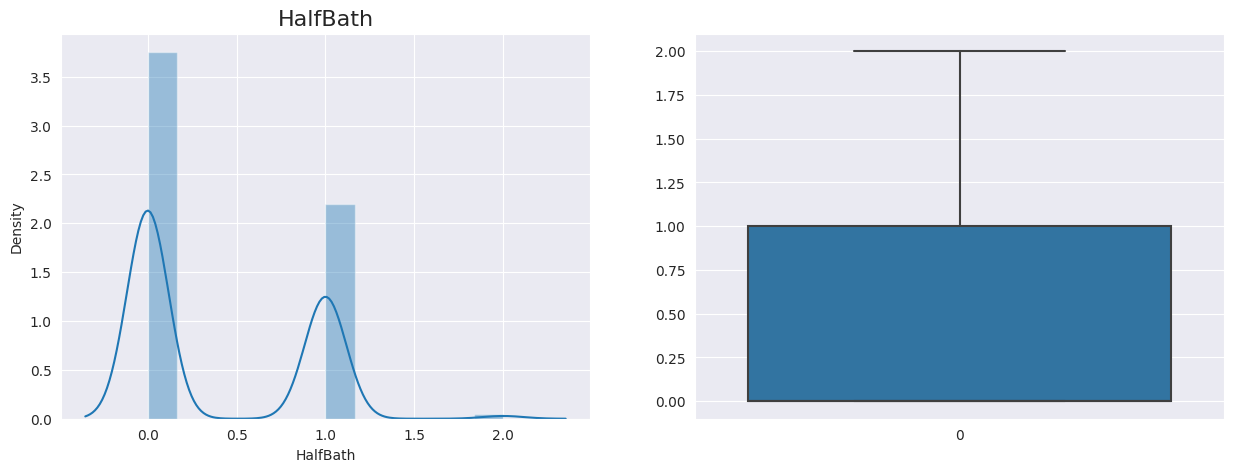

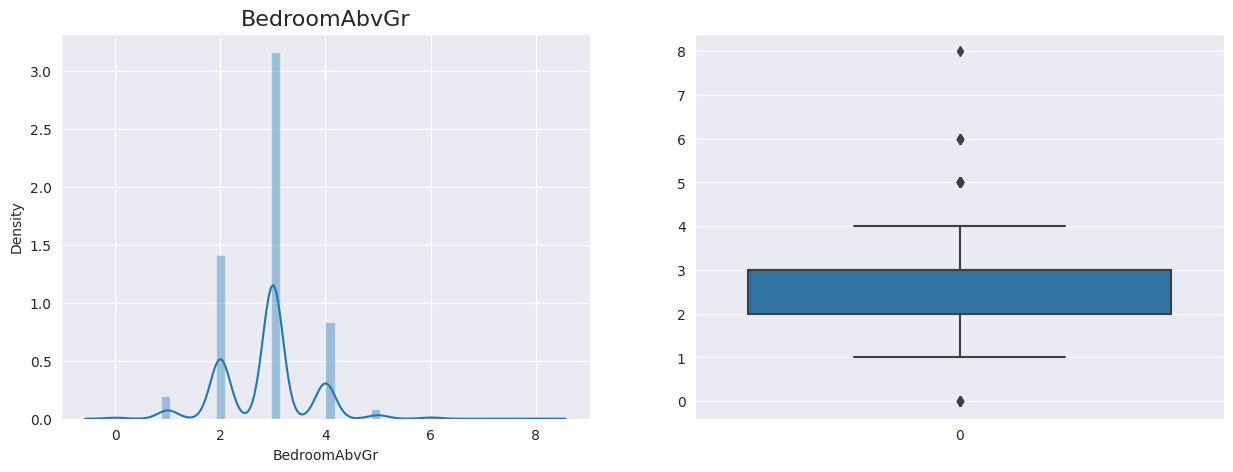

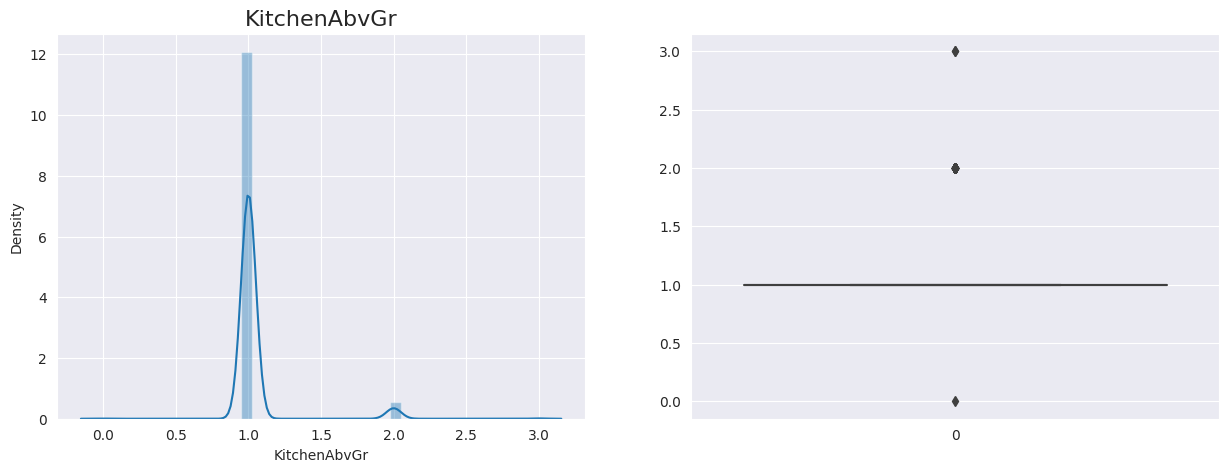

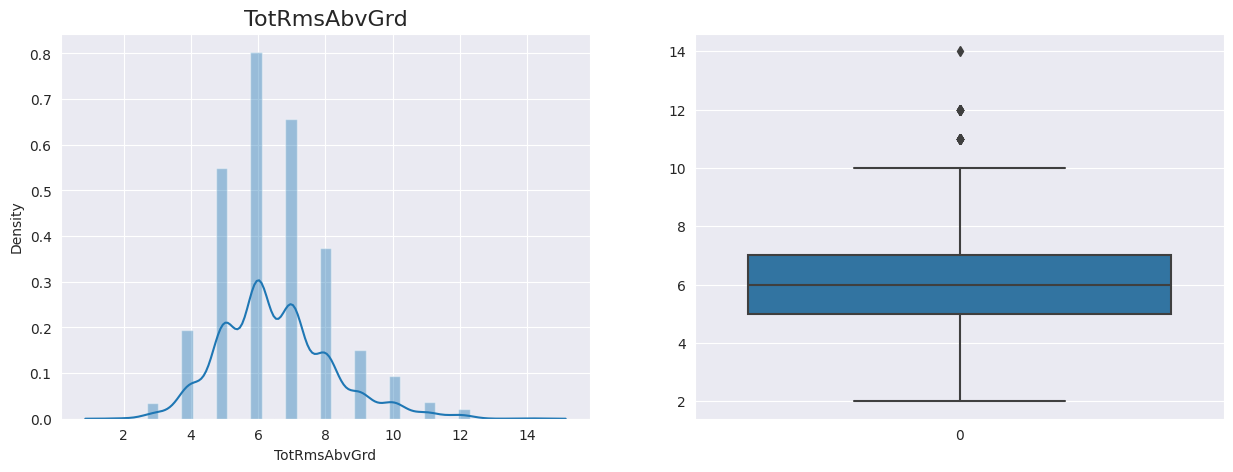

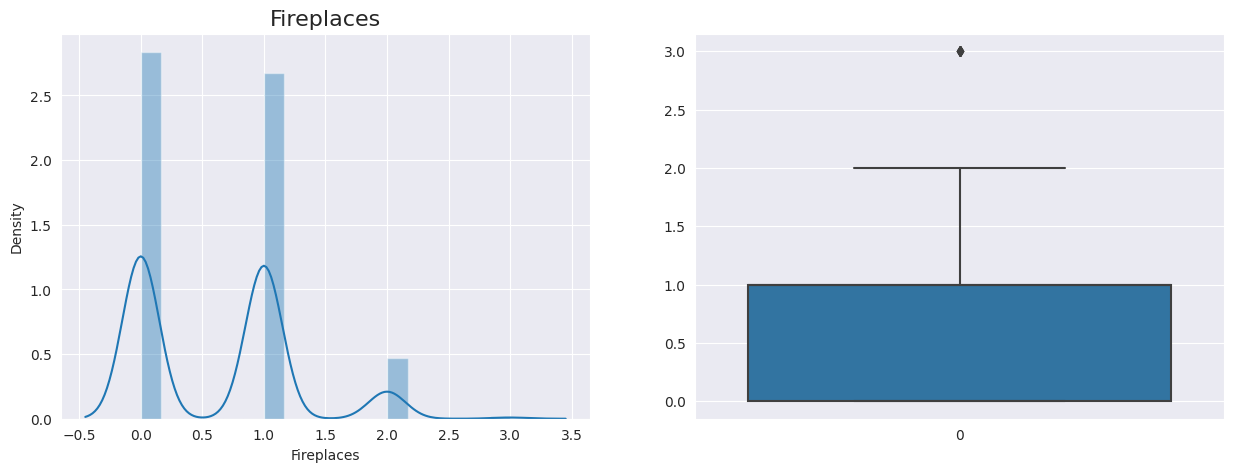

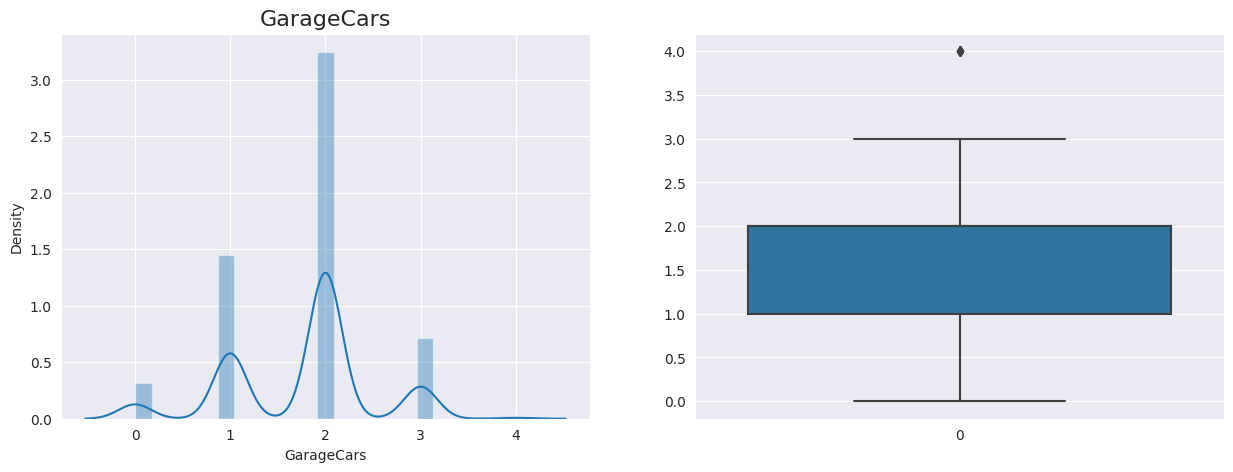

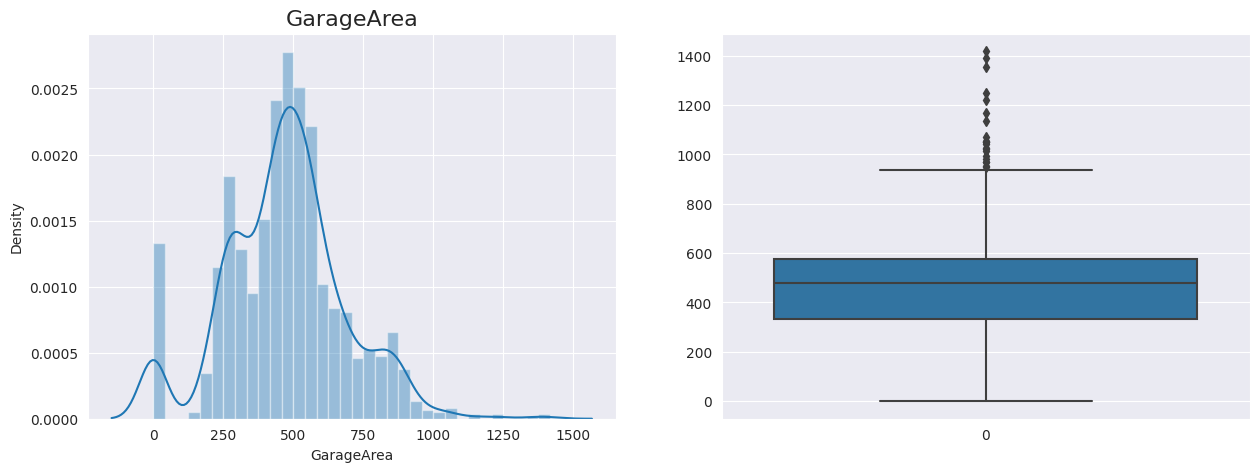

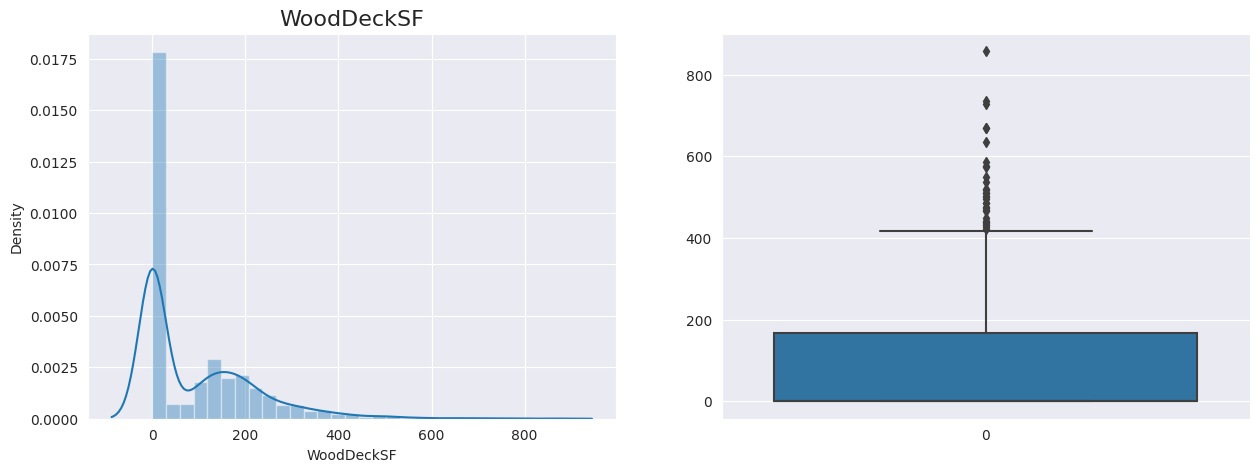

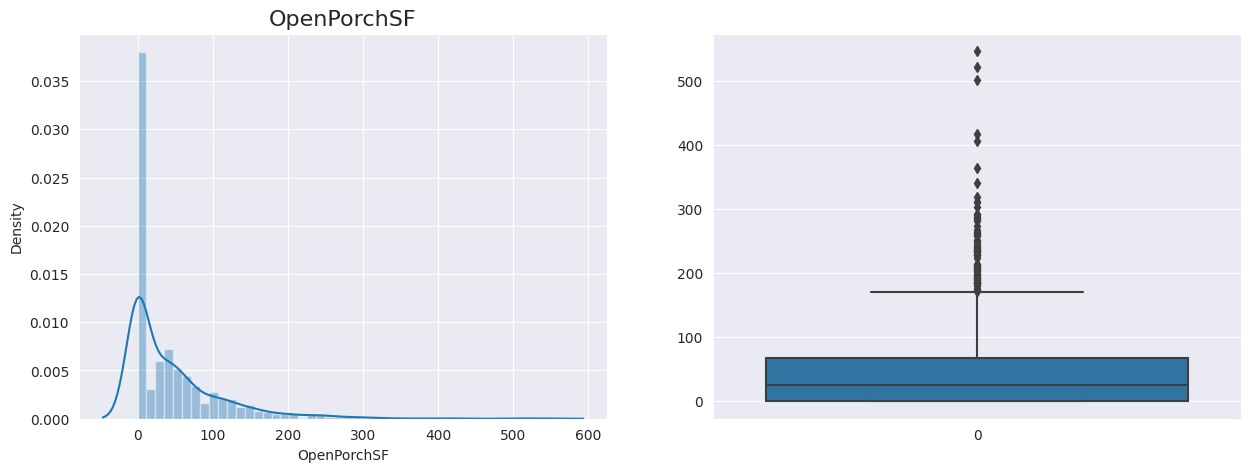

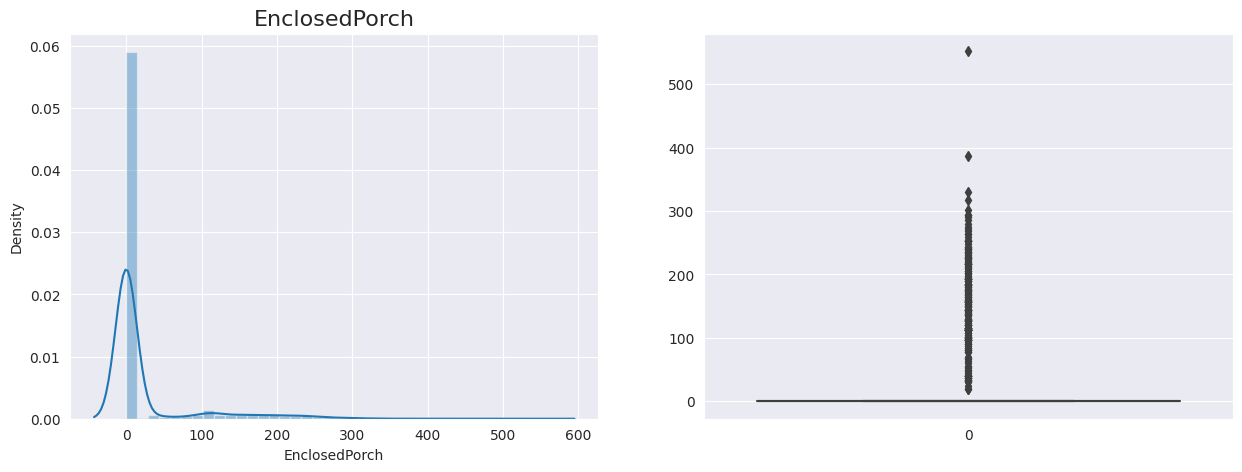

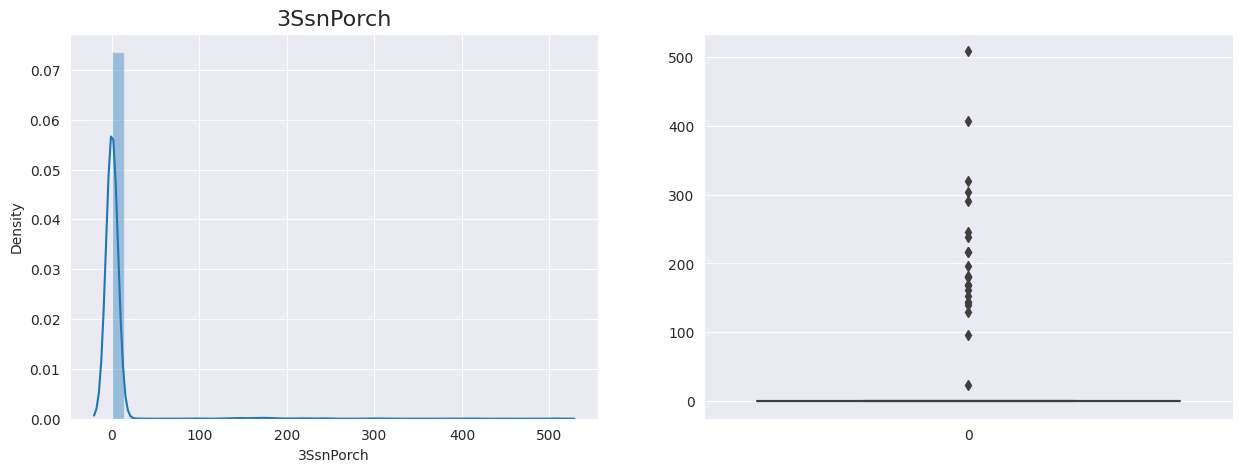

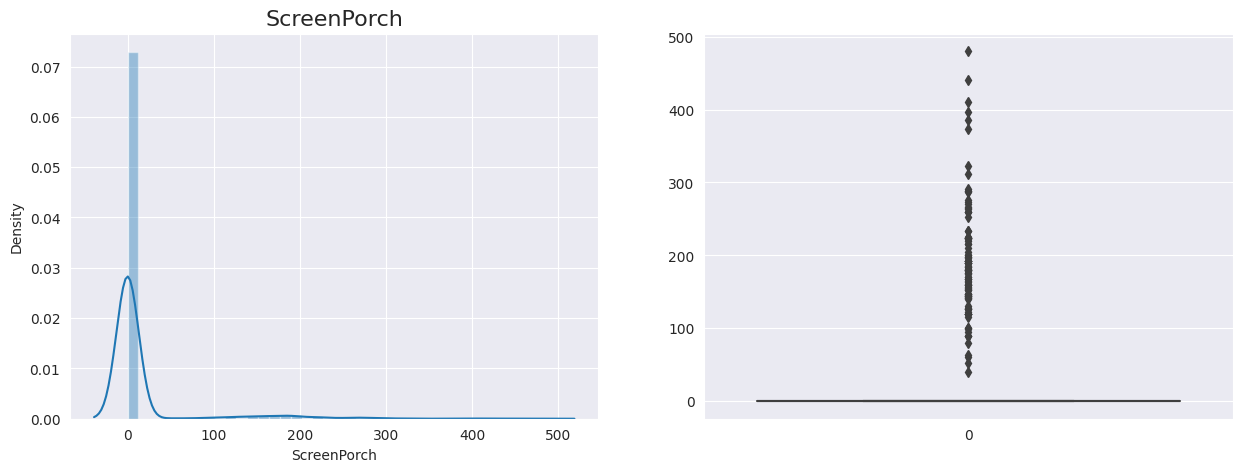

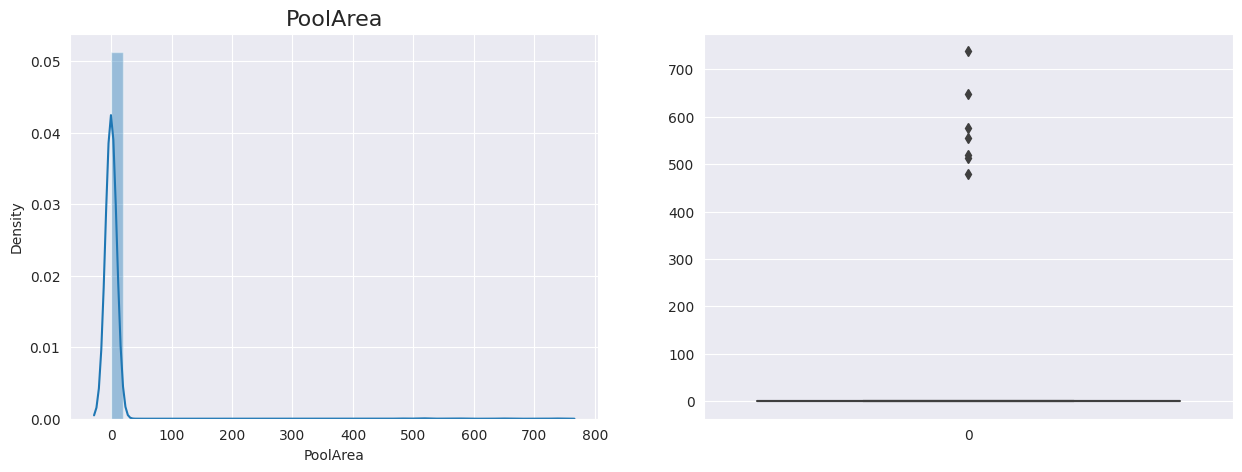

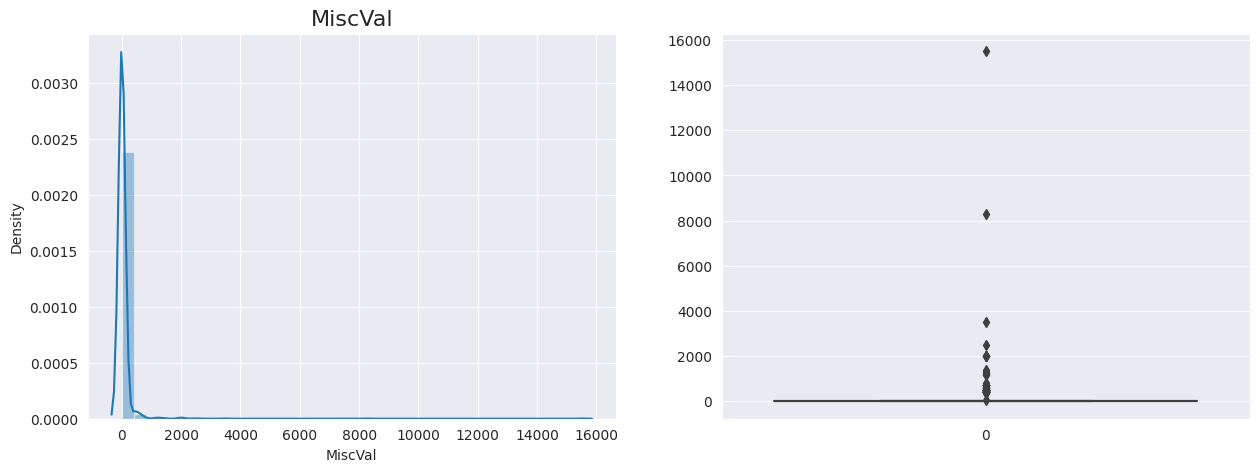

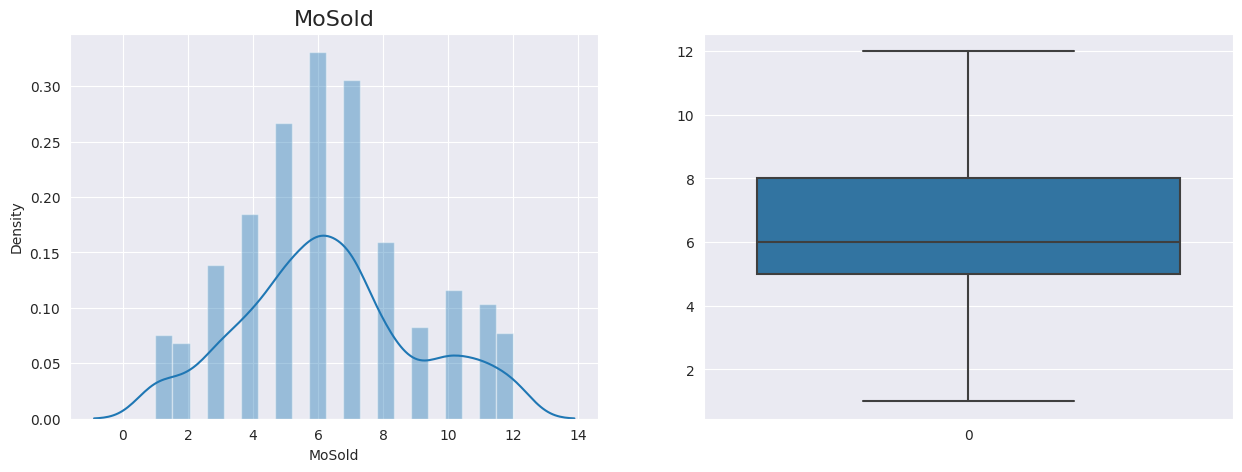

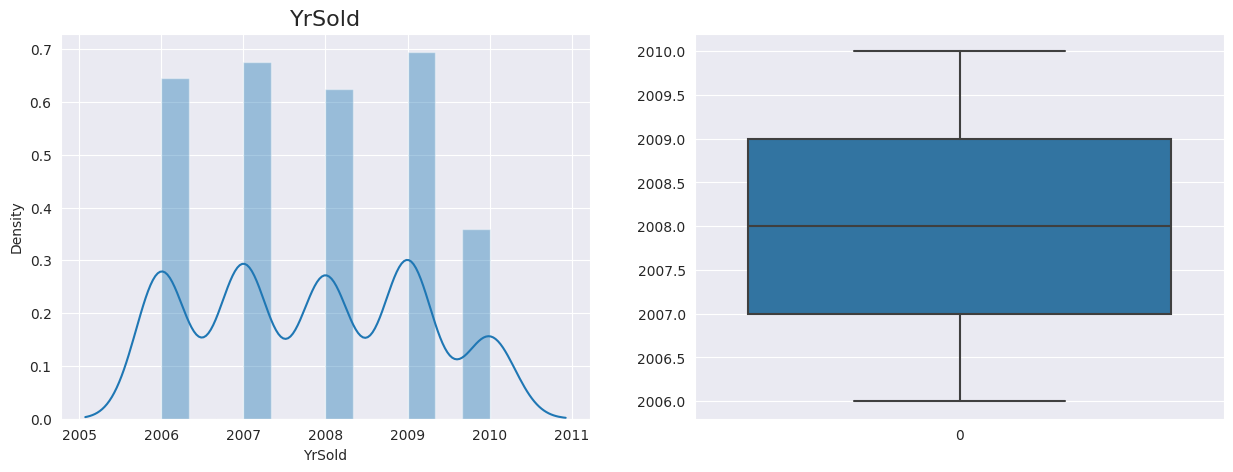

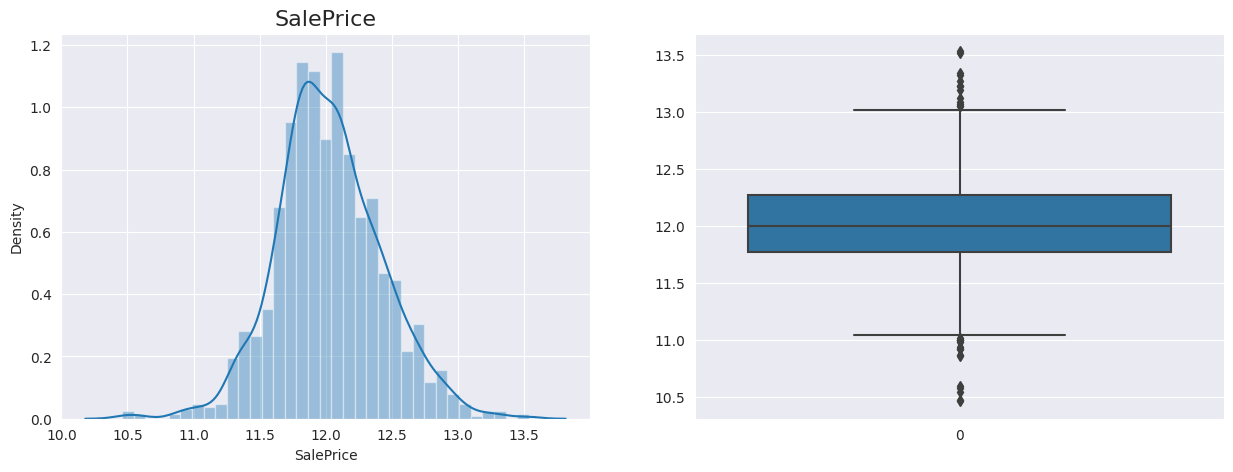

In [33]:
## Checking of all numeric variables using histograms and boxplots

for col in house_sales_data_updated_num.columns:
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    plt.title(col, fontdict={'fontsize': 16})
    sns.distplot(house_sales_data_updated_num[col])
    
    plt.subplot(1,2,2)
    sns.boxplot(house_sales_data_updated_num[col])
    plt.show()    

### Observations - Most of the columns are not having normal distribution. They are having non-normal distributions.
### We can also observe lot of them have outliers. We will have to do outlier treatment.

## Categorical Analysis

In [34]:
## Verifying unique values of all Categorical columns

for col in house_sales_data_updated_cat.columns:
    print(col)
    print(house_sales_data_updated[col].unique(), '\n')

MSSubClass
[60 20 70 50 190 45 90 120 30 85 80 160 75 180 40] 

MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH'] 

Street
['Pave' 'Grvl'] 

Alley
['None' 'Grvl' 'Pave'] 

LotShape
['Reg' 'IR1' 'IR2' 'IR3'] 

LandContour
['Lvl' 'Bnk' 'Low' 'HLS'] 

Utilities
['AllPub' 'NoSeWa'] 

LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] 

LandSlope
['Gtl' 'Mod' 'Sev'] 

Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] 

Condition1
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe'] 

Condition2
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe'] 

BldgType
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs'] 

HouseStyle
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin'] 

OverallQual
[7 6 8 5 9 4 10 3 1 2] 

OverallCond
[5 8 6 7 4 2 3 9 1] 

RoofStyle
['Gab

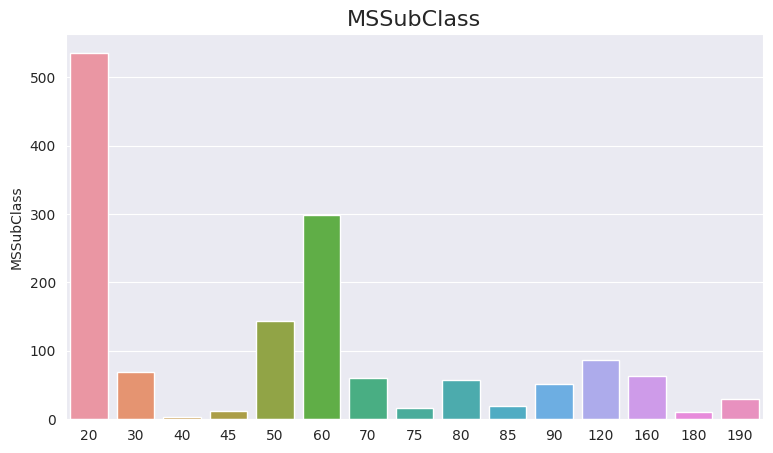

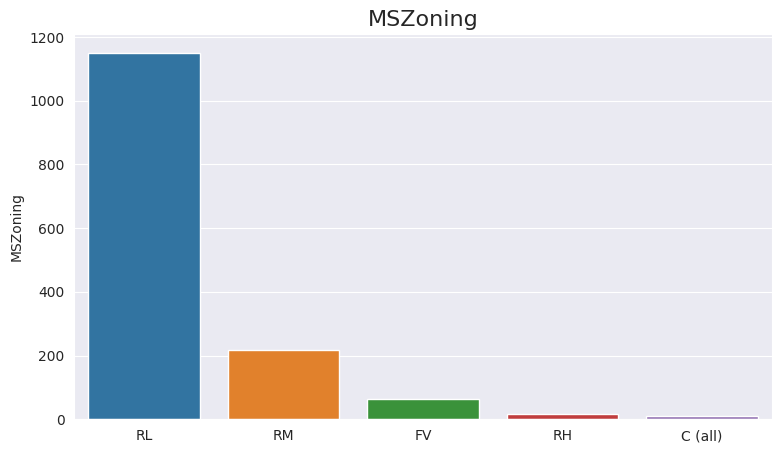

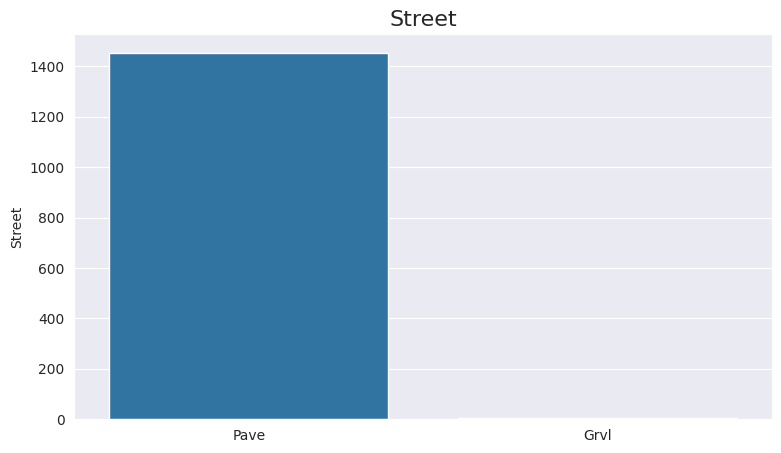

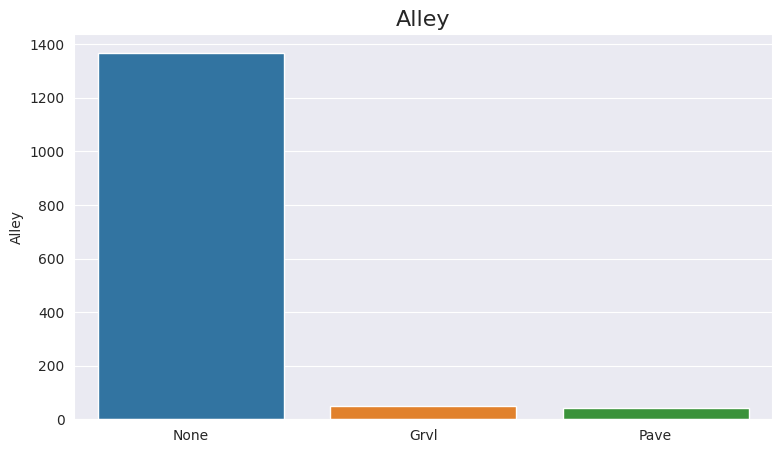

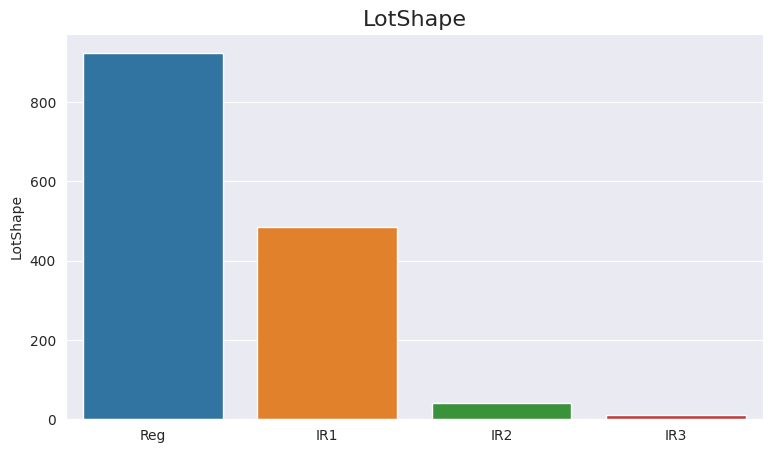

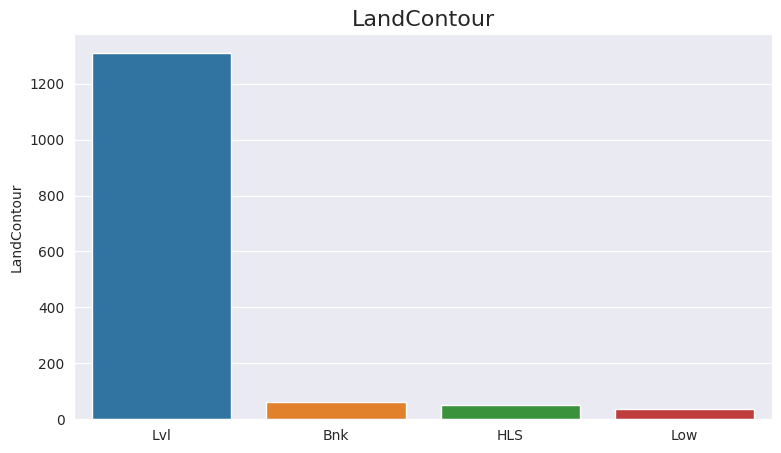

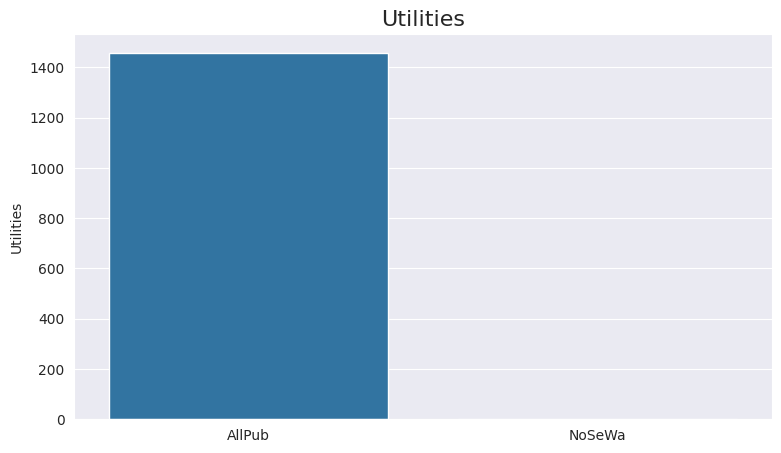

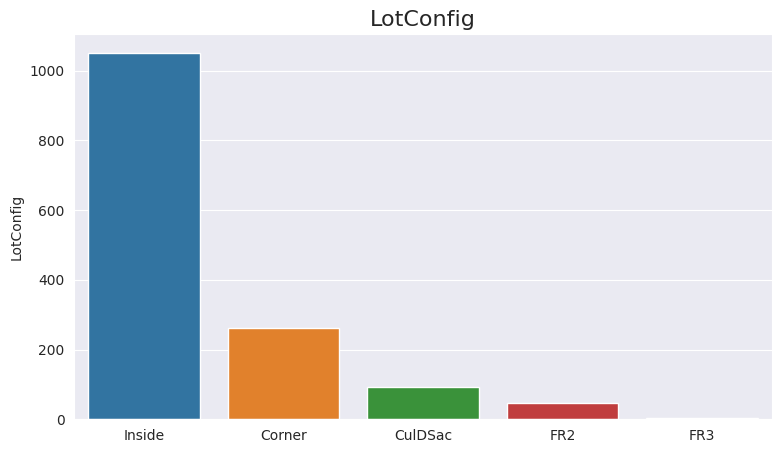

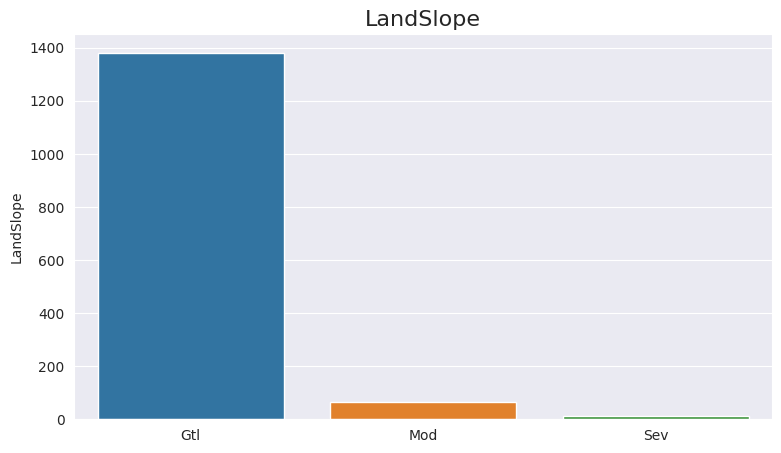

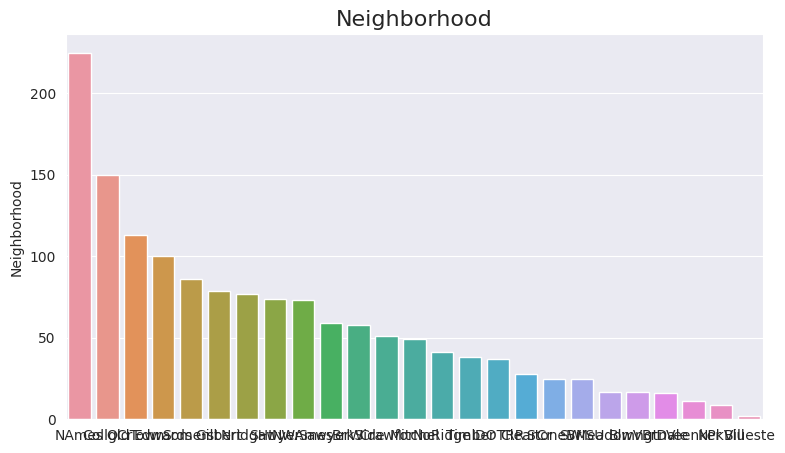

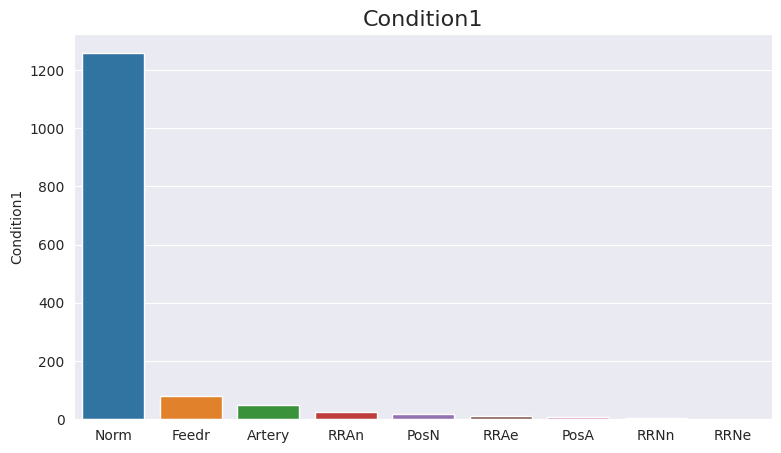

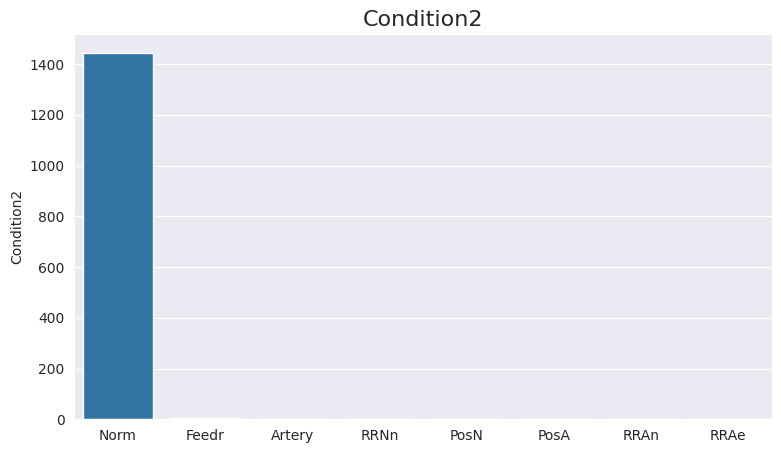

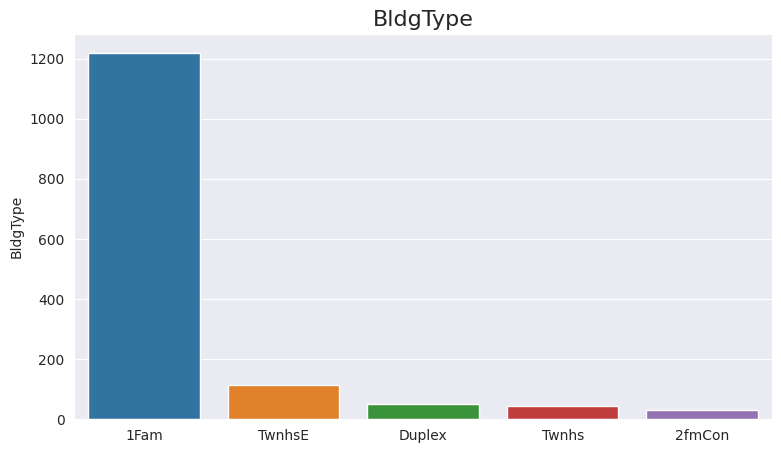

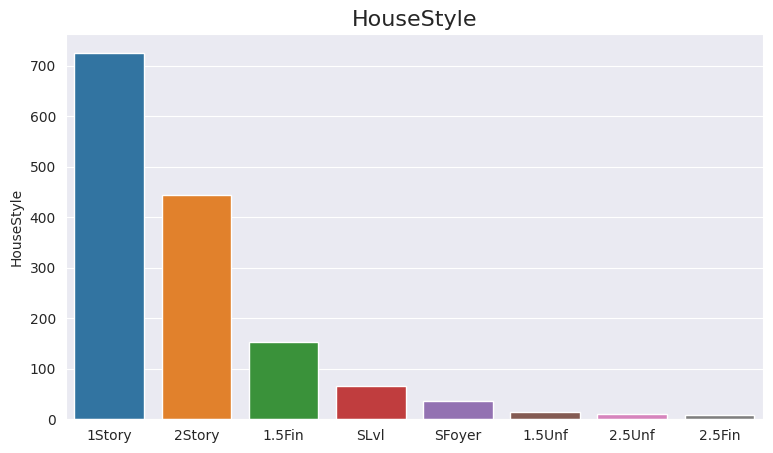

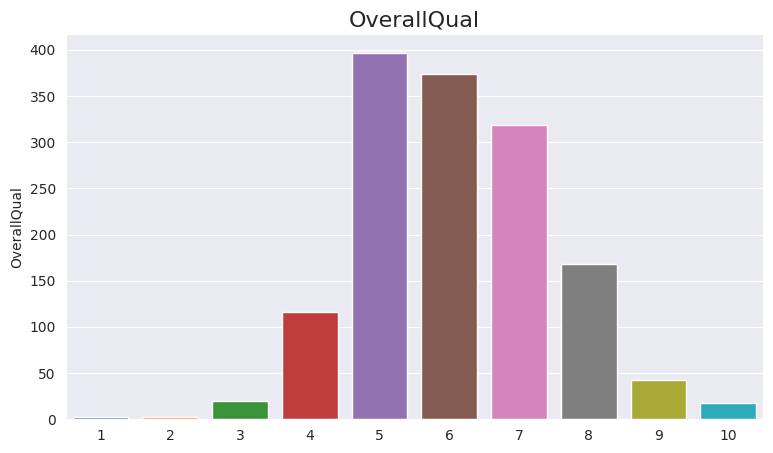

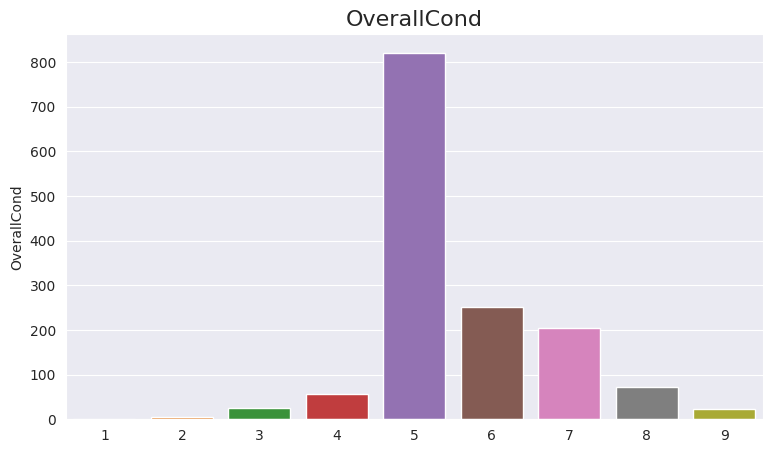

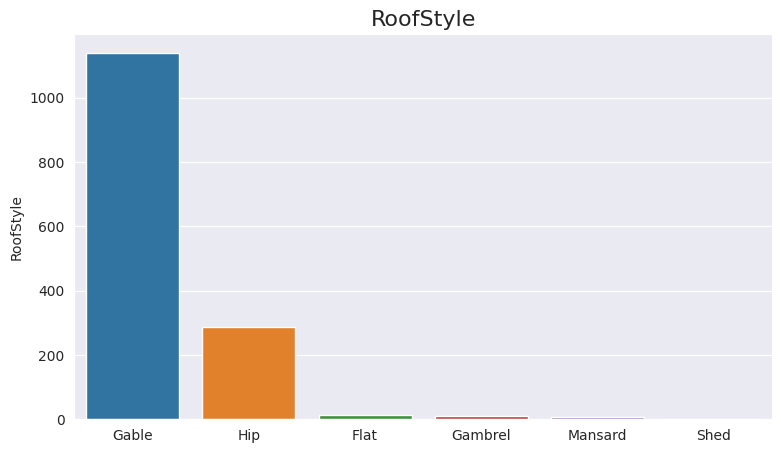

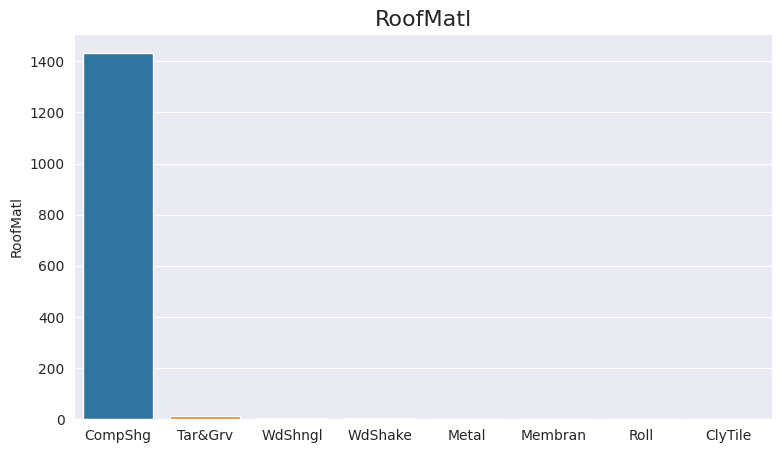

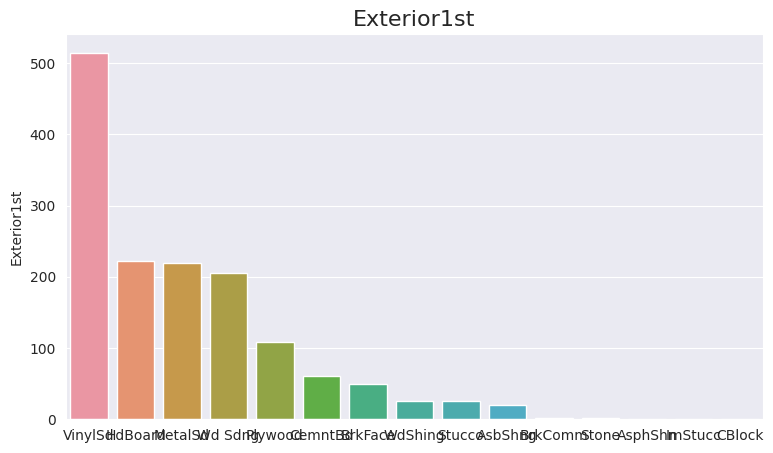

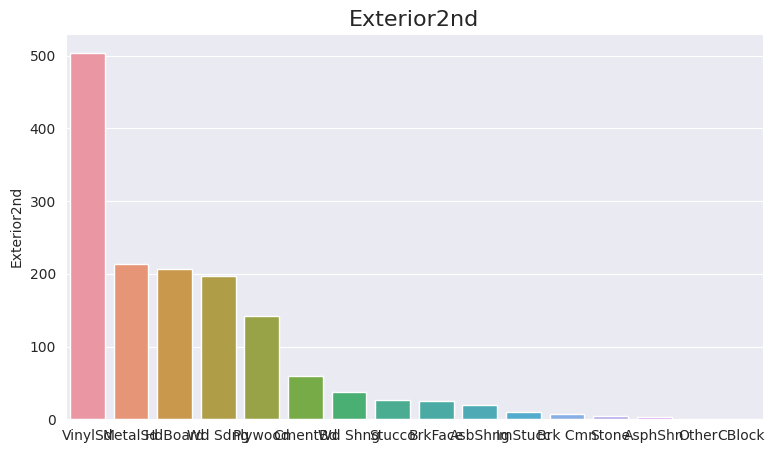

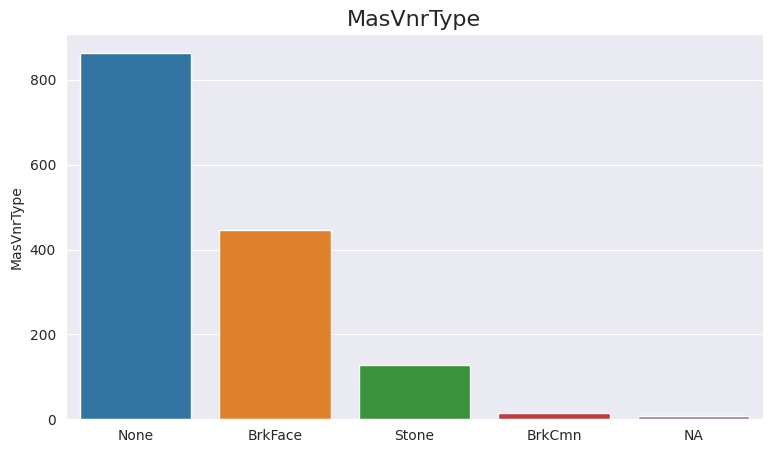

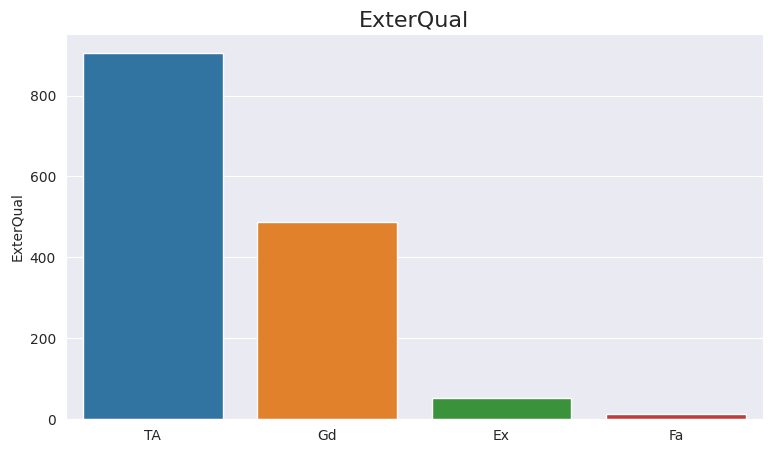

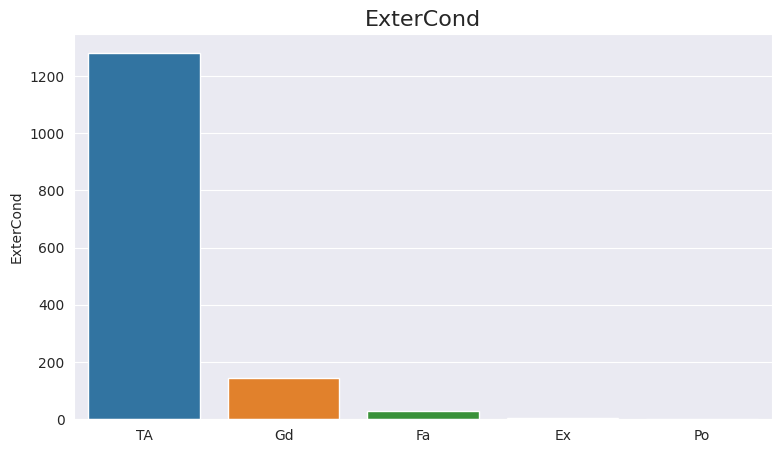

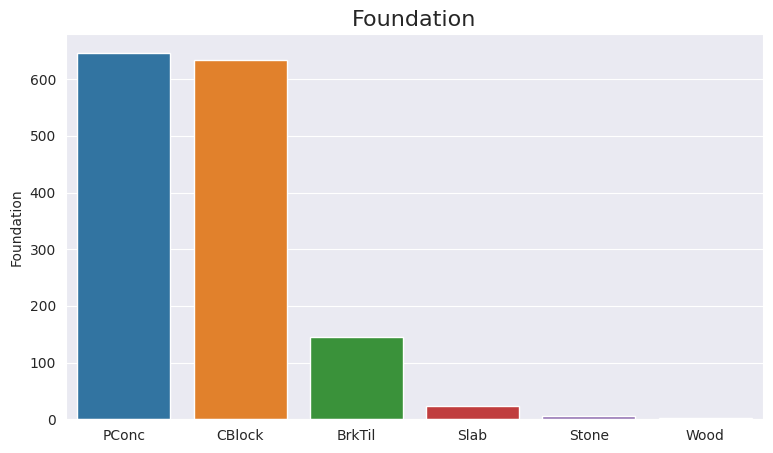

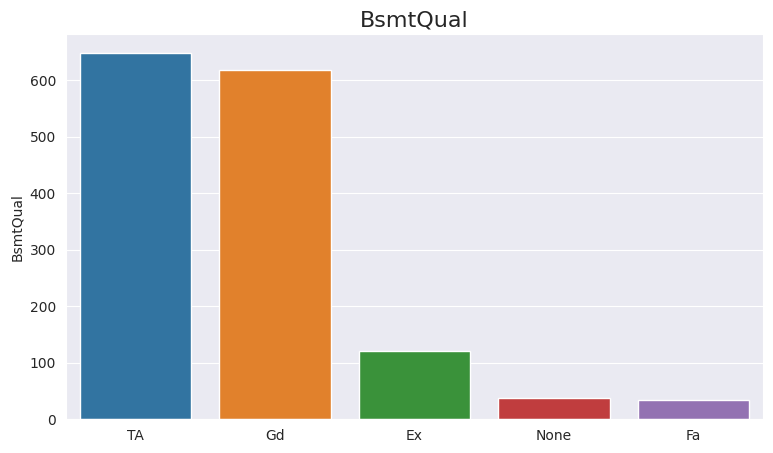

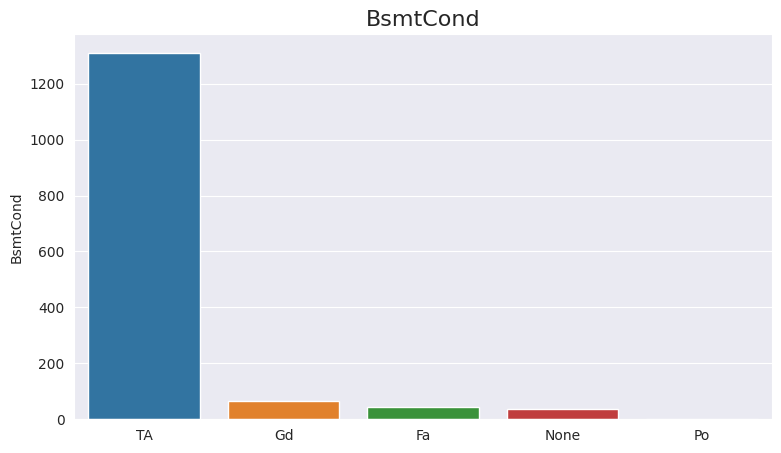

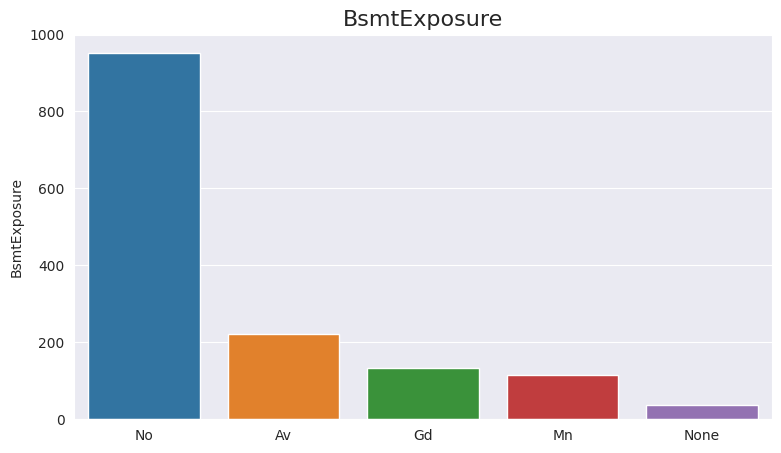

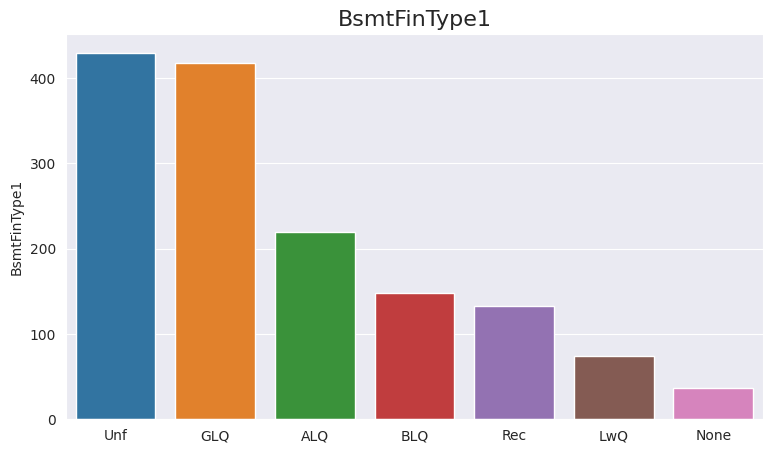

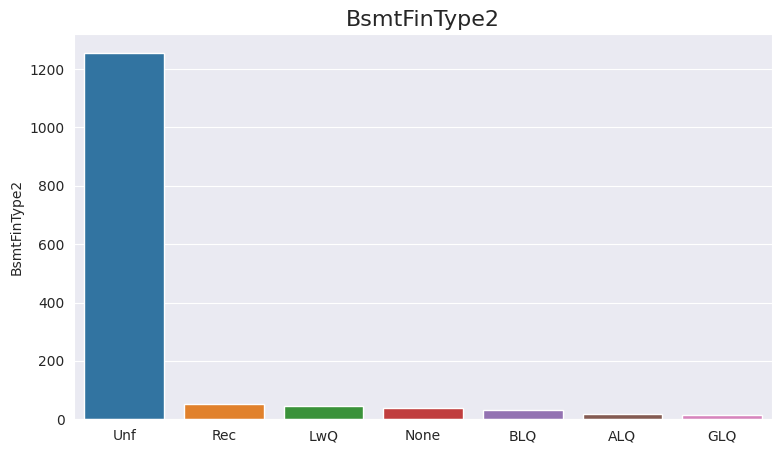

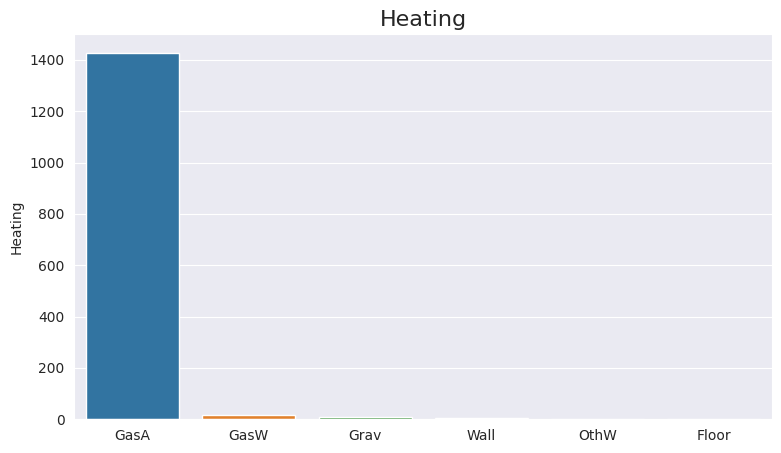

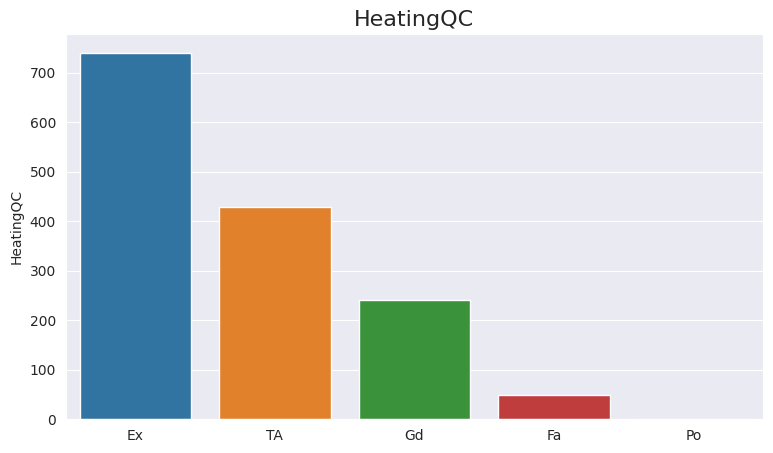

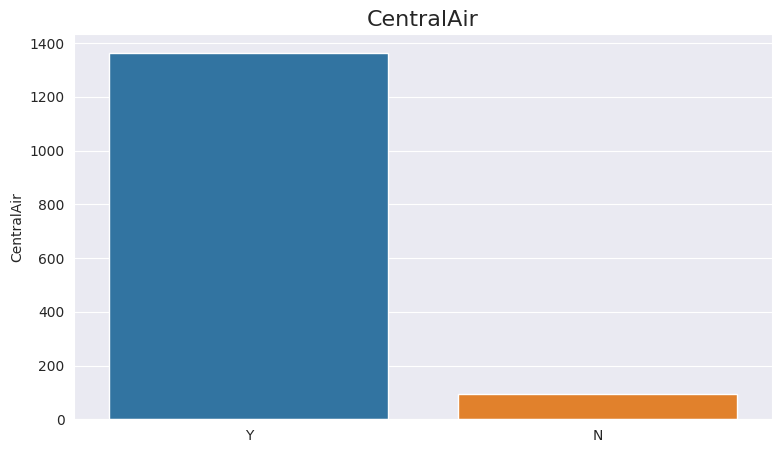

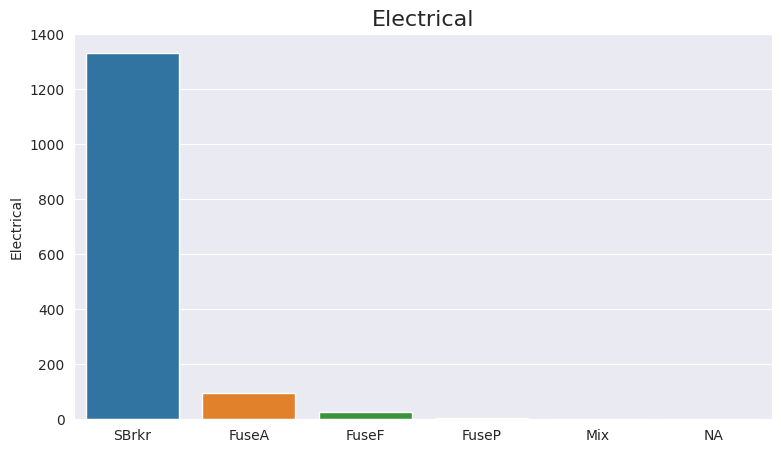

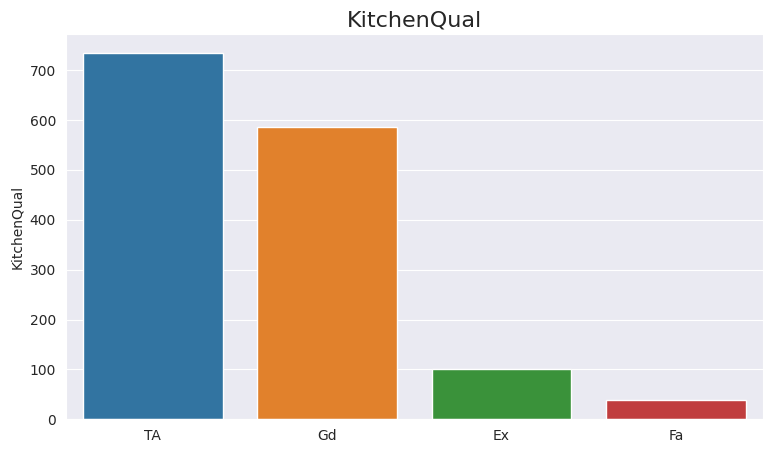

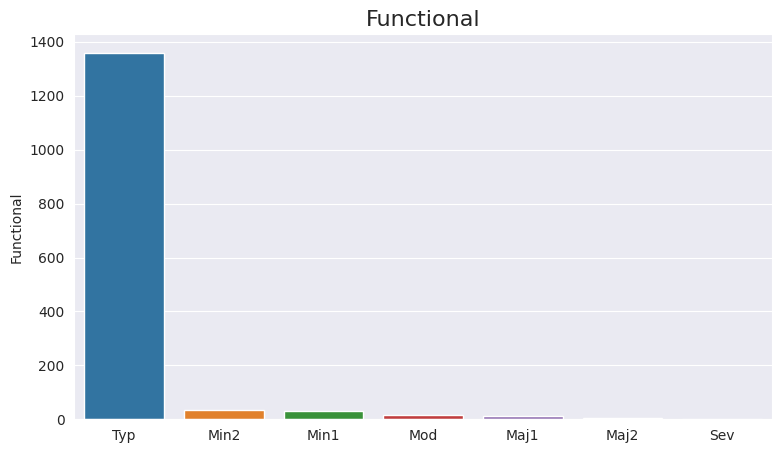

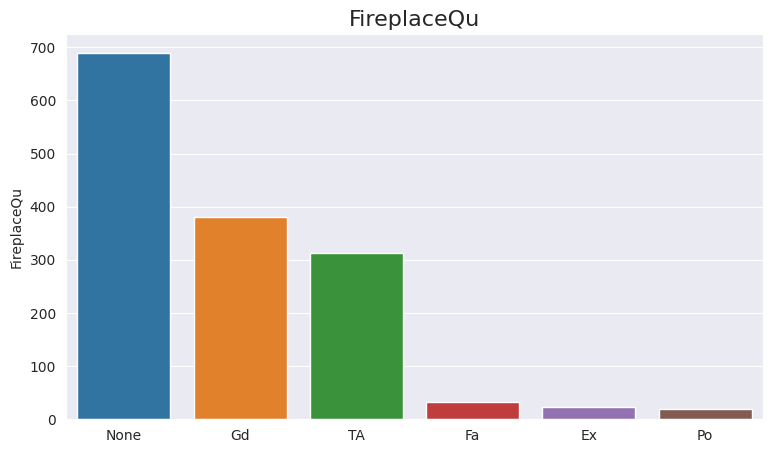

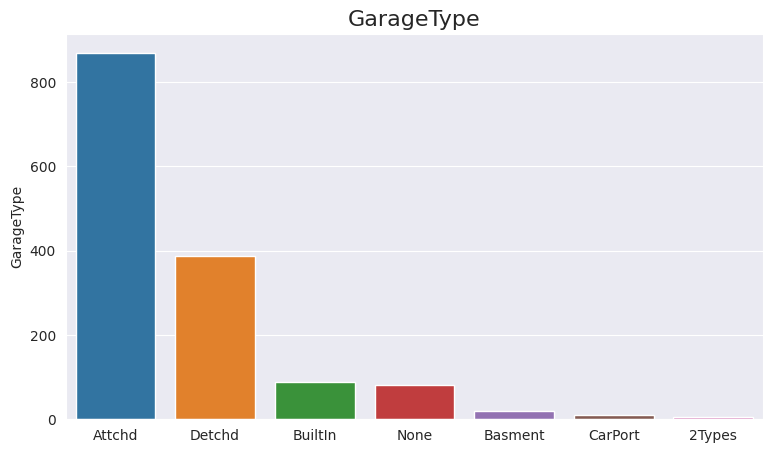

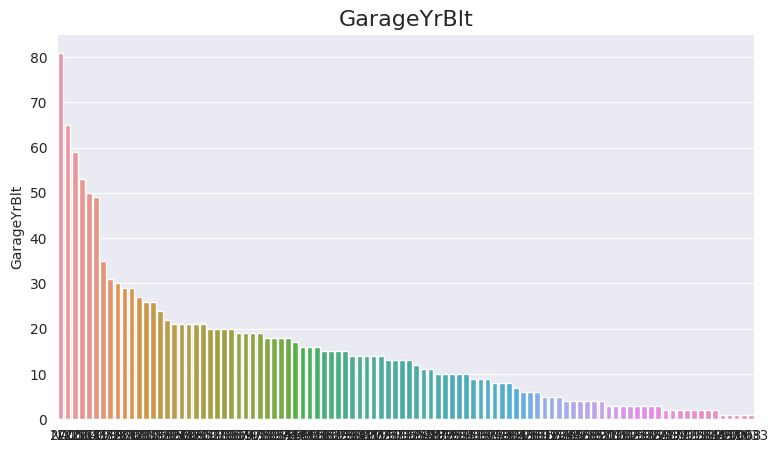

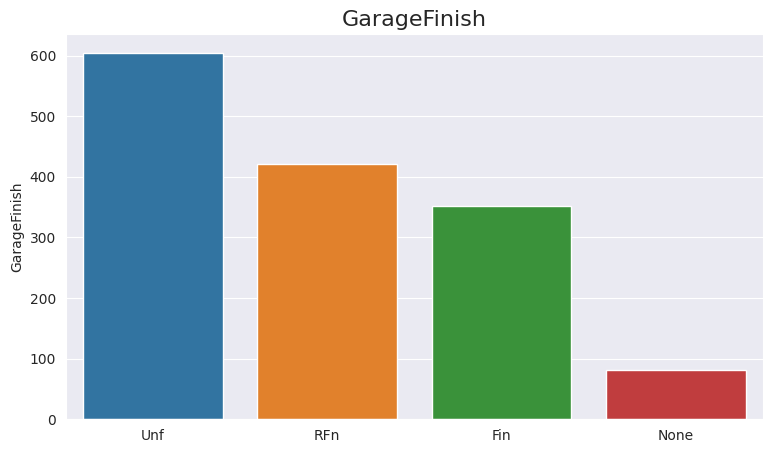

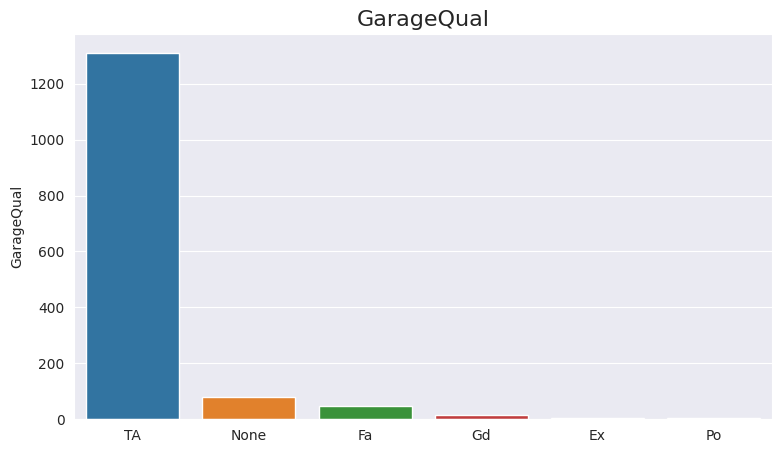

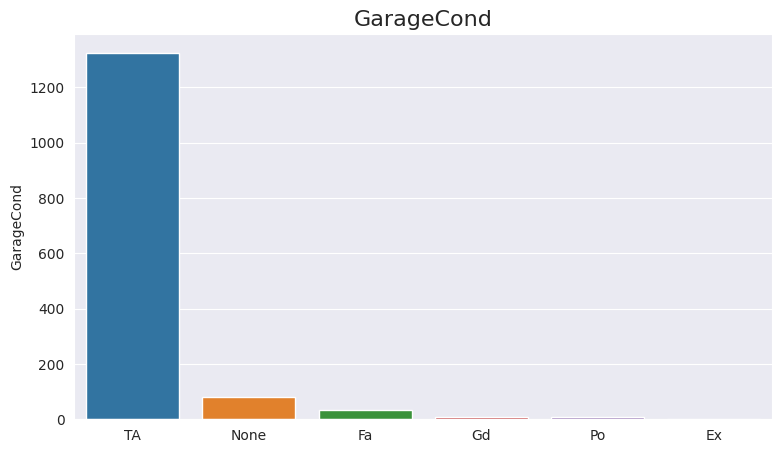

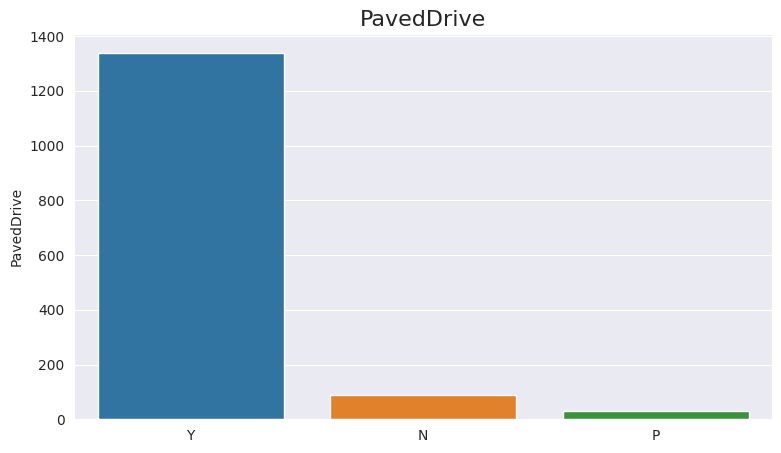

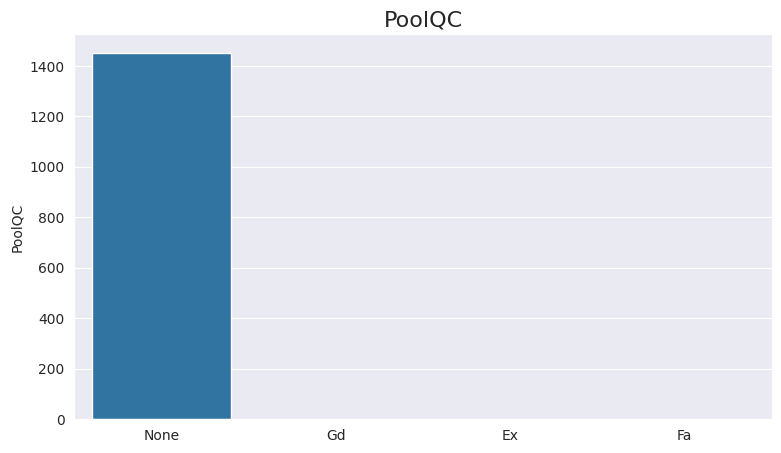

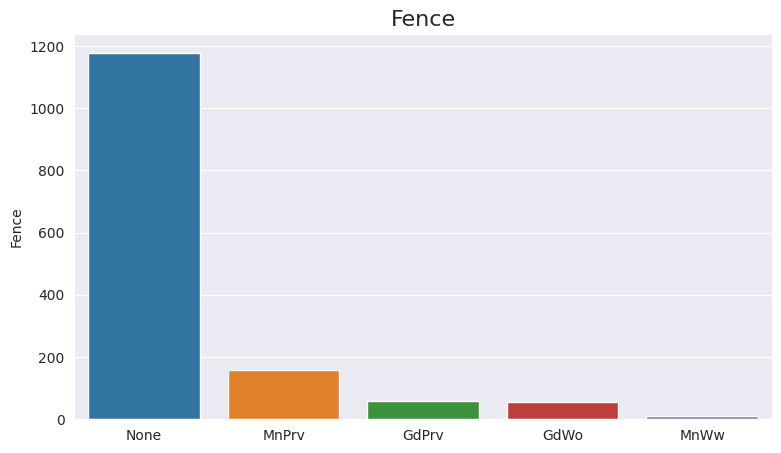

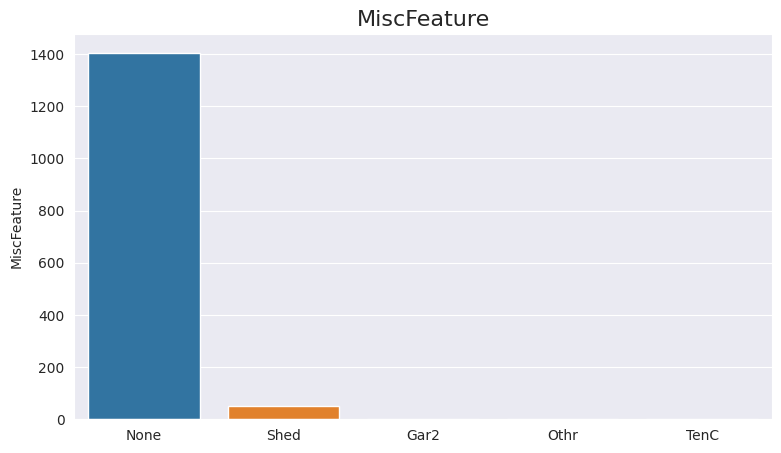

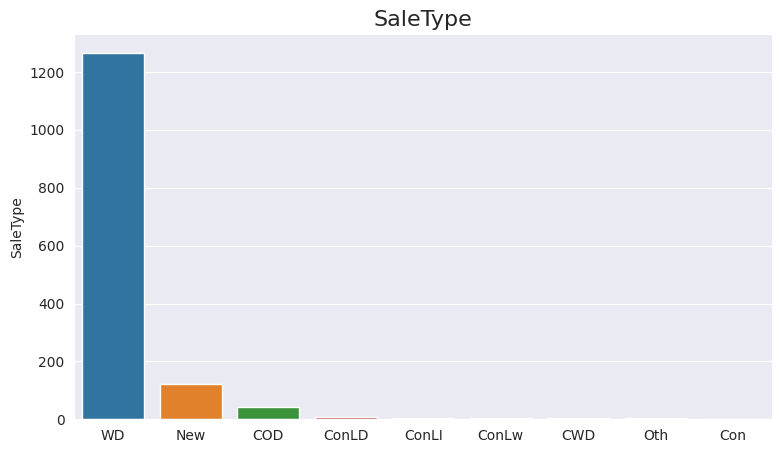

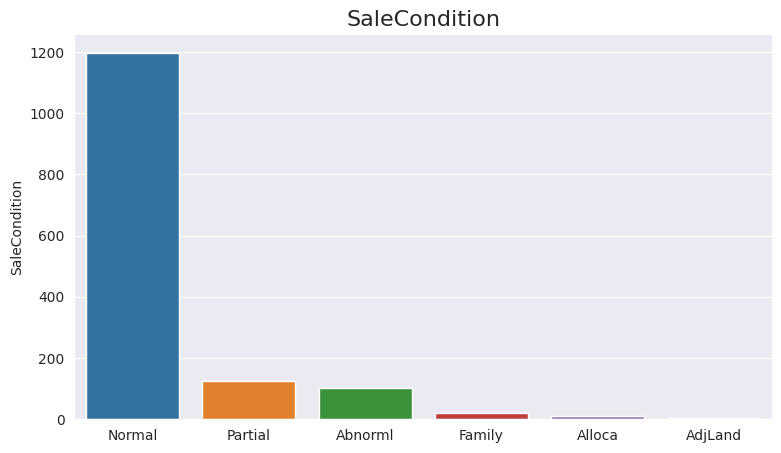

In [35]:
## Visualizing the spread and levels of categorical columns using bar plots

for col in house_sales_data_updated_cat.columns:
    plt.figure(figsize=(9,5))
    plt.title(col, fontdict={'fontsize': 16})
    sns.barplot(house_sales_data_updated_cat, x = house_sales_data_updated_cat[col].value_counts().index, y = house_sales_data_updated_cat[col].value_counts())

    plt.show()

### Based on above results, there is no such column with just one value which might be easy to remove before actual model building.

## Bivariate Analysis

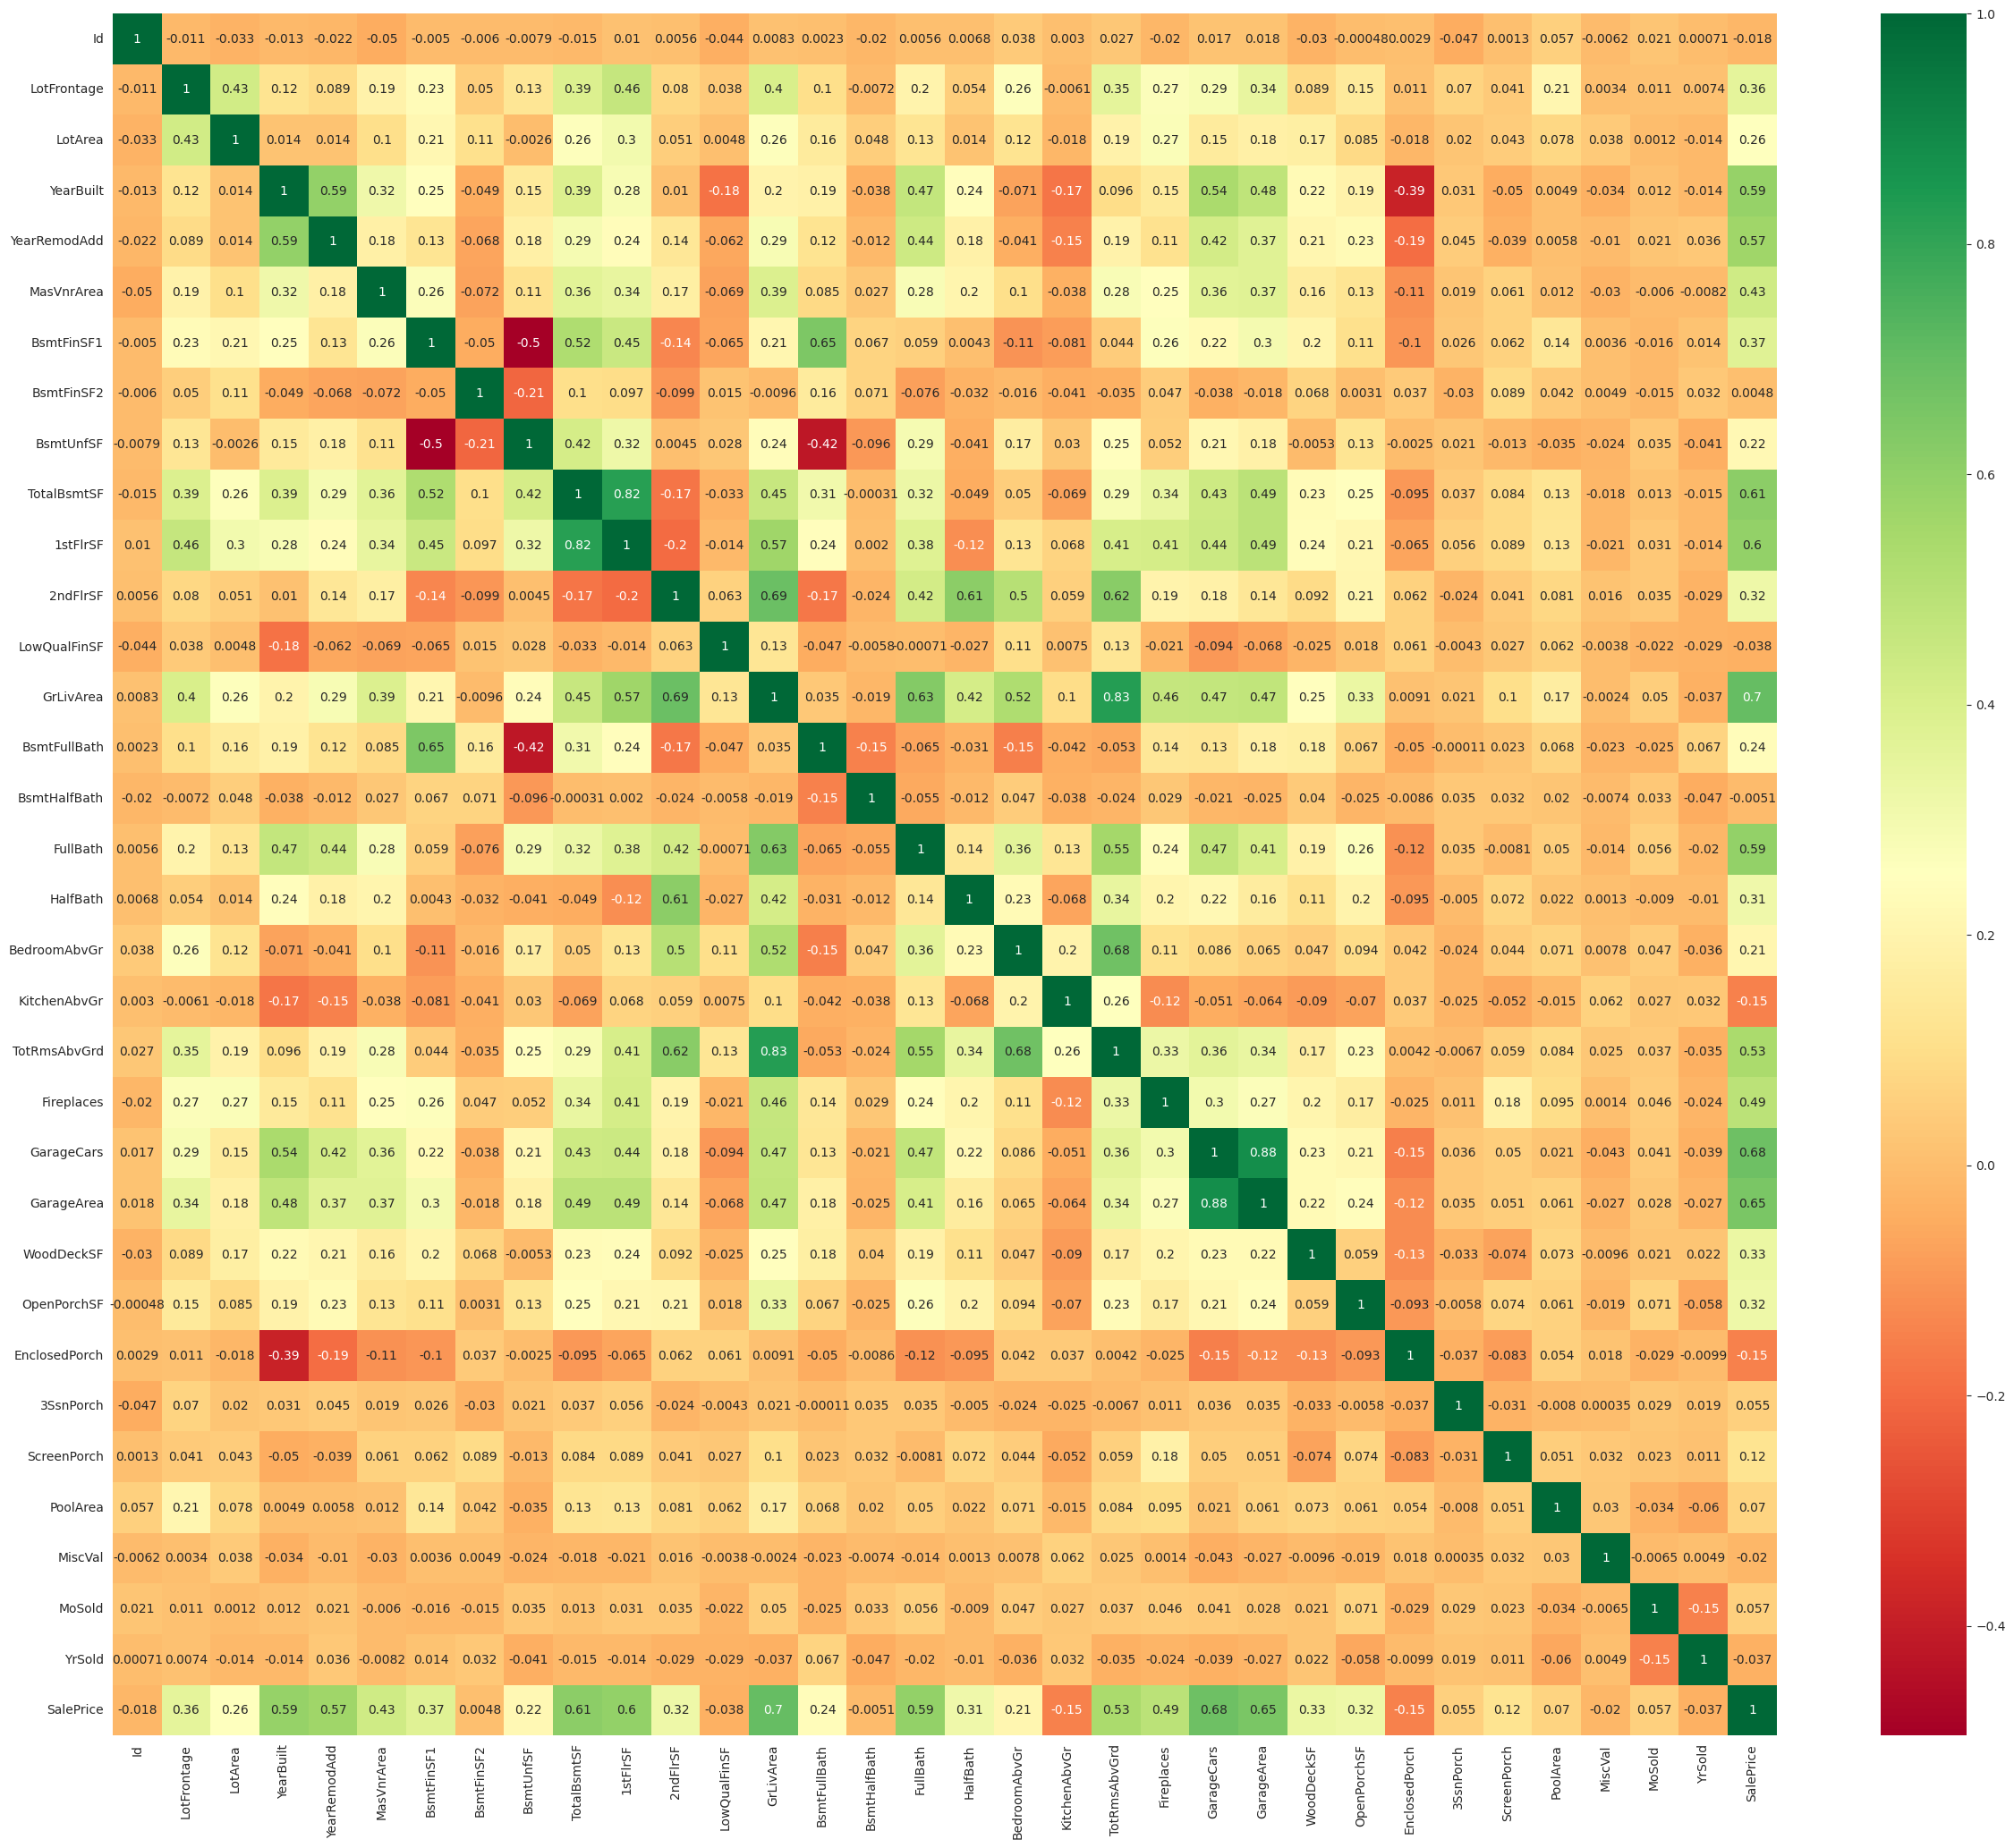

In [36]:
# Using HeatMap to find correlations b/w the numerical variables

plt.figure(figsize=(30,25))
sns.heatmap(house_sales_data_updated_num.corr(), annot=True, cmap='RdYlGn');

### Observations 
1. Many variables are highly correlated with each other.
2. Target variable SalePrice is highly correlated with GrLivArea, GarageCars and GarageArea.
3. As there is multicollinearity among predictors in our data, it would be good to use Ridge Regression.


# Creating Derived Column

In [37]:
## To determine age of house. Creating a derived column - Age

house_sales_data_updated['Age'] = house_sales_data_updated['YrSold'] - house_sales_data_updated['YearBuilt']

In [38]:
## Drop the two columns using which we created Age
house_sales_data_updated.drop(['YrSold', 'YearBuilt'], axis=1, inplace=True)

In [40]:
# VIewing first 5 rows
house_sales_data_updated.head()

Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1         60       RL         65.0     8450   Pave  None      Reg   
1   2         20       RL         80.0     9600   Pave  None      Reg   
2   3         60       RL         68.0    11250   Pave  None      IR1   
3   4         70       RL         60.0     9550   Pave  None      IR1   
4   5         60       RL         84.0    14260   Pave  None      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle OverallQual OverallCond  YearRemodAdd  \
0       Norm     1Fam     2Story           7           5          2003   
1       Norm     1Fam     1Story           6           8          1976   
2       Norm     1Fam     2Story           7           5          2002   
3       Norm     1Fam     2Story           7           5          1970   
4       Norm     1Fam     2Story           8           5          2000   

  RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
0     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd   
1     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA   
2     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd   
3     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0        TA   
4     Gable  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd   

  ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0        TA      PConc       Gd       TA           No          GLQ   
1        TA     CBlock       Gd       TA           Gd          ALQ   
2        TA      PConc       Gd       TA           Mn          GLQ   
3        TA     BrkTil       TA       Gd           No          ALQ   
4        TA      PConc       Gd       TA           Av          GLQ   

   BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  \
0         706          Unf           0        150          856    GasA   
1         978          Unf           0        284         1262    GasA   
2         486          Unf           0        434          920    GasA   
3         216          Unf           0        540          756    GasA   
4         655          Unf           0        490         1145    GasA   

  HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        Ex          Y      SBrkr       856       854             0   
1        Ex          Y      SBrkr      1262         0             0   
2        Ex          Y      SBrkr       920       866             0   
3        Gd          Y      SBrkr       961       756             0   
4        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0        None   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Typ           1          Gd   
4             1          Gd             9  

# Data Pre-Processing

## Missing Value Treatments

In [41]:
# We know LotFrontage and MasVnrArea have missing values 
house_sales_data_updated.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

In [42]:
## As they are numerical values ,we can replace them by their means.

house_sales_data_updated['LotFrontage'].fillna(house_sales_data_updated['LotFrontage'].mean(), inplace=True)
house_sales_data_updated['MasVnrArea'].fillna(house_sales_data_updated['MasVnrArea'].mean(), inplace=True)

In [43]:
# Verifying if empty values are filled now. Data looks clean now
house_sales_data_updated.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

## Dummy Variable Creation

In [44]:
## Separate the categorical and numerical features again from original dataframe as we have added a derived column and removed two columns

house_sales_data_updated_num = house_sales_data_updated.select_dtypes(include=['int64', 'float64'])
house_sales_data_updated_cat = house_sales_data_updated.select_dtypes(include='object')

In [45]:
## Creating dummy variables out of all categorical variables

house_sales_data_updated_cat_dummy = pd.get_dummies(house_sales_data_updated_cat, drop_first=True)
house_sales_data_updated_cat_dummy.head()

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   Alley_None  Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
0           1           0             0             0             1   
1           1           0             0             0             1   
2           1           0             0             0             0   
3           1           0             0             0             0   
4           1           0             0             0             0   

   LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  \
0                0                0                1                 0   
1                0                0                1                 0   
2                0                0                1                 0   
3                0                0                1                 0   
4                0                0                1                 0   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0                  0              0              0                 1   
1                  0              1              0                 0   
2                  0              0              0                 1   
3                  0              0              0                 0   
4                  0              1              0                 0   

   LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  \
0              0              0                     0                    0   
1              0              0                     0                    0   
2              0              0                     0                    0   
3              0              0                     0                    0   
4              0              0                     0                    0   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                     0                     0                     1   
1                     0                     0                     0   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     0   

   N

In [46]:
## Check the dimensions
## Now there are 353 columns

house_sales_data_updated_cat_dummy.shape

(1460, 353)

## Outlier Treatment

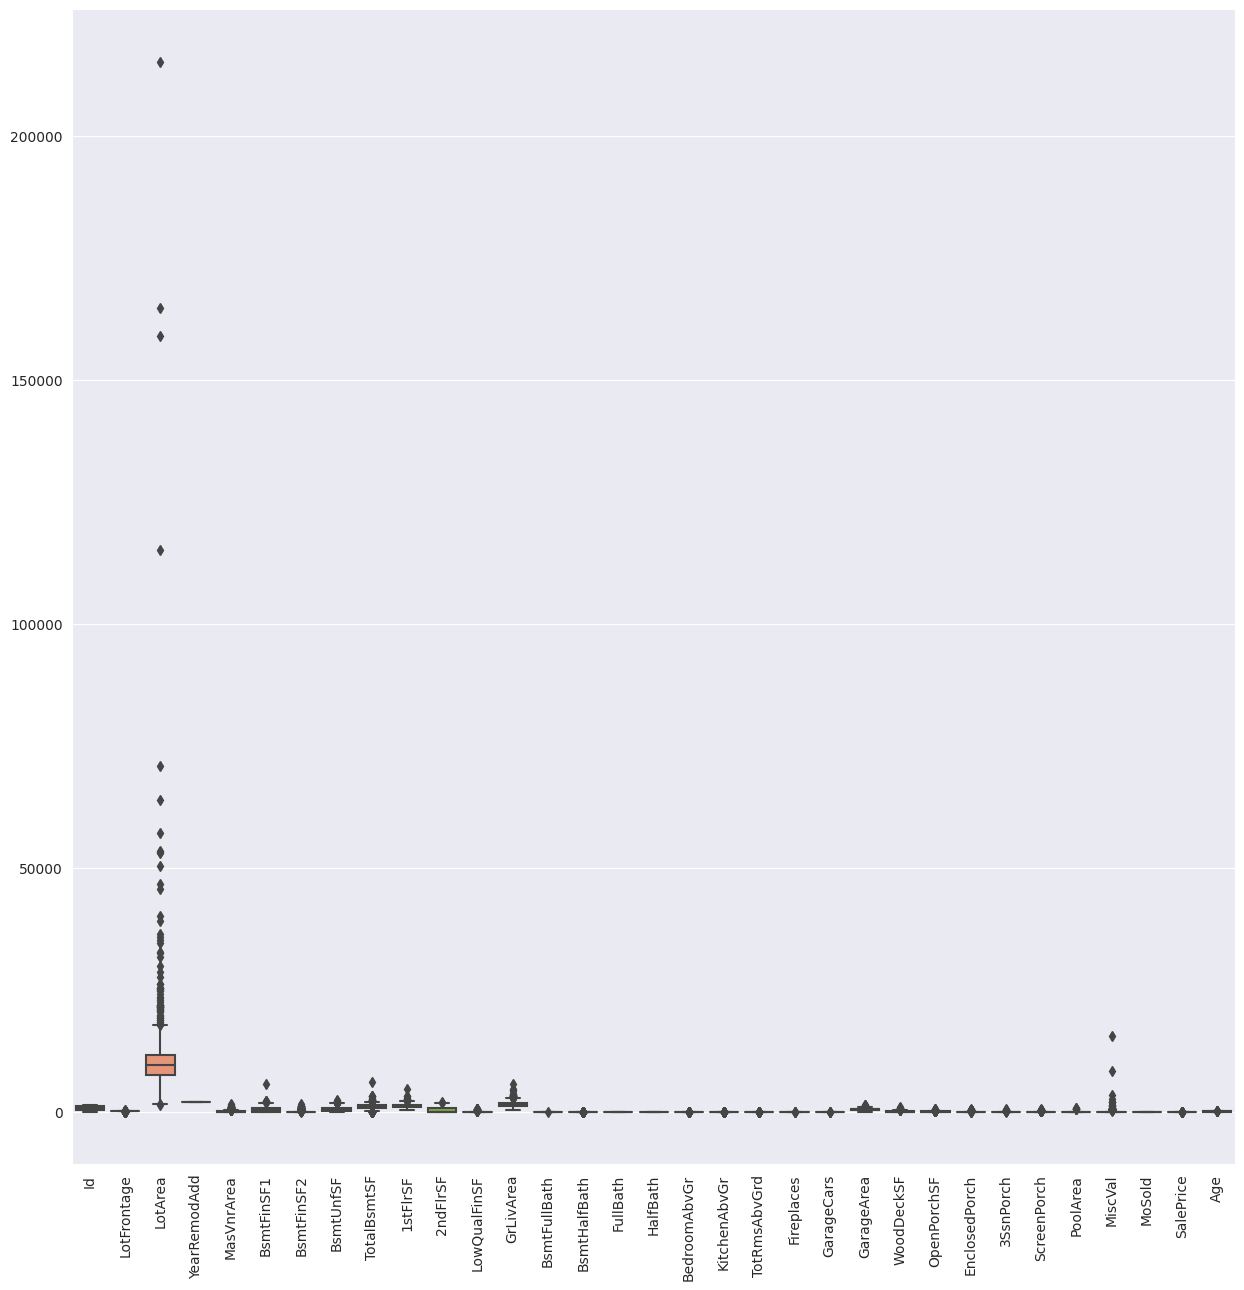

In [47]:
## Using boxplots to check outliers in numerical columns

plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=house_sales_data_updated_num);

In [48]:
## Capping outliers to 5% at lower bound and 95% at upper bound
for col in house_sales_data_updated_num.columns:
    house_sales_data_updated_num[col][house_sales_data_updated_num[col] <= house_sales_data_updated_num[col].quantile(0.05)] = house_sales_data_updated_num[col].quantile(0.05)
    house_sales_data_updated_num[col][house_sales_data_updated_num[col] >= house_sales_data_updated_num[col].quantile(0.95)] = house_sales_data_updated_num[col].quantile(0.95)

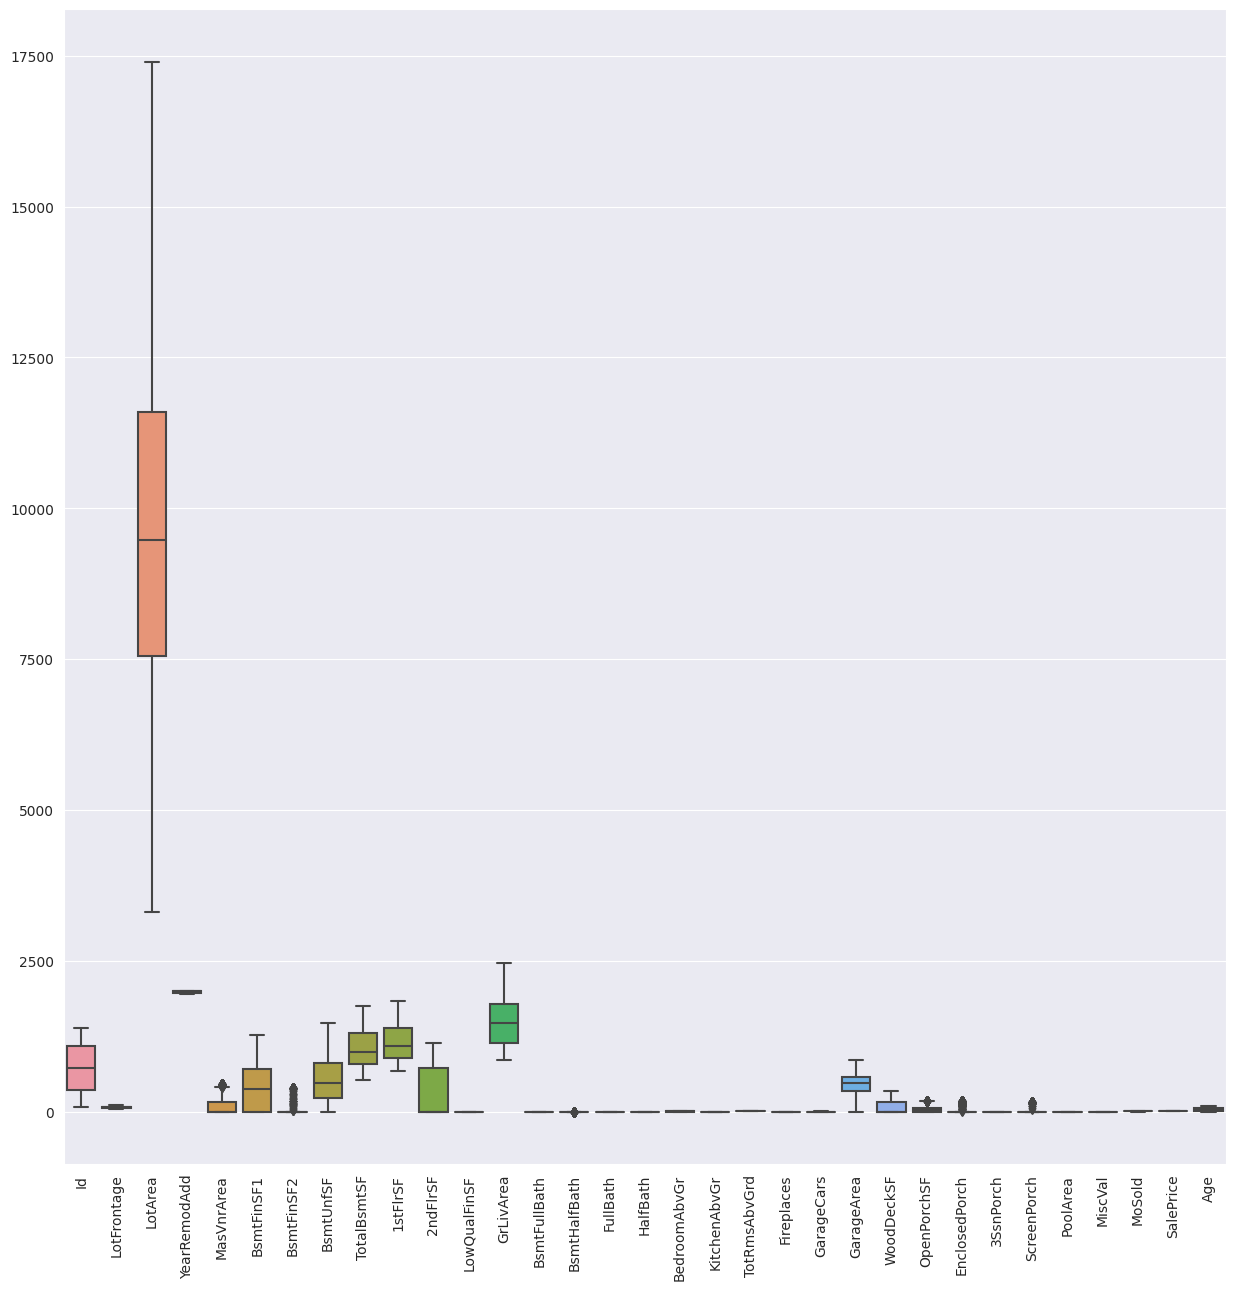

In [49]:
## Check the boxplots again to see if outliers have been treated
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=house_sales_data_updated_num);

### Outliers have been removed from the data now.

### Now we need to combine the dataframe with numerical columns ( treated for outliers ) and categorical columns ( added dummy variables )

In [50]:
house_sales_data_processed = pd.concat([house_sales_data_updated_num, house_sales_data_updated_cat_dummy], axis=1)


## View the first few rows of our dataframe
house_sales_data_processed.head()

Id  LotFrontage  LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0  73.95         65.0   8450.0          2003       196.0         706   
1  73.95         80.0   9600.0          1976         0.0         978   
2  73.95         68.0  11250.0          2002       162.0         486   
3  73.95         60.0   9550.0          1970         0.0         216   
4  73.95         84.0  14260.0          2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0         0.0        150        856.0     856.0     854.0             0   
1         0.0        284       1262.0    1262.0       0.0             0   
2         0.0        434        920.0     920.0     866.0             0   
3         0.0        540        756.0     961.0     756.0             0   
4         0.0        490       1145.0    1145.0    1053.0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0     1710.0             1             0         2         1             3   
1     1262.0             0             1         2         0             3   
2     1786.0             1             0         2         1             3   
3     1717.0             1             0         1         0             3   
4     2198.0             1             0         2         1             4   

   KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
0             1             8           0           2       548.0           0   
1             1             6           1           2       460.0         298   
2             1             6           1           2       608.0           0   
3             1             7           1           3       642.0           0   
4             1             9           1           3       836.0         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0         61.0           0.00          0            0         0        0   
1          0.0           0.00          0            0         0        0   
2         42.0           0.00          0            0         0        0   
3         35.0         180.15          0            0         0        0   
4         84.0           0.00          0            0         0        0   

   MoSold  SalePrice  Age  MSSubClass_30  MSSubClass_40  MSSubClass_45  \
0       2  12.247694    5              0              0              0   
1       5  12.109011   31              0              0              0   
2       9  12.317167    7              0              0              0   
3       2  11.849398   91              0              0              0   
4      11  12.429216    8              0              0              0   

   MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  \
0              0              1              0              0              0   
1              0              0              0              0              0   
2              0              1              0              0              0   
3              0              0              1              0              0   
4              0              1              0              0              0   

   MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  \
0              0              0               0               0   
1              0              0               0               0   
2              0              0               0               0   
3              0              0               0               0   
4              0              0               0               0   

   MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0               0               0            0            0            1   
1               0               0            0            0            1   
2               0               0            0            0            1   
3               0               0            0            0            1   


### Now Dataset is clean and we can proceed to build the model

# Model Building, Tuning and Evaluation

In [51]:
## X contains all independent variables use to make predictions. We can drop ID column which is not useful and our target variable - SalePrice

X = house_sales_data_processed.drop(["Id", "SalePrice"], axis=1).copy()
X.head()

LotFrontage  LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
0         65.0   8450.0          2003       196.0         706         0.0   
1         80.0   9600.0          1976         0.0         978         0.0   
2         68.0  11250.0          2002       162.0         486         0.0   
3         60.0   9550.0          1970         0.0         216         0.0   
4         84.0  14260.0          2000       350.0         655         0.0   

   BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0        150        856.0     856.0     854.0             0     1710.0   
1        284       1262.0    1262.0       0.0             0     1262.0   
2        434        920.0     920.0     866.0             0     1786.0   
3        540        756.0     961.0     756.0             0     1717.0   
4        490       1145.0    1145.0    1053.0             0     2198.0   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

   TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0             8           0           2       548.0           0         61.0   
1             6           1           2       460.0         298          0.0   
2             6           1           2       608.0           0         42.0   
3             7           1           3       642.0           0         35.0   
4             9           1           3       836.0         192         84.0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  Age  \
0           0.00          0            0         0        0       2    5   
1           0.00          0            0         0        0       5   31   
2           0.00          0            0         0        0       9    7   
3         180.15          0            0         0        0       2   91   
4           0.00          0            0         0        0      11    8   

   MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            

In [52]:
## Separate out the target variable as y which we want to predict

y = house_sales_data_processed["SalePrice"].copy()
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

## Train-Test Split

In [53]:
## Splitting X and y into 80% train data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [54]:
## Check dimensions of train data
print(X_train.shape)
print(y_train.shape)

(1168, 384)
(1168,)


In [56]:
## Check dimensions of test data
print(X_test.shape)
print(y_test.shape)

(292, 384)
(292,)


## Scaling Numerical Columns

In [57]:
## Create a list of numerical columns to be scaled
num_cols = list(X_train.select_dtypes(include=['int64', 'float64']).columns)
num_cols

['LotFrontage',
 'LotArea',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'Age']

In [58]:
## Create a scaling instance
scaler = StandardScaler()

## Scaling the numerical columns 
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

## Model 1 - Ridge Regression

In [59]:
## Defining function for checking metrics 
def show_metrics(y_train, y_train_pred, y_test, y_pred):
    ''' 
    Takes in the values of true y_train and y_test, and predicted y_train and y_test.
    Prints out 
    1. R-Squared (Train)
    2. R-Squared (Test)
    3. RSS (Train)
    4. RSS (Test)
    5. MSE (Train)
    6. MSE (Test)
    7. RMSE (Train)
    8. RMSE (Test)
    
    Returns a list containing all the above 8 metrics
    
    '''
    
    ## Create a list to save all metrics (will be used in creating a final summary in the end)
    metric = []
    
    ## R-squared of train and test data
    print("R-Squared (Train) =", '%.2f' % r2_score(y_train, y_train_pred))
    metric.append(r2_score(y_train, y_train_pred))
    print("R-Squared (Test) =", '%.2f' % r2_score(y_test, y_pred))
    metric.append(r2_score(y_test, y_pred))

     ## Residual sum of squares of train and test data
    rss_train = np.sum(np.square(y_train - y_train_pred))
    metric.append(rss_train)
    rss_test = np.sum(np.square(y_test - y_pred))
    metric.append(rss_test)
    print("RSS (Train) =", '%.2f' % rss_train)
    print("RSS (Test) =", '%.2f' % rss_test)
    
    
    ## Mean Squared Error of train and test data
    mse_train = mean_squared_error(y_train, y_train_pred)
    metric.append(mse_train)
    mse_test = mean_squared_error(y_test, y_pred)
    metric.append(mse_test)
    print("MSE (Train) =", '%.2f' % mse_train)
    print("MSE (Test) =", '%.2f' % mse_test)
    

    
    # Root Mean Squared Error for train and test data
    rmse_train = mse_train**0.5
    metric.append(rmse_train)
    rmse_test = mse_test**0.5
    metric.append(rmse_test)
    print("RMSE (Train) =", '%.2f' % rmse_train) 
    print("RMSE (Test) =", '%.2f' % rmse_test) 
    

    return metric


In [60]:
## Now to create a Ridge Regression model
## we will run a cross validation on a list of alphas to find the optimum value of alpha

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

ridge = Ridge()

# cross validation

ridgeCV = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
ridgeCV.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [62]:
## Gather optimal value of alpha
ridgeCV.best_params_

{'alpha': 10.0}

In [63]:
## Check the results of cross validation search
ridgeCV.cv_results_

{'mean_fit_time': array([0.03984694, 0.03593593, 0.03732829, 0.03608346, 0.03545413,
        0.03423777, 0.03560572, 0.03454595, 0.03947558, 0.03362803,
        0.03372259, 0.03420534, 0.03480616, 0.03372755, 0.03459973,
        0.03588219, 0.03564825, 0.03377442, 0.03620906, 0.03226314,
        0.03369365, 0.03230991, 0.03445382, 0.03278251, 0.03689647,
        0.03436227, 0.03304992, 0.03444142]),
 'std_fit_time': array([0.00561197, 0.00235759, 0.00451733, 0.00329545, 0.00126142,
        0.00107375, 0.00323213, 0.00144729, 0.01028738, 0.00080496,
        0.0007877 , 0.00299457, 0.00157001, 0.00109464, 0.00231913,
        0.00549623, 0.00526757, 0.00248503, 0.00380335, 0.00081621,
        0.0013373 , 0.00046374, 0.0015439 , 0.00093756, 0.00861732,
        0.00184149, 0.00060204, 0.00185908]),
 'mean_score_time': array([0.0076858 , 0.00761256, 0.00750508, 0.00748992, 0.00749846,
        0.00728106, 0.00776601, 0.008144  , 0.00801678, 0.01044021,
        0.01035609, 0.00829577, 0.007948

### Thus, we get optimum value of alpha as 10. Now we will build a ridge regression model using this value.

In [64]:
# Create a ridge regreesion instance with optimum value alpha=10
ridge = Ridge(alpha=10)

In [65]:
# Fit the model on training data
ridge.fit(X_train, y_train)

Ridge(alpha=10)

In [66]:
## View the coefficients of ridge regression fitted model
ridge.coef_

array([ 6.56023354e-03,  2.07307896e-02,  2.49825538e-02, -2.40354563e-03,
        1.00177182e-02, -3.15225697e-04, -1.49039561e-02,  5.20474484e-02,
        7.45664130e-03,  2.88435254e-02,  0.00000000e+00,  8.85807944e-02,
        8.24181724e-03, -4.24723298e-04,  1.17438229e-02,  1.25064397e-02,
        4.98554634e-03,  0.00000000e+00, -3.41180286e-04,  1.92127953e-02,
        1.68790936e-02,  1.67328322e-02,  1.23269319e-02,  7.87306236e-03,
        2.53822117e-03,  0.00000000e+00,  1.07139979e-02,  0.00000000e+00,
        0.00000000e+00, -7.78499263e-04, -5.04655943e-02, -4.07061234e-02,
        5.51648124e-03,  6.20801048e-04, -4.85860044e-03, -5.71150836e-03,
        3.91666483e-02,  3.10825761e-02,  7.08003745e-04,  4.75844066e-03,
       -3.48924107e-02,  5.93672173e-03, -5.14776147e-02, -1.19237188e-02,
       -1.79847431e-02,  3.50102825e-02,  1.44037721e-02,  1.11946464e-02,
       -2.40515945e-02, -5.34877888e-03, -5.46542710e-03,  1.64560909e-02,
        1.08365421e-02, -

In [67]:
## Make predictions
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [68]:
## Check metrics
ridge_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.94
R-Squared (Test) = 0.93
RSS (Train) = 8.53
RSS (Test) = 2.87
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.09
RMSE (Test) = 0.10


### Now, we will plot R2 Score against different values of alpha for both train and test sets

In [69]:
## Create a dataframe of ridge cross validation results
ridgeCV_results= pd.DataFrame(ridgeCV.cv_results_)
ridgeCV_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.039847      0.005612         0.007686        0.000340      0.0001   
1        0.035936      0.002358         0.007613        0.000455       0.001   
2        0.037328      0.004517         0.007505        0.000334        0.01   
3        0.036083      0.003295         0.007490        0.000301        0.05   
4        0.035454      0.001261         0.007498        0.000345         0.1   
5        0.034238      0.001074         0.007281        0.000147         0.2   
6        0.035606      0.003232         0.007766        0.000539         0.3   
7        0.034546      0.001447         0.008144        0.000769         0.4   
8        0.039476      0.010287         0.008017        0.000950         0.5   
9        0.033628      0.000805         0.010440        0.004108         0.6   
10       0.033723      0.000788         0.010356        0.006241         0.7   
11       0.034205      0.002995         0.008296        0.000335         0.8   
12       0.034806      0.001570         0.007949        0.000988         0.9   
13       0.033728      0.001095         0.007818        0.000420         1.0   
14       0.034600      0.002319         0.007464        0.000287         2.0   
15       0.035882      0.005496         0.007652        0.000491         3.0   
16       0.035648      0.005268         0.007674        0.000472         4.0   
17       0.033774      0.002485         0.008432        0.001910         5.0   
18       0.036209      0.003803         0.007177        0.000119         6.0   
19       0.032263      0.000816         0.007676        0.000491         7.0   
20       0.033694      0.001337         0.007790        0.000886         8.0   
21       0.032310      0.000464         0.007733        0.000607         9.0   
22       0.034454      0.001544         0.007438        0.000132        10.0   
23       0.032783      0.000938         0.008351        0.001515          20   
24       0.036896      0.008617         0.007918        0.000622          50   
25       0.034362      0.001841         0.007667        0.000416         100   
26       0.033050      0.000602         0.007579        0.000418         500   
27       0.034441      0.001859         0.007314        0.000230        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.081673          -0.101828   
1    {'alpha': 0.001}          -0.081586          -0.100936   
2     {'alpha': 0.01}          -0.080603          -0.098118   
3     {'alpha': 0.05}          -0.080104          -0.094781   
4      {'alpha': 0.1}          -0.079578          -0.092349   
5      {'alpha': 0.2}          -0.078602          -0.089576   
6      {'alpha': 0.3}          -0.077658          -0.087865   
7      {'alpha': 0.4}          -0.076766          -0.086746   
8      {'alpha': 0.5}          -0.075957          -0.085866   
9      {'alpha': 0.6}          -0.075217          -0.085126   
10     {'alpha': 0.7}          -0.074599          -0.084513   
11     {'alpha': 0.8}          -0.074151          -0.084037   
12     {'alpha': 0.9}          -0.073747          -0.083640   
13     {'alpha': 1.0}          -0.073381          -0.083293   
14     {'alpha': 2.0}          -0.070959          -0.081103   
15     {'alpha': 3.0}          -0.069506          -0.080140   
16     {'alpha': 4.0}          -0.068657          -0.079670   
17     {'alpha': 5.0}          -0.068032          -0.079504   
18     {'alpha': 6.0}          -0.067567          -0.079530   
19     {'alpha': 7.0}          -0.067257          -0.079612   
20     {'alpha': 8.0}          -0.067030          -0.079713   
21     {'alpha': 9.0}          -0.066859          -0.079824   
22    {'alpha': 10.0}          -0.066765          -0.079957   
23      {'alpha': 20}          -0.067106          -0.081396   
24      {'alpha': 50}          -0.070718          -0.085138   
25     {'alpha': 100}          -0.074230     

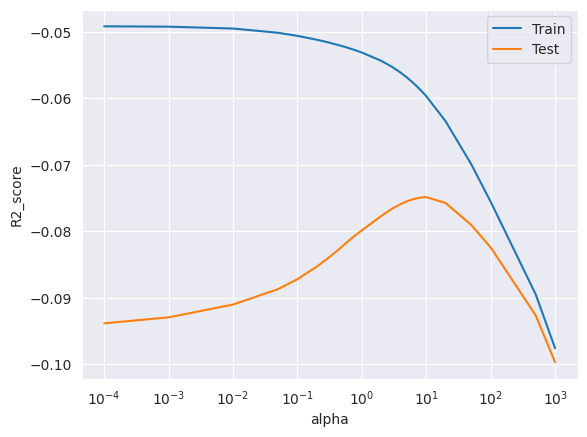

In [70]:
## Plotting R2 score vs alpha values
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_train_score'], label='Train')
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

### As the value of alpha increases, we see a decrease in train error and an initial increase followed by decrease in test error.

### From graph also, it is apparent that the optimal value of alpha is 10.

## Model 2 - Lasso

In [71]:
## Now to create a Lasso model
## we will run a cross validation on a list of alphas to find the optimum value of alpha

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation

lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lassoCV.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [72]:
## View the optimal value of alpha
lassoCV.best_params_

{'alpha': 0.001}

In [73]:
## View the results of cross validation search
lassoCV.cv_results_

{'mean_fit_time': array([0.27333856, 0.09533973, 0.04865441, 0.05092578, 0.04573369,
        0.04172883, 0.04289665, 0.04016352, 0.03874903, 0.03951788,
        0.04091897, 0.02832103, 0.02136378, 0.01866722, 0.02325134,
        0.02000041, 0.01832561, 0.01910062, 0.01973209, 0.01867838,
        0.01931529, 0.01981521, 0.01907997, 0.01925483, 0.01906657,
        0.01879964, 0.01891494, 0.0179565 ]),
 'std_fit_time': array([0.06937853, 0.03139434, 0.00379565, 0.00533052, 0.00454682,
        0.00125642, 0.00261889, 0.0020548 , 0.00276093, 0.00302343,
        0.0048627 , 0.00703934, 0.00456715, 0.0002918 , 0.00951547,
        0.00213469, 0.00018581, 0.00244362, 0.00170155, 0.00114172,
        0.00179801, 0.00140478, 0.00077391, 0.0004311 , 0.0003062 ,
        0.00063049, 0.00049602, 0.00355772]),
 'mean_score_time': array([0.01440959, 0.01287723, 0.01697636, 0.01610427, 0.01514378,
        0.01423249, 0.01477103, 0.01565795, 0.01455884, 0.01618848,
        0.01591167, 0.01162424, 0.007376

### Thus, we get optimum value of alpha as 0.001. Now we will build a lasso regression model using this value.

In [74]:
# Create a ridge regreesion instance with optimum value alpha=0.001
lasso = Lasso(alpha=0.001)

In [75]:
# Fit the model on training data
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [76]:
## View the coefficients of lasso fitted model
lasso.coef_

array([ 3.32682408e-03,  2.16451599e-02,  2.86137657e-02, -0.00000000e+00,
        2.58744193e-02,  1.54710949e-03, -0.00000000e+00,  4.26216769e-02,
       -0.00000000e+00,  1.06155389e-02,  0.00000000e+00,  1.06041784e-01,
        9.12081960e-03,  0.00000000e+00,  6.21173109e-03,  9.99869860e-03,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  2.25705165e-02,
        1.92103380e-02,  1.94273494e-02,  1.12714413e-02,  7.92455346e-03,
        1.78530093e-03,  0.00000000e+00,  1.05985103e-02,  0.00000000e+00,
        0.00000000e+00, -7.58249012e-05, -5.22898052e-02, -3.01060185e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        3.05179688e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.64536115e-02,  0.00000000e+00, -4.41801750e-02, -0.00000000e+00,
       -0.00000000e+00,  3.77888104e-03,  0.00000000e+00,  0.00000000e+00,
       -3.73748455e-02, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -

In [77]:
## Make predictions
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

In [78]:
## Check metrics
lasso_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.92
R-Squared (Test) = 0.93
RSS (Train) = 11.29
RSS (Test) = 2.92
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.10
RMSE (Test) = 0.10


### Now, we will plot R2 Score against different values of alpha for both train and test sets

In [79]:
## Create a dataframe of ridge cross validation results
lassoCV_results= pd.DataFrame(lassoCV.cv_results_)
lassoCV_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.273339      0.069379         0.014410        0.003425      0.0001   
1        0.095340      0.031394         0.012877        0.003434       0.001   
2        0.048654      0.003796         0.016976        0.004838        0.01   
3        0.050926      0.005331         0.016104        0.003148        0.05   
4        0.045734      0.004547         0.015144        0.004298         0.1   
5        0.041729      0.001256         0.014232        0.001395         0.2   
6        0.042897      0.002619         0.014771        0.001426         0.3   
7        0.040164      0.002055         0.015658        0.002309         0.4   
8        0.038749      0.002761         0.014559        0.002342         0.5   
9        0.039518      0.003023         0.016188        0.005735         0.6   
10       0.040919      0.004863         0.015912        0.004607         0.7   
11       0.028321      0.007039         0.011624        0.004682         0.8   
12       0.021364      0.004567         0.007376        0.000663         0.9   
13       0.018667      0.000292         0.006747        0.000171         1.0   
14       0.023251      0.009515         0.006963        0.000231         2.0   
15       0.020000      0.002135         0.007176        0.001301         3.0   
16       0.018326      0.000186         0.006523        0.000114         4.0   
17       0.019101      0.002444         0.007409        0.000956         5.0   
18       0.019732      0.001702         0.006804        0.000227         6.0   
19       0.018678      0.001142         0.007036        0.000360         7.0   
20       0.019315      0.001798         0.006705        0.000167         8.0   
21       0.019815      0.001405         0.006974        0.000241         9.0   
22       0.019080      0.000774         0.006972        0.000086        10.0   
23       0.019255      0.000431         0.006878        0.000093          20   
24       0.019067      0.000306         0.006937        0.000155          50   
25       0.018800      0.000630         0.006704        0.000129         100   
26       0.018915      0.000496         0.007137        0.000936         500   
27       0.017956      0.003558         0.009334        0.006595        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.069359          -0.081482   
1    {'alpha': 0.001}          -0.068861          -0.081934   
2     {'alpha': 0.01}          -0.091298          -0.110751   
3     {'alpha': 0.05}          -0.109268          -0.132709   
4      {'alpha': 0.1}          -0.144592          -0.168175   
5      {'alpha': 0.2}          -0.239648          -0.251524   
6      {'alpha': 0.3}          -0.274800          -0.286080   
7      {'alpha': 0.4}          -0.274800          -0.286080   
8      {'alpha': 0.5}          -0.274800          -0.286080   
9      {'alpha': 0.6}          -0.274800          -0.286080   
10     {'alpha': 0.7}          -0.274800          -0.286080   
11     {'alpha': 0.8}          -0.274800          -0.286080   
12     {'alpha': 0.9}          -0.274800          -0.286080   
13     {'alpha': 1.0}          -0.274800          -0.286080   
14     {'alpha': 2.0}          -0.274800          -0.286080   
15     {'alpha': 3.0}          -0.274800          -0.286080   
16     {'alpha': 4.0}          -0.274800          -0.286080   
17     {'alpha': 5.0}          -0.274800          -0.286080   
18     {'alpha': 6.0}          -0.274800          -0.286080   
19     {'alpha': 7.0}          -0.274800          -0.286080   
20     {'alpha': 8.0}          -0.274800          -0.286080   
21     {'alpha': 9.0}          -0.274800          -0.286080   
22    {'alpha': 10.0}          -0.274800          -0.286080   
23      {'alpha': 20}          -0.274800          -0.286080   
24      {'alpha': 50}          -0.274800          -0.286080   
25     {'alpha': 100}          -0.274800     

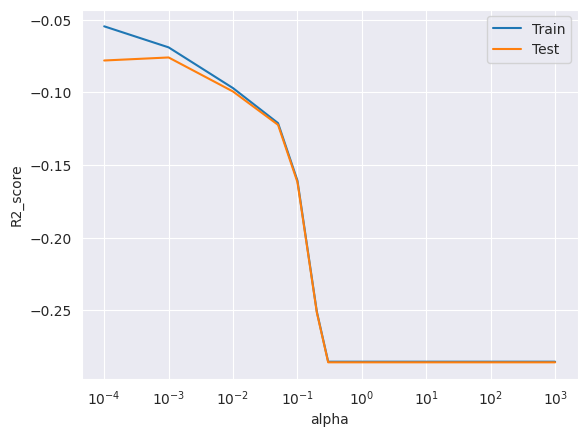

In [80]:
## Plotting R2 score vs alpha values
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_train_score'], label='Train')
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

### As the value of alpha increases, we see a decrease in both train and test error.
### However, after a error value of approximately 0.05, error remains constant.

# Comparing the Models

In [81]:
## Setting float display options
pd.options.display.float_format = "{:,.2f}".format

In [82]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Ridge Regression' : ridge_metrics,
            'Lasso Regression' : lasso_metrics
        }

final_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Ridge Regression', 'Lasso Regression'] )
final_metric.set_index('Metric')

Ridge Regression  Lasso Regression
Metric                                              
R2 Score (Train)              0.94              0.92
R2 Score (Test)               0.93              0.93
RSS (Train)                   8.53             11.29
RSS (Test)                    2.87              2.92
MSE (Train)                   0.01              0.01
MSE (Test)                    0.01              0.01
RMSE (Train)                  0.09              0.10
RMSE (Test)                   0.10              0.10

### The R2 score on test data is 0.93 for both Ridge and Lasso models.

In [83]:
## Now we see the changes in coefficients after regularization

## First create empty datafame with all the independent variables as indices
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas

Empty DataFrame
Columns: []
Index: [LotFrontage, LotArea, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, Age, MSSubClass_30, MSSubClass_40, MSSubClass_45, MSSubClass_50, MSSubClass_60, MSSubClass_70, MSSubClass_75, MSSubClass_80, MSSubClass_85, MSSubClass_90, MSSubClass_120, MSSubClass_160, MSSubClass_180, MSSubClass_190, MSZoning_FV, MSZoning_RH, MSZoning_RL, MSZoning_RM, Street_Pave, Alley_None, Alley_Pave, LotShape_IR2, LotShape_IR3, LotShape_Reg, LandContour_HLS, LandContour_Low, LandContour_Lvl, Utilities_NoSeWa, LotConfig_CulDSac, LotConfig_FR2, LotConfig_FR3, LotConfig_Inside, LandSlope_Mod, LandSlope_Sev, Neighborhood_Blueste, Neighborhood_BrDale, Neighborhood_BrkSide, Neighborhood_ClearCr, Neighborhood_CollgCr, Neighborhood_Crawfor, Neighborhood_Edwards, Neighborhood_Gilbert, Neighborhood_IDOTRR, Neighborhood_MeadowV, Neighborhood_Mitchel, Neighborhood_NAmes, Neighborhood_NPkVill, Neighborhood_NWAmes, Neighborhood_NoRidge, Neighborhood_NridgHt, Neighborhood_OldTown, Neighborhood_SWISU, Neighborhood_Sawyer, Neighborhood_SawyerW, Neighborhood_Somerst, Neighborhood_StoneBr, Neighborhood_Timber, Neighborhood_Veenker, Condition1_Feedr, Condition1_Norm, Condition1_PosA, Condition1_PosN, Condition1_RRAe, Condition1_RRAn, Condition1_RRNe, Condition1_RRNn, Condition2_Feedr, Condition2_Norm, Condition2_PosA, ...]

In [84]:
## Now fill in the values of betas, one column for ridge coefficients and one for lasso coefficients
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [85]:
## View the betas/coefficients
betas 

Ridge  Lasso
LotFrontage             0.01   0.00
LotArea                 0.02   0.02
YearRemodAdd            0.02   0.03
MasVnrArea             -0.00  -0.00
BsmtFinSF1              0.01   0.03
BsmtFinSF2             -0.00   0.00
BsmtUnfSF              -0.01  -0.00
TotalBsmtSF             0.05   0.04
1stFlrSF                0.01  -0.00
2ndFlrSF                0.03   0.01
LowQualFinSF            0.00   0.00
GrLivArea               0.09   0.11
BsmtFullBath            0.01   0.01
BsmtHalfBath           -0.00   0.00
FullBath                0.01   0.01
HalfBath                0.01   0.01
BedroomAbvGr            0.00   0.00
KitchenAbvGr            0.00   0.00
TotRmsAbvGrd           -0.00  -0.00
Fireplaces              0.02   0.02
GarageCars              0.02   0.02
GarageArea              0.02   0.02
WoodDeckSF              0.01   0.01
OpenPorchSF             0.01   0.01
EnclosedPorch           0.00   0.00
3SsnPorch               0.00   0.00
ScreenPorch             0.01   0.01
PoolArea                0.00   0.00
MiscVal                 0.00   0.00
MoSold                 -0.00  -0.00
Age                    -0.05  -0.05
MSSubClass_30          -0.04  -0.00
MSSubClass_40           0.01   0.00
MSSubClass_45           0.00   0.00
MSSubClass_50          -0.00   0.00
MSSubClass_60          -0.01  -0.00
MSSubClass_70           0.04   0.03
MSSubClass_75           0.03   0.00
MSSubClass_80           0.00   0.00
MSSubClass_85           0.00   0.00
MSSubClass_90          -0.03  -0.02
MSSubClass_120          0.01   0.00
MSSubClass_160         -0.05  -0.04
MSSubClass_180         -0.01  -0.00
MSSubClass_190         -0.02  -0.00
MSZoning_FV             0.04   0.00
MSZoning_RH             0.01   0.00
MSZoning_RL             0.01   0.00
MSZoning_RM            -0.02  -0.04
Street_Pave            -0.01  -0.00
Alley_None             -0.01  -0.00
Alley_Pave              0.02   0.00
LotShape_IR2            0.01   0.00
LotShape_IR3           -0.02  -0.00
LotShape_Reg            0.00  -0.00
LandContour_HLS         0.03   0.00
LandContour_Low         0.01   0.00
LandContour_Lvl         0.02  -0.00
Utilities_NoSeWa       -0.01  -0.00
LotConfig_CulDSac       0.03   0.02
LotConfig_FR2          -0.02  -0.00
LotConfig_FR3          -0.00  -0.00
LotConfig_Inside       -0.00   0.00
LandSlope_Mod          -0.00   0.00
LandSlope_Sev           0.03   0.00
Neighborhood_Blueste   -0.00  -0.00
Neighborhood_BrDale    -0.00  -0.00
Neighborhood_BrkSide    0.03   0.03
Neighborhood_ClearCr    0.03   0.00
Neighborhood_CollgCr   -0.02  -0.00
Neighborhood_Crawfor    0.08   0.09
Neighborhood_Edwards   -0.05  -0.03
Neighborhood_Gilbert   -0.01  -0.00
Neighborhood_IDOTRR     0.00   0.00
Neighborhood_MeadowV   -0.07  -0.03
Neighborhood_Mitchel   -0.03  -0.00
Neighborhood_NAmes     -0.03  -0.00
Neighborhood_NPkVill    0.01   0.00
Neighborhood_NWAmes    -0.02  -0.00
Neighborhood_NoRidge    0.01   0.00
Neighborhood_NridgHt    0.04   0.02
Neighborhood_OldTown   -0.02  -0.00
Neighborhood_SWISU      0.01   0.00
Neighborhood_Sawyer    -0.02  -0.00
Neighborhood_SawyerW   -0.02  -0.00
Neighborhood_Somerst    0.03   0.04
Neighborhood_StoneBr    0.05   0.01
Neighborhood_Timber     0.01   0.00
Neighborhood_Veenker    0.02   0.00
Condition1_Feedr       -0.00  -0.00
Condition1_Norm         0.04   0.04
Condition1_PosA         0.01   0.00
Condition1_PosN         0.02   0.00
Condition1_RRAe        -0.03  -0.00
Condition1_RRAn         0.01   0.00
Condition1_RRNe         0.00   0.00
Condition1_RRNn         0.02   0.00
Condition2_Feedr       -0.00  -0.00
Condition2_Norm         0.03   0.00
Condition2_PosA         0.03   0.00
Condition2_PosN        -0.03  -0.00
Condition2_RRAe        -0.00  -0.00
Condition2_RRAn        -0.01  -0.00
Condition2_RRNn         0.01   0.00
BldgType_2fmCon        -0.02  -0.00
BldgType_Duplex        -0.03  -0.03
BldgType_Twnhs         -0.04  -0.01
BldgType_TwnhsE        -0.02  -0.00
HouseStyle_1.5Unf       0.00   0.00
HouseStyle_1Story       0.02  -0.00
HouseStyle_2.5Fin       0.0

In [86]:
## View the features removed by Lasso
betas[betas['Lasso']==0]

Ridge  Lasso
MasVnrArea             -0.00  -0.00
BsmtUnfSF              -0.01  -0.00
1stFlrSF                0.01  -0.00
LowQualFinSF            0.00   0.00
BsmtHalfBath           -0.00   0.00
BedroomAbvGr            0.00   0.00
KitchenAbvGr            0.00   0.00
TotRmsAbvGrd           -0.00  -0.00
3SsnPorch               0.00   0.00
PoolArea                0.00   0.00
MiscVal                 0.00   0.00
MSSubClass_40           0.01   0.00
MSSubClass_45           0.00   0.00
MSSubClass_50          -0.00   0.00
MSSubClass_60          -0.01  -0.00
MSSubClass_75           0.03   0.00
MSSubClass_80           0.00   0.00
MSSubClass_85           0.00   0.00
MSSubClass_120          0.01   0.00
MSSubClass_180         -0.01  -0.00
MSSubClass_190         -0.02  -0.00
MSZoning_RH             0.01   0.00
MSZoning_RL             0.01   0.00
Street_Pave            -0.01  -0.00
Alley_None             -0.01  -0.00
Alley_Pave              0.02   0.00
LotShape_IR2            0.01   0.00
LotShape_IR3           -0.02  -0.00
LandContour_HLS         0.03   0.00
LandContour_Low         0.01   0.00
LandContour_Lvl         0.02  -0.00
Utilities_NoSeWa       -0.01  -0.00
LotConfig_FR2          -0.02  -0.00
LotConfig_FR3          -0.00  -0.00
LotConfig_Inside       -0.00   0.00
LandSlope_Mod          -0.00   0.00
LandSlope_Sev           0.03   0.00
Neighborhood_Blueste   -0.00  -0.00
Neighborhood_BrDale    -0.00  -0.00
Neighborhood_CollgCr   -0.02  -0.00
Neighborhood_Gilbert   -0.01  -0.00
Neighborhood_IDOTRR     0.00   0.00
Neighborhood_Mitchel   -0.03  -0.00
Neighborhood_NAmes     -0.03  -0.00
Neighborhood_NPkVill    0.01   0.00
Neighborhood_NWAmes    -0.02  -0.00
Neighborhood_NoRidge    0.01   0.00
Neighborhood_SWISU      0.01   0.00
Neighborhood_Sawyer    -0.02  -0.00
Neighborhood_SawyerW   -0.02  -0.00
Neighborhood_Timber     0.01   0.00
Neighborhood_Veenker    0.02   0.00
Condition1_Feedr       -0.00  -0.00
Condition1_PosA         0.01   0.00
Condition1_PosN         0.02   0.00
Condition1_RRAe        -0.03  -0.00
Condition1_RRAn         0.01   0.00
Condition1_RRNe         0.00   0.00
Condition1_RRNn         0.02   0.00
Condition2_Feedr       -0.00  -0.00
Condition2_Norm         0.03   0.00
Condition2_PosA         0.03   0.00
Condition2_PosN        -0.03  -0.00
Condition2_RRAe        -0.00  -0.00
Condition2_RRAn        -0.01  -0.00
Condition2_RRNn         0.01   0.00
BldgType_2fmCon        -0.02  -0.00
BldgType_TwnhsE        -0.02  -0.00
HouseStyle_1.5Unf       0.00   0.00
HouseStyle_1Story       0.02  -0.00
HouseStyle_2.5Fin       0.01   0.00
HouseStyle_2.5Unf      -0.01   0.00
HouseStyle_SFoyer       0.01   0.00
HouseStyle_SLvl         0.02   0.00
OverallQual_2          -0.00  -0.00
OverallQual_6          -0.01   0.00
OverallQual_10         -0.02  -0.00
OverallCond_2          -0.03  -0.00
OverallCond_6           0.02   0.00
RoofStyle_Gable        -0.02  -0.00
RoofStyle_Gambrel      -0.00   0.00
RoofStyle_Hip          -0.02  -0.00
RoofStyle_Mansard       0.02   0.00
RoofStyle_Shed         -0.00   0.00
RoofMatl_CompShg        0.01  -0.00
RoofMatl_Membran        0.00   0.00
RoofMatl_Metal          0.00   0.00
RoofMatl_Roll           0.00   0.00
RoofMatl_Tar&Grv        0.02   0.00
RoofMatl_WdShake        0.00   0.00
RoofMatl_WdShngl        0.03   0.00
Exterior1st_AsphShn    -0.00  -0.00
Exterior1st_BrkComm    -0.01  -0.00
Exterior1st_CBlock     -0.01  -0.00
Exterior1st_CemntBd    -0.01  -0.00
Exterior1st_HdBoard    -0.02  -0.00
Exterior1st_ImStucc    -0.00   0.00
Exterior1st_Plywood    -0.00  -0.00
Exterior1st_Stone       0.01   0.00
Exterior1st_Stucco      0.01   0.00
Exterior1st_VinylSd     0.00   0.00
Exterior1st_Wd Sdng    -0.03  -0.00
Exterior1st_WdShing    -0.01  -0.00
Exterior2nd_AsphShn     0.00   0.00
Exterior2nd_Brk Cmn     0.00   0.00
Exterior2nd_BrkFace     0.01   0.00
Exterior2nd_CBlock     -0.01  -0.00
Exterior2nd_CmentBd     0.01  -0.00
Exterior2nd_HdBoard    -0.00  -0.00
Exterior2nd_ImStucc     0.01  -0.00
Exterior2nd_MetalSd    -0.0

In [87]:
## View the number of features removed by lasso
betas[betas['Lasso']==0].shape

(306, 2)

The above 306 features out of 384 (from X_train) have been removed by Lasso. In this way, lasso performs feature selection

### Below are the features selected by Lasso

In [88]:
## View the features selected by lasso
betas.loc[betas['Lasso']!=0, 'Lasso']

LotFrontage              0.00
LotArea                  0.02
YearRemodAdd             0.03
BsmtFinSF1               0.03
BsmtFinSF2               0.00
TotalBsmtSF              0.04
2ndFlrSF                 0.01
GrLivArea                0.11
BsmtFullBath             0.01
FullBath                 0.01
HalfBath                 0.01
Fireplaces               0.02
GarageCars               0.02
GarageArea               0.02
WoodDeckSF               0.01
OpenPorchSF              0.01
EnclosedPorch            0.00
ScreenPorch              0.01
MoSold                  -0.00
Age                     -0.05
MSSubClass_30           -0.00
MSSubClass_70            0.03
MSSubClass_90           -0.02
MSSubClass_160          -0.04
MSZoning_FV              0.00
MSZoning_RM             -0.04
LotShape_Reg            -0.00
LotConfig_CulDSac        0.02
Neighborhood_BrkSide     0.03
Neighborhood_ClearCr     0.00
Neighborhood_Crawfor     0.09
Neighborhood_Edwards    -0.03
Neighborhood_MeadowV    -0.03
Neighborho

# Inferences for 'Surprise Housing'

## Now, we will look at the top 10 features significant in predicting the value of a house, both according to Ridge model and Lasso model

In [89]:
## View the top 10 coefficients of Ridge regression in descending order
betas['Ridge'].sort_values(ascending=False)[:10]

GrLivArea              0.09
OverallQual_9          0.08
OverallQual_8          0.08
Neighborhood_Crawfor   0.08
OverallCond_9          0.07
Functional_Typ         0.07
Exterior1st_BrkFace    0.07
SaleCondition_Alloca   0.06
CentralAir_Y           0.05
TotalBsmtSF            0.05
Name: Ridge, dtype: float64

In [90]:
## To interpret the ridge coefficients in terms of target, we have to take inverse log (i.e. e to the power) of betas
ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

GrLivArea              1.09
OverallQual_9          1.08
OverallQual_8          1.08
Neighborhood_Crawfor   1.08
OverallCond_9          1.08
Functional_Typ         1.07
Exterior1st_BrkFace    1.07
SaleCondition_Alloca   1.07
CentralAir_Y           1.06
TotalBsmtSF            1.05
Name: Ridge, dtype: float64

In [91]:
## View the top 10 coefficients of Lasso in descending order
betas['Lasso'].sort_values(ascending=False)[:10]

OverallQual_9          0.12
GrLivArea              0.11
OverallQual_8          0.10
Neighborhood_Crawfor   0.09
Exterior1st_BrkFace    0.08
Functional_Typ         0.08
CentralAir_Y           0.05
Neighborhood_Somerst   0.04
TotalBsmtSF            0.04
Condition1_Norm        0.04
Name: Lasso, dtype: float64

In [92]:
## To interpret the lasso coefficients in terms of target, we have to take inverse log (i.e. 10 to the power) of betas
lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]

OverallQual_9          1.13
GrLivArea              1.11
OverallQual_8          1.11
Neighborhood_Crawfor   1.09
Exterior1st_BrkFace    1.08
Functional_Typ         1.08
CentralAir_Y           1.05
Neighborhood_Somerst   1.04
TotalBsmtSF            1.04
Condition1_Norm        1.04
Name: Lasso, dtype: float64

# Conclusions:

## The variables significant in predicting the price of a house are: ( As per choosing Ridge Regression Model )  -
GrLivArea, OverallQual_9, OverallCond_9, OverallQual_8, Neighborhood_Crawfor, Functional_Typ, Exterior1st_BrkFace, SaleCondition_Alloca, CentralAir_Y, TotalBsmtSF, Neighborhood_Somerst, TotalBsmtSF and Condition1_Norm




## The variables significant in predicting the price of a house are: ( As per choosing Lasso Regression Model )  -
OverallQual_9,GrLivArea,OverallQual_8,Neighborhood_Crawfor,Exterior1st_BrkFace,Functional_Typ,CentralAir_Y,Neighborhood_Somerst,TotalBsmtSF,Condition1_Norm

## How well above variables help in predicting price of house , it can be as below - 
1. GrLivArea - an increase of 1 square foot of house area above ground, the price will increase by 1.09 to 1.11 times
2. OverallQual_9 & OverallQual_8: if the overall material and finish of the house is Very Good or Excellent, the price of house will increase by 1.08 to 1.13 times.
3. Functional_Typ: if the home functionality is typical, then the price of house will increase by 1.07 to 1.08 times.
4. Neighborhood_Crawfor: if Crawford is a nearby location, then the price of house will increase by 1.07 to 1.09 times.
5. Exterior1st_BrkFace: if the exterior covering on the house is Brick Face, the price of house will increase by 1.07 to 1.08 times.
6. Central Air Conditioned - If present in house , then house price can increase by 1.05-1.06 times.

Many more inferences can be pulled out from above statistics.

# End of Part 1

# Part 2 - Code Part

# Question 1 - What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [93]:
## Let us build the ridge regression model with double value of alpha i.e. 20
ridge = Ridge(alpha=20)

# Fit the model on training data
ridge.fit(X_train, y_train)

Ridge(alpha=20)

In [94]:
## Make predictions
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [95]:
## Check metrics
ridge_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.93
R-Squared (Test) = 0.93
RSS (Train) = 9.37
RSS (Test) = 2.82
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.09
RMSE (Test) = 0.10


In [96]:
## Now we will build the lasso model with double value of alpha i.e. 0.002
lasso = Lasso(alpha=0.002)

# Fit the model on training data
lasso.fit(X_train, y_train)

Lasso(alpha=0.002)

In [97]:
## Make predictions
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

In [98]:
## Check metrics
lasso_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.91
R-Squared (Test) = 0.91
RSS (Train) = 13.49
RSS (Test) = 3.45
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.11
RMSE (Test) = 0.11


In [99]:
# Again creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Ridge Regression' : ridge_metrics,
            'Lasso Regression' : lasso_metrics
        }

final_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Ridge Regression', 'Lasso Regression'] )
final_metric.set_index('Metric')

Ridge Regression  Lasso Regression
Metric                                              
R2 Score (Train)              0.93              0.91
R2 Score (Test)               0.93              0.91
RSS (Train)                   9.37             13.49
RSS (Test)                    2.82              3.45
MSE (Train)                   0.01              0.01
MSE (Test)                    0.01              0.01
RMSE (Train)                  0.09              0.11
RMSE (Test)                   0.10              0.11

## Changes in Ridge Regression metrics:
1. R2 score of train set decreased from 0.94 to 0.93
2. R2 score of test set remained same at 0.93
## Changes in Lasso metrics:
1. R2 score of train set decreased from 0.92 to 0.91
2. R2 score of test set decreased from 0.93 to 0.91

In [100]:
## Now we see the changes in coefficients after regularization

## First create empty datafame with all the independent variables as indices
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas

Empty DataFrame
Columns: []
Index: [LotFrontage, LotArea, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, Age, MSSubClass_30, MSSubClass_40, MSSubClass_45, MSSubClass_50, MSSubClass_60, MSSubClass_70, MSSubClass_75, MSSubClass_80, MSSubClass_85, MSSubClass_90, MSSubClass_120, MSSubClass_160, MSSubClass_180, MSSubClass_190, MSZoning_FV, MSZoning_RH, MSZoning_RL, MSZoning_RM, Street_Pave, Alley_None, Alley_Pave, LotShape_IR2, LotShape_IR3, LotShape_Reg, LandContour_HLS, LandContour_Low, LandContour_Lvl, Utilities_NoSeWa, LotConfig_CulDSac, LotConfig_FR2, LotConfig_FR3, LotConfig_Inside, LandSlope_Mod, LandSlope_Sev, Neighborhood_Blueste, Neighborhood_BrDale, Neighborhood_BrkSide, Neighborhood_ClearCr, Neighborhood_CollgCr, Neighborhood_Crawfor, Neighborhood_Edwards, Neighborhood_Gilbert, Neighborhood_IDOTRR, Neighborhood_MeadowV, Neighborhood_Mitchel, Neighborhood_NAmes, Neighborhood_NPkVill, Neighborhood_NWAmes, Neighborhood_NoRidge, Neighborhood_NridgHt, Neighborhood_OldTown, Neighborhood_SWISU, Neighborhood_Sawyer, Neighborhood_SawyerW, Neighborhood_Somerst, Neighborhood_StoneBr, Neighborhood_Timber, Neighborhood_Veenker, Condition1_Feedr, Condition1_Norm, Condition1_PosA, Condition1_PosN, Condition1_RRAe, Condition1_RRAn, Condition1_RRNe, Condition1_RRNn, Condition2_Feedr, Condition2_Norm, Condition2_PosA, ...]

In [101]:
## Now fill in the values of betas, one column for ridge coefficients and one for lasso coefficients
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [102]:
## View the betas/coefficients
betas 

Ridge  Lasso
LotFrontage             0.01   0.00
LotArea                 0.02   0.02
YearRemodAdd            0.03   0.04
MasVnrArea             -0.00  -0.00
BsmtFinSF1              0.02   0.03
BsmtFinSF2              0.00   0.00
BsmtUnfSF              -0.01  -0.00
TotalBsmtSF             0.05   0.05
1stFlrSF                0.01  -0.00
2ndFlrSF                0.03   0.01
LowQualFinSF            0.00   0.00
GrLivArea               0.08   0.11
BsmtFullBath            0.01   0.01
BsmtHalfBath           -0.00   0.00
FullBath                0.01   0.00
HalfBath                0.01   0.01
BedroomAbvGr            0.00  -0.00
KitchenAbvGr            0.00   0.00
TotRmsAbvGrd            0.00  -0.00
Fireplaces              0.02   0.03
GarageCars              0.02   0.02
GarageArea              0.02   0.02
WoodDeckSF              0.01   0.01
OpenPorchSF             0.01   0.01
EnclosedPorch           0.00   0.00
3SsnPorch               0.00   0.00
ScreenPorch             0.01   0.01
PoolArea                0.00   0.00
MiscVal                 0.00   0.00
MoSold                 -0.00  -0.00
Age                    -0.05  -0.05
MSSubClass_30          -0.03  -0.00
MSSubClass_40           0.00   0.00
MSSubClass_45           0.00   0.00
MSSubClass_50          -0.00   0.00
MSSubClass_60          -0.01  -0.00
MSSubClass_70           0.04   0.01
MSSubClass_75           0.02   0.00
MSSubClass_80           0.00   0.00
MSSubClass_85           0.00   0.00
MSSubClass_90          -0.03  -0.00
MSSubClass_120          0.01   0.00
MSSubClass_160         -0.04  -0.01
MSSubClass_180         -0.01  -0.00
MSSubClass_190         -0.02  -0.00
MSZoning_FV             0.03   0.00
MSZoning_RH             0.01  -0.00
MSZoning_RL             0.01   0.00
MSZoning_RM            -0.03  -0.03
Street_Pave            -0.00   0.00
Alley_None             -0.00  -0.00
Alley_Pave              0.01   0.00
LotShape_IR2            0.01   0.00
LotShape_IR3           -0.02  -0.00
LotShape_Reg           -0.00  -0.00
LandContour_HLS         0.03   0.00
LandContour_Low         0.01   0.00
LandContour_Lvl         0.01  -0.00
Utilities_NoSeWa       -0.01  -0.00
LotConfig_CulDSac       0.02   0.00
LotConfig_FR2          -0.01  -0.00
LotConfig_FR3          -0.00   0.00
LotConfig_Inside        0.00   0.00
LandSlope_Mod          -0.00   0.00
LandSlope_Sev           0.02   0.00
Neighborhood_Blueste   -0.00  -0.00
Neighborhood_BrDale    -0.00  -0.00
Neighborhood_BrkSide    0.03   0.00
Neighborhood_ClearCr    0.02   0.00
Neighborhood_CollgCr   -0.01  -0.00
Neighborhood_Crawfor    0.06   0.07
Neighborhood_Edwards   -0.05  -0.03
Neighborhood_Gilbert   -0.01  -0.00
Neighborhood_IDOTRR     0.00   0.00
Neighborhood_MeadowV   -0.05  -0.00
Neighborhood_Mitchel   -0.03  -0.00
Neighborhood_NAmes     -0.02  -0.00
Neighborhood_NPkVill    0.01   0.00
Neighborhood_NWAmes    -0.02  -0.00
Neighborhood_NoRidge    0.00  -0.00
Neighborhood_NridgHt    0.03   0.00
Neighborhood_OldTown   -0.02  -0.00
Neighborhood_SWISU      0.00   0.00
Neighborhood_Sawyer    -0.01  -0.00
Neighborhood_SawyerW   -0.02  -0.00
Neighborhood_Somerst    0.03   0.02
Neighborhood_StoneBr    0.04   0.00
Neighborhood_Timber     0.01   0.00
Neighborhood_Veenker    0.02   0.00
Condition1_Feedr       -0.01  -0.00
Condition1_Norm         0.03   0.03
Condition1_PosA         0.00   0.00
Condition1_PosN         0.01   0.00
Condition1_RRAe        -0.02  -0.00
Condition1_RRAn         0.01   0.00
Condition1_RRNe         0.00   0.00
Condition1_RRNn         0.01   0.00
Condition2_Feedr       -0.00  -0.00
Condition2_Norm         0.02   0.00
Condition2_PosA         0.02   0.00
Condition2_PosN        -0.02  -0.00
Condition2_RRAe        -0.00  -0.00
Condition2_RRAn        -0.00  -0.00
Condition2_RRNn         0.00   0.00
BldgType_2fmCon        -0.02  -0.00
BldgType_Duplex        -0.03  -0.02
BldgType_Twnhs         -0.03  -0.00
BldgType_TwnhsE        -0.01  -0.00
HouseStyle_1.5Unf      -0.00   0.00
HouseStyle_1Story       0.01  -0.00
HouseStyle_2.5Fin       0.0

## Now, we look at the most important predictor variables after the change is implemented.

In [103]:
## View the top 10 coefficients of Ridge regression in descending order
betas['Ridge'].sort_values(ascending=False)[:10]

GrLivArea              0.08
OverallQual_8          0.07
OverallQual_9          0.06
Neighborhood_Crawfor   0.06
Functional_Typ         0.06
Exterior1st_BrkFace    0.06
OverallCond_9          0.05
TotalBsmtSF            0.05
CentralAir_Y           0.05
OverallCond_7          0.04
Name: Ridge, dtype: float64

In [104]:
## To interpret the ridge coefficients in terms of target, we have to take inverse log (i.e. e to the power) of betas
ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

GrLivArea              1.08
OverallQual_8          1.07
OverallQual_9          1.07
Neighborhood_Crawfor   1.07
Functional_Typ         1.06
Exterior1st_BrkFace    1.06
OverallCond_9          1.06
TotalBsmtSF            1.05
CentralAir_Y           1.05
OverallCond_7          1.04
Name: Ridge, dtype: float64

In [105]:
## View the top 10 coefficients of Lasso in descending order
betas['Lasso'].sort_values(ascending=False)[:10]

GrLivArea              0.11
OverallQual_8          0.08
OverallQual_9          0.08
Functional_Typ         0.07
Neighborhood_Crawfor   0.07
TotalBsmtSF            0.05
Exterior1st_BrkFace    0.04
CentralAir_Y           0.04
YearRemodAdd           0.04
Condition1_Norm        0.03
Name: Lasso, dtype: float64

In [106]:
## To interpret the lasso coefficients in terms of target, we have to take inverse log (i.e. 10 to the power) of betas
lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]

GrLivArea              1.11
OverallQual_8          1.09
OverallQual_9          1.08
Functional_Typ         1.07
Neighborhood_Crawfor   1.07
TotalBsmtSF            1.05
Exterior1st_BrkFace    1.05
CentralAir_Y           1.04
YearRemodAdd           1.04
Condition1_Norm        1.03
Name: Lasso, dtype: float64

## So, the most important predictor variables after we double the alpha values are:-
1. GrLivArea
2. OverallQual_8
3. OverallQual_9
4. Functional_Typ
5. Neighborhood_Crawfor
6. Exterior1st_BrkFace
7. TotalBsmtSF
8. CentralAir_Y

## End of Question 1

## Question 3 - After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

### Dropping top 5 lasso predictors - OverallQual_9, GrLivArea, OverallQual_8,Neighborhood_Crawfor and Exterior1st_BrkFace

In [107]:
## Create a list of top 5 lasso predictors that are to be removed
top5 = ['OverallQual_9', 'GrLivArea', 'OverallQual_8', 'Neighborhood_Crawfor', 'Exterior1st_BrkFace']

In [108]:
## drop them from train and test data
X_train_dropped = X_train.drop(top5, axis=1)
X_test_dropped = X_test.drop(top5, axis=1)

In [109]:
## Now to create a Lasso model
## we will run a cross validation on a list of alphas to find the optimum value of alpha

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation

lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lassoCV.fit(X_train_dropped, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [110]:
## View the optimal value of alpha
lassoCV.best_params_

{'alpha': 0.001}

### Thus, we get optimum value of alpha as 0.001. Now we will build a lasso regression model using this value.

In [111]:
# Create a lasso instance with optimum value alpha=0.001
lasso = Lasso(alpha=0.001)

In [112]:
# Fit the model on training data
lasso.fit(X_train_dropped, y_train)

Lasso(alpha=0.001)

In [113]:
## Make predictions
y_train_pred = lasso.predict(X_train_dropped)
y_pred = lasso.predict(X_test_dropped)

In [114]:
## Check metrics
lasso_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.91
R-Squared (Test) = 0.92
RSS (Train) = 12.75
RSS (Test) = 3.02
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.10
RMSE (Test) = 0.10


### FInd top 5 predictors

In [115]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Lasso Regression' : lasso_metrics
        }

final_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Lasso Regression'] )
final_metric.set_index('Metric')

Lasso Regression
Metric                            
R2 Score (Train)              0.91
R2 Score (Test)               0.92
RSS (Train)                  12.75
RSS (Test)                    3.02
MSE (Train)                   0.01
MSE (Test)                    0.01
RMSE (Train)                  0.10
RMSE (Test)                   0.10

In [116]:
## Now we see the changes in coefficients after regularization

## First create empty datafame with all the independent variables as indices
betas = pd.DataFrame(index=X_train_dropped.columns)
betas.rows = X_train_dropped.columns
betas

Empty DataFrame
Columns: []
Index: [LotFrontage, LotArea, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, Age, MSSubClass_30, MSSubClass_40, MSSubClass_45, MSSubClass_50, MSSubClass_60, MSSubClass_70, MSSubClass_75, MSSubClass_80, MSSubClass_85, MSSubClass_90, MSSubClass_120, MSSubClass_160, MSSubClass_180, MSSubClass_190, MSZoning_FV, MSZoning_RH, MSZoning_RL, MSZoning_RM, Street_Pave, Alley_None, Alley_Pave, LotShape_IR2, LotShape_IR3, LotShape_Reg, LandContour_HLS, LandContour_Low, LandContour_Lvl, Utilities_NoSeWa, LotConfig_CulDSac, LotConfig_FR2, LotConfig_FR3, LotConfig_Inside, LandSlope_Mod, LandSlope_Sev, Neighborhood_Blueste, Neighborhood_BrDale, Neighborhood_BrkSide, Neighborhood_ClearCr, Neighborhood_CollgCr, Neighborhood_Edwards, Neighborhood_Gilbert, Neighborhood_IDOTRR, Neighborhood_MeadowV, Neighborhood_Mitchel, Neighborhood_NAmes, Neighborhood_NPkVill, Neighborhood_NWAmes, Neighborhood_NoRidge, Neighborhood_NridgHt, Neighborhood_OldTown, Neighborhood_SWISU, Neighborhood_Sawyer, Neighborhood_SawyerW, Neighborhood_Somerst, Neighborhood_StoneBr, Neighborhood_Timber, Neighborhood_Veenker, Condition1_Feedr, Condition1_Norm, Condition1_PosA, Condition1_PosN, Condition1_RRAe, Condition1_RRAn, Condition1_RRNe, Condition1_RRNn, Condition2_Feedr, Condition2_Norm, Condition2_PosA, Condition2_PosN, Condition2_RRAe, ...]

In [117]:
## Now fill in the values of betas, one column for ridge coefficients and one for lasso coefficients
betas['Lasso'] = lasso.coef_
# betas['Lasso'] = lasso.coef_

In [118]:
## View the betas/coefficients
betas 

Lasso
LotFrontage             0.00
LotArea                 0.02
YearRemodAdd            0.03
MasVnrArea             -0.00
BsmtFinSF1              0.03
BsmtFinSF2              0.00
BsmtUnfSF              -0.00
TotalBsmtSF             0.05
1stFlrSF                0.07
2ndFlrSF                0.10
LowQualFinSF            0.00
BsmtFullBath            0.01
BsmtHalfBath            0.00
FullBath                0.01
HalfBath                0.01
BedroomAbvGr            0.00
KitchenAbvGr            0.00
TotRmsAbvGrd            0.00
Fireplaces              0.03
GarageCars              0.02
GarageArea              0.02
WoodDeckSF              0.01
OpenPorchSF             0.01
EnclosedPorch           0.00
3SsnPorch               0.00
ScreenPorch             0.01
PoolArea                0.00
MiscVal                 0.00
MoSold                  0.00
Age                    -0.04
MSSubClass_30          -0.00
MSSubClass_40           0.00
MSSubClass_45           0.00
MSSubClass_50           0.00
MSSubClass_60          -0.00
MSSubClass_70           0.06
MSSubClass_75           0.00
MSSubClass_80           0.00
MSSubClass_85           0.00
MSSubClass_90          -0.02
MSSubClass_120          0.00
MSSubClass_160         -0.06
MSSubClass_180         -0.00
MSSubClass_190         -0.00
MSZoning_FV             0.00
MSZoning_RH             0.00
MSZoning_RL             0.00
MSZoning_RM            -0.04
Street_Pave             0.00
Alley_None             -0.00
Alley_Pave              0.00
LotShape_IR2            0.00
LotShape_IR3           -0.00
LotShape_Reg           -0.00
LandContour_HLS         0.03
LandContour_Low         0.00
LandContour_Lvl        -0.00
Utilities_NoSeWa       -0.00
LotConfig_CulDSac       0.02
LotConfig_FR2          -0.00
LotConfig_FR3          -0.00
LotConfig_Inside        0.00
LandSlope_Mod           0.00
LandSlope_Sev           0.00
Neighborhood_Blueste   -0.00
Neighborhood_BrDale    -0.00
Neighborhood_BrkSide    0.01
Neighborhood_ClearCr    0.00
Neighborhood_CollgCr   -0.00
Neighborhood_Edwards   -0.05
Neighborhood_Gilbert   -0.00
Neighborhood_IDOTRR    -0.00
Neighborhood_MeadowV   -0.01
Neighborhood_Mitchel   -0.00
Neighborhood_NAmes     -0.00
Neighborhood_NPkVill    0.00
Neighborhood_NWAmes    -0.00
Neighborhood_NoRidge    0.00
Neighborhood_NridgHt    0.04
Neighborhood_OldTown   -0.02
Neighborhood_SWISU      0.00
Neighborhood_Sawyer    -0.00
Neighborhood_SawyerW   -0.00
Neighborhood_Somerst    0.06
Neighborhood_StoneBr    0.04
Neighborhood_Timber     0.00
Neighborhood_Veenker    0.00
Condition1_Feedr       -0.00
Condition1_Norm         0.04
Condition1_PosA         0.00
Condition1_PosN         0.00
Condition1_RRAe        -0.00
Condition1_RRAn         0.00
Condition1_RRNe         0.00
Condition1_RRNn         0.00
Condition2_Feedr       -0.00
Condition2_Norm         0.00
Condition2_PosA         0.00
Condition2_PosN        -0.00
Condition2_RRAe        -0.00
Condition2_RRAn        -0.00
Condition2_RRNn         0.00
BldgType_2fmCon        -0.00
BldgType_Duplex        -0.03
BldgType_Twnhs         -0.01
BldgType_TwnhsE        -0.00
HouseStyle_1.5Unf       0.00
HouseStyle_1Story      -0.00
HouseStyle_2.5Fin       0.00
HouseStyle_2.5Unf      -0.00
HouseStyle_2Story      -0.02
HouseStyle_SFoyer       0.00
HouseStyle_SLvl         0.00
OverallQual_2          -0.00
OverallQual_3          -0.07
OverallQual_4          -0.10
OverallQual_5          -0.08
OverallQual_6          -0.05
OverallQual_7          -0.01
OverallQual_10         -0.00
OverallCond_2          -0.00
OverallCond_3          -0.08
OverallCond_4          -0.07
OverallCond_5          -0.04
OverallCond_6           0.00
OverallCond_7           0.03
OverallCond_8           0.02
OverallCond_9           0.03
RoofStyle_Gable        -0.00
RoofStyle_Gambrel       0.00
RoofStyle_Hip           0.00
RoofStyle_Mansard       0.00
RoofStyle_Shed         -0.00
RoofMatl_CompShg       -0.00
RoofMatl_Membran        0.00
RoofMatl_Metal          0.00
RoofMatl_Roll           0.00
RoofMatl_Tar&Grv     

In [119]:
## View the top 5 coefficients of Lasso in descending order
betas['Lasso'].sort_values(ascending=False)[:5]

2ndFlrSF               0.10
Functional_Typ         0.07
1stFlrSF               0.07
MSSubClass_70          0.06
Neighborhood_Somerst   0.06
Name: Lasso, dtype: float64

### After dropping our top 5 lasso predictors, we get the following new top 5 predictors:-
1. 2ndFlrSF
2. Functional_Typ
3. 1stFlrSF
4. MSSubClass_70
5. Neighborhood_Somerst

## End of Assignment